In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
import sys

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Diffusion'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['__pycache__', 'ddpm.py', 'data.py', 'unet.py', 'utilities.py', 'train.ipynb']


In [3]:
sys.path.append(GOOGLE_DRIVE_PATH)

In [4]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
from ddpm import DDPM
from data import Data
from unet import UNet
from utilities import visualize_forward, display_generated, train

In [6]:
torch.manual_seed(27)
device = "cuda" if torch.cuda.is_available() else "cpu"
dtype = torch.float32

In [12]:
ddpm_dict = {
  "beta_start": 1e-4,
  "beta_end": 2e-2,
  "timesteps": 512,
  "device": device,
  "dtype": dtype
}

data_dict = {
  "name": "mnist",
  "path": "data",
  "batch_size": 1024
}

ddpm = DDPM(**ddpm_dict)
data = Data(**data_dict)

unet_dict = {
  "input_channels": data.shape[0],
  "hid_channels": 16,
  "num_blocks": 3,
  "emb_dim": 512
}

unet = UNet(**unet_dict).to(dtype=ddpm.dtype, device=ddpm.device)

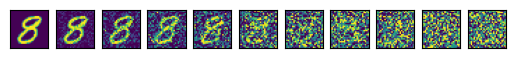

In [10]:
visualize_forward(ddpm, data)

Number of parameters: 973952

Epoch: 1 | Learning Rate: 0.001
1.4232642650604248
1.0781131982803345
0.8559923768043518
0.6908594369888306
0.5779783725738525
0.49482542276382446
0.4550709128379822
0.4184119403362274
0.37730923295021057
0.36428695917129517
0.34075599908828735
0.32842355966567993
0.31037968397140503
0.298315167427063
0.2831823229789734
0.26108667254447937
0.2642846703529358
0.24022184312343597
0.24013195931911469
0.2209545522928238
0.22737747430801392
0.20829588174819946
0.20443277060985565
0.20480786263942719
0.19817215204238892
0.19306960701942444
0.18611116707324982
0.18275003135204315
0.17105738818645477
0.17184747755527496
0.1664176881313324
0.1644359827041626
0.162540465593338
0.1557759940624237
0.15376606583595276
0.14998337626457214
0.14170435070991516
0.14851407706737518
0.13973958790302277
0.13566331565380096
0.14075599610805511
0.13235555589199066
0.13021819293498993
0.13141925632953644
0.1334538459777832
0.12848259508609772
0.12912529706954956
0.12481190264225

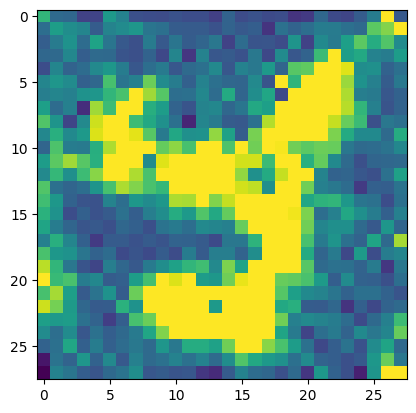


Epoch: 2 | Learning Rate: 0.001
0.10730069875717163
0.10357864201068878
0.10696491599082947
0.10313592106103897
0.10570772737264633
0.1081419587135315
0.10131926834583282
0.10891250520944595
0.10139451175928116
0.10239766538143158
0.10343567281961441
0.09945537149906158
0.09892811626195908
0.09783102571964264
0.09626911580562592
0.09705589711666107
0.0933719128370285
0.09270121157169342
0.09482301771640778
0.09815875440835953
0.09587986767292023
0.09595543146133423
0.09107428044080734
0.09669095277786255
0.09441309422254562
0.09153863787651062
0.09336771070957184
0.08805295825004578
0.08728531002998352
0.08388599008321762
0.08950508385896683
0.08885295689105988
0.08474702388048172
0.08981846272945404
0.09188850224018097
0.08644746243953705
0.08897425979375839
0.08920720964670181
0.08477232605218887
0.08777143061161041
0.08655926585197449
0.08457164466381073
0.08525432646274567
0.08108504861593246
0.0847589448094368
0.08375140279531479
0.086287721991539
0.07538467645645142
0.0809168517

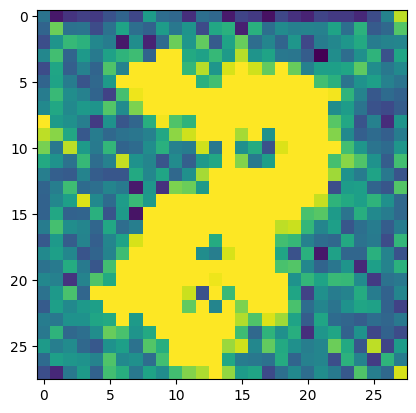


Epoch: 3 | Learning Rate: 0.001
0.08148898184299469
0.07896687090396881
0.0763353630900383
0.07719560712575912
0.07664467394351959
0.07883106917142868
0.07744945585727692
0.08229684829711914
0.07985024154186249
0.07812369614839554
0.0748870000243187
0.07600586861371994
0.07919755578041077
0.07422691583633423
0.07460442185401917
0.07828645408153534
0.07378403097391129
0.07523547857999802
0.07418158650398254
0.07622549682855606
0.0733240470290184
0.07255320250988007
0.07265659421682358
0.07561323791742325
0.07660795748233795
0.07477007061243057
0.07405490428209305
0.07237081974744797
0.07213491946458817
0.0755162239074707
0.07371315360069275
0.0694211795926094
0.07654367387294769
0.07290808111429214
0.07523022592067719
0.06922530382871628
0.07170068472623825
0.06964276731014252
0.07225660979747772
0.06506932526826859
0.07246605306863785
0.07206129282712936
0.0676250234246254
0.07179892063140869
0.07000409066677094
0.06645315140485764
0.06678563356399536
0.0728895515203476
0.073094584047

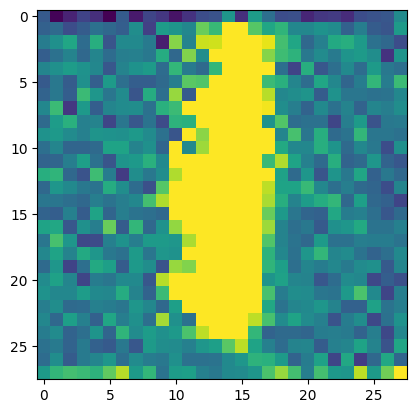


Epoch: 4 | Learning Rate: 0.001
0.06477458775043488
0.07157042622566223
0.06795889139175415
0.06966595351696014
0.06811267882585526
0.06635560840368271
0.06298226118087769
0.07049822807312012
0.0680716261267662
0.06984799355268478
0.06747312843799591
0.06699465960264206
0.06709814816713333
0.066118523478508
0.06385224312543869
0.06711938232183456
0.06455254554748535
0.06356596946716309
0.06345031410455704
0.06476889550685883
0.06801953911781311
0.0650930181145668
0.06159812584519386
0.06753887981176376
0.06869126856327057
0.06352347135543823
0.06816147267818451
0.06037670001387596
0.06325729191303253
0.0633910745382309
0.062013473361730576
0.06704641878604889
0.06933096796274185
0.06453298777341843
0.06409871578216553
0.06560967117547989
0.06407127529382706
0.06610465049743652
0.062210679054260254
0.060376569628715515
0.062273479998111725
0.06289392709732056
0.06684797257184982
0.06114692613482475
0.06311900168657303
0.06152237951755524
0.05937810614705086
0.06401758641004562
0.064136

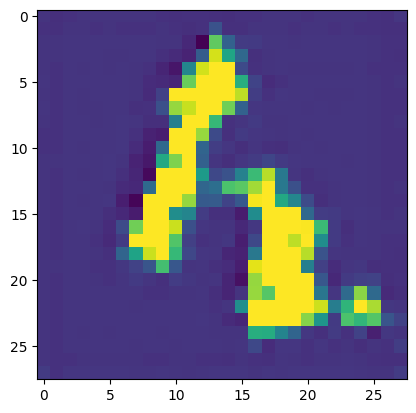


Epoch: 5 | Learning Rate: 0.001
0.06107115000486374
0.06369194388389587
0.05964832752943039
0.0624968558549881
0.06067906320095062
0.06342024356126785
0.06161770224571228
0.060158777981996536
0.05790998786687851
0.061890095472335815
0.06299746036529541
0.06049763411283493
0.05911413952708244
0.059153057634830475
0.060269735753536224
0.058863766491413116
0.056086406111717224
0.05972408130764961
0.06123208999633789
0.055978141725063324
0.06324677914381027
0.05941609665751457
0.06124994158744812
0.06010837480425835
0.0583769716322422
0.05577842518687248
0.059071093797683716
0.05779784917831421
0.05801309645175934
0.05705612525343895
0.05552105978131294
0.05729196220636368
0.05864698812365532
0.0570664182305336
0.061129823327064514
0.05890088528394699
0.06166663393378258
0.05991140380501747
0.056532587856054306
0.057337332516908646
0.057842984795570374
0.06072742119431496
0.05627889558672905
0.05416145920753479
0.059516146779060364
0.06069549173116684
0.05935506150126457
0.058241024613380

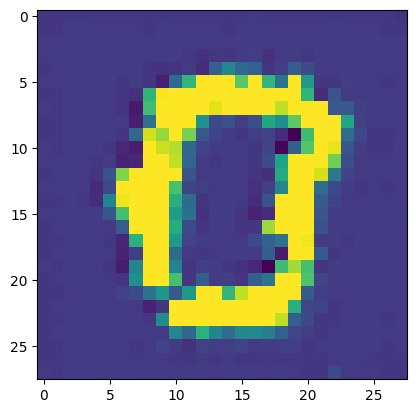


Epoch: 6 | Learning Rate: 0.001
0.053728267550468445
0.05496034771203995
0.05730070173740387
0.05282750353217125
0.056030359119176865
0.05425778031349182
0.05353302136063576
0.05594036355614662
0.053731679916381836
0.056159134954214096
0.05495434254407883
0.05542731285095215
0.05871015414595604
0.05271974951028824
0.05393295735120773
0.05518268421292305
0.055018600076436996
0.05845269188284874
0.052872441709041595
0.052048925310373306
0.057963740080595016
0.05540676414966583
0.05610366538167
0.05202465131878853
0.05489559471607208
0.053825493901968
0.05402890965342522
0.05429103225469589
0.05471711605787277
0.05591927096247673
0.05410782992839813
0.057392191141843796
0.05677838250994682
0.055636294186115265
0.05541802942752838
0.05316798761487007
0.056460876017808914
0.054779052734375
0.056188251823186874
0.054624009877443314
0.057627081871032715
0.05554329976439476
0.05238661915063858
0.052104510366916656
0.05467770993709564
0.0523059219121933
0.05416889861226082
0.05635341629385948


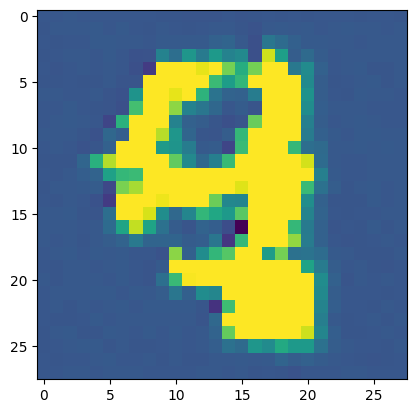


Epoch: 7 | Learning Rate: 0.001
0.05078538507223129
0.04967590048909187
0.05192422866821289
0.053594693541526794
0.05213886871933937
0.05772794783115387
0.051914967596530914
0.05331400781869888
0.05313565582036972
0.053454913198947906
0.049950066953897476
0.055789947509765625
0.05250779911875725
0.05332813411951065
0.05015702545642853
0.051785603165626526
0.05376555770635605
0.05239070951938629
0.0519406683743
0.051191553473472595
0.054079774767160416
0.05200657621026039
0.057651128619909286
0.05128788948059082
0.05259397625923157
0.05253782868385315
0.05396056920289993
0.0502624437212944
0.05415567010641098
0.05115238577127457
0.05174099653959274
0.05015106126666069
0.055218685418367386
0.049445558339357376
0.05350184813141823
0.05433376505970955
0.055163830518722534
0.05086663365364075
0.0533585399389267
0.051435139030218124
0.05446431785821915
0.05115234851837158
0.04953482002019882
0.05252917855978012
0.05097000300884247
0.052850380539894104
0.052875109016895294
0.0506323501467704

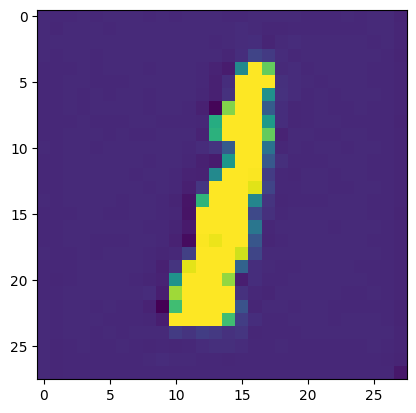


Epoch: 8 | Learning Rate: 0.001
0.05539587140083313
0.04874987527728081
0.05126615986227989
0.048946719616651535
0.048350781202316284
0.05095819756388664
0.04889765381813049
0.05046578124165535
0.05196040868759155
0.05114997178316116
0.04845881834626198
0.04941519349813461
0.0506582036614418
0.049308892339468
0.050421588122844696
0.05202179029583931
0.04750620573759079
0.04894528165459633
0.048720184713602066
0.047951508313417435
0.04728759452700615
0.04976271092891693
0.051077939569950104
0.05161864310503006
0.049740176647901535
0.0507781021296978
0.050628602504730225
0.05000264197587967
0.048549048602581024
0.04954691231250763
0.04908205568790436
0.0498524084687233
0.049985066056251526
0.04994187131524086
0.04774269834160805
0.052143644541502
0.047632381319999695
0.04867614805698395
0.04941733926534653
0.04659971222281456
0.05291786044836044
0.048575982451438904
0.04832204431295395
0.04795381799340248
0.04931970313191414
0.04802631586790085
0.050506800413131714
0.050969552248716354


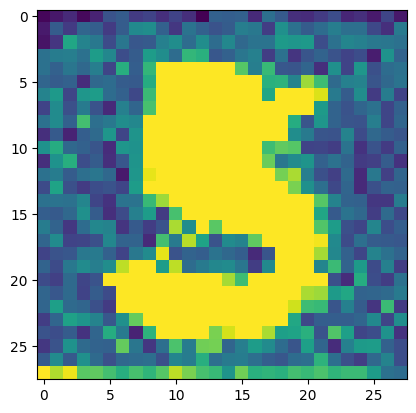


Epoch: 9 | Learning Rate: 0.001
0.04942929372191429
0.04771727696061134
0.046351149678230286
0.047218963503837585
0.049338921904563904
0.04644177481532097
0.0503329299390316
0.04555840417742729
0.04955574870109558
0.050890423357486725
0.04602372646331787
0.04709586128592491
0.05228791758418083
0.04423957318067551
0.049478039145469666
0.0475570373237133
0.049287572503089905
0.048343975096940994
0.0505213625729084
0.054839231073856354
0.04747850075364113
0.04716462269425392
0.050413090735673904
0.049875449389219284
0.046050168573856354
0.04956897720694542
0.047023992985486984
0.04882264509797096
0.04789012670516968
0.049062926322221756
0.04760810360312462
0.04732484742999077
0.046034328639507294
0.04799005389213562
0.04875439405441284
0.04715271294116974
0.049001295119524
0.04797854647040367
0.04564877972006798
0.04544701799750328
0.049627359956502914
0.050373539328575134
0.04625270888209343
0.045979179441928864
0.048276908695697784
0.049154337495565414
0.04676154628396034
0.04907045140

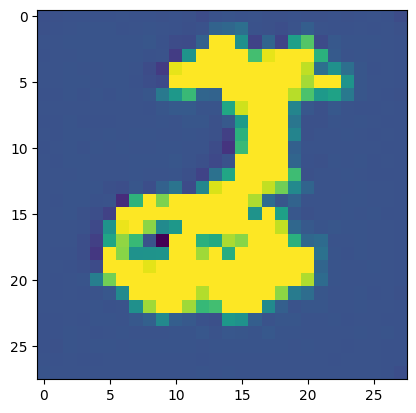


Epoch: 10 | Learning Rate: 0.001
0.04897273704409599
0.04732925072312355
0.046578191220760345
0.046733710914850235
0.047854844480752945
0.044476259499788284
0.047702204436063766
0.045016802847385406
0.046409402042627335
0.04623113200068474
0.047692131251096725
0.045894406735897064
0.04764828458428383
0.04562785476446152
0.04744977131485939
0.047040849924087524
0.04854888096451759
0.050764717161655426
0.04684721678495407
0.046640053391456604
0.04748382419347763
0.04624233394861221
0.047427814453840256
0.04746122285723686
0.048961035907268524
0.0446731299161911
0.04532705992460251
0.04808942228555679
0.04501945897936821
0.044795241206884384
0.04558767378330231
0.046170417219400406
0.04682735353708267
0.045933857560157776
0.04809054359793663
0.0492703840136528
0.04811987653374672
0.047344986349344254
0.04437648877501488
0.04657518491148949
0.04434999078512192
0.046081386506557465
0.04470000043511391
0.04525500908493996
0.04607835039496422
0.04589952528476715
0.0442059189081192
0.04389488

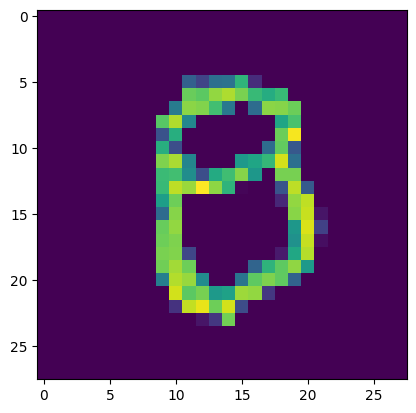


Epoch: 11 | Learning Rate: 0.0008
0.04716769978404045
0.047263938933610916
0.04508516192436218
0.04742051661014557
0.044625990092754364
0.045767489820718765
0.046071212738752365
0.046764664351940155
0.04723497852683067
0.04910244047641754
0.044423699378967285
0.04562465474009514
0.04549374803900719
0.04543214663863182
0.0452183298766613
0.04801162704825401
0.044744621962308884
0.04468517750501633
0.04707755893468857
0.048347026109695435
0.0449586883187294
0.0448307991027832
0.04588603973388672
0.044518254697322845
0.0444335862994194
0.04556005075573921
0.04655308648943901
0.04622289165854454
0.04816252738237381
0.04207376390695572
0.041977182030677795
0.04631086066365242
0.04351155459880829
0.0443798266351223
0.043834034353494644
0.04889552667737007
0.04405483976006508
0.04573921114206314
0.043934255838394165
0.04693738743662834
0.04654308781027794
0.0417666994035244
0.04496709629893303
0.04438527300953865
0.04402228072285652
0.04408971592783928
0.0426296629011631
0.044688865542411804

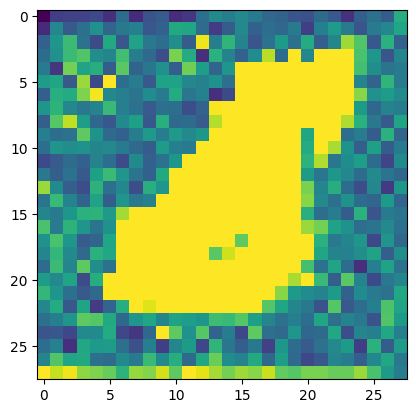


Epoch: 12 | Learning Rate: 0.0008
0.04385010525584221
0.04358173906803131
0.0466434545814991
0.045711372047662735
0.047331083565950394
0.04382229596376419
0.046235401183366776
0.04710490629076958
0.04375259950757027
0.04526510462164879
0.04183549806475639
0.04276862367987633
0.04577823355793953
0.04518015310168266
0.04434680938720703
0.04445050656795502
0.04332058131694794
0.04449529945850372
0.04802466928958893
0.04236005246639252
0.04261277616024017
0.04448338970541954
0.04393387585878372
0.04739493131637573
0.04460426792502403
0.0438338965177536
0.041797470301389694
0.04334210604429245
0.04051937907934189
0.04406993091106415
0.04336313158273697
0.04793192446231842
0.04285865277051926
0.04431028291583061
0.04462527111172676
0.04678460583090782
0.04309903085231781
0.04394105076789856
0.04317302629351616
0.04420994222164154
0.04343302175402641
0.04504261910915375
0.043454982340335846
0.04414546489715576
0.045684814453125
0.043310679495334625
0.04764733090996742
0.04306855797767639
0.0

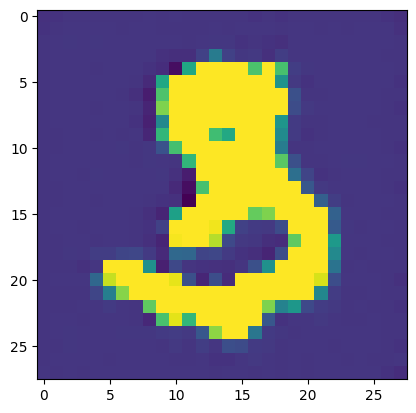


Epoch: 13 | Learning Rate: 0.0008
0.04616249352693558
0.043526776134967804
0.045895058661699295
0.04621691629290581
0.04635302722454071
0.04552038758993149
0.04367084428668022
0.04415937140583992
0.04540938511490822
0.04501023516058922
0.04172384738922119
0.04392193630337715
0.04256286844611168
0.04283205419778824
0.04461047053337097
0.045365605503320694
0.044508375227451324
0.045294139534235
0.044590868055820465
0.04208601638674736
0.04270936921238899
0.045031528919935226
0.04588785767555237
0.04326147958636284
0.04270801320672035
0.04214968904852867
0.04568320885300636
0.0418996699154377
0.04224054142832756
0.044296666979789734
0.04488445073366165
0.04468528926372528
0.04072628542780876
0.04654255509376526
0.04527773708105087
0.04209408536553383
0.04285643994808197
0.04371624439954758
0.04541924595832825
0.04342424124479294
0.04256530478596687
0.04438464343547821
0.04202752560377121
0.04165807366371155
0.04342369735240936
0.04380381852388382
0.04327641427516937
0.04230988770723343
0

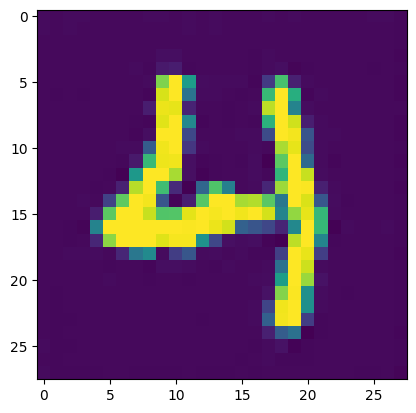


Epoch: 14 | Learning Rate: 0.0008
0.042265597730875015
0.04319195821881294
0.04412033036351204
0.04337446019053459
0.04360995069146156
0.046008769422769547
0.044409625232219696
0.044006433337926865
0.04388245567679405
0.044724881649017334
0.04076962545514107
0.045736074447631836
0.043889082968235016
0.04491567984223366
0.04166524112224579
0.042832907289266586
0.048326704651117325
0.043832890689373016
0.0416579432785511
0.043591201305389404
0.04504191130399704
0.04197138920426369
0.04297082498669624
0.044396959245204926
0.04399631544947624
0.04380938038229942
0.04294026643037796
0.04240890219807625
0.044702596962451935
0.04394437372684479
0.04078109934926033
0.04100653901696205
0.04424126073718071
0.04475758597254753
0.043565042316913605
0.04385843500494957
0.04775098338723183
0.042990606278181076
0.04420652985572815
0.04145793616771698
0.0429794006049633
0.041496675461530685
0.04417334496974945
0.04408394545316696
0.04297196865081787
0.04298054426908493
0.042609523981809616
0.04130941

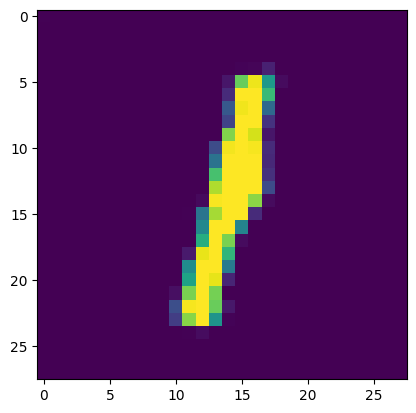


Epoch: 15 | Learning Rate: 0.0008
0.042476654052734375
0.04390106350183487
0.04170135408639908
0.043702542781829834
0.045614562928676605
0.04202011600136757
0.04202607646584511
0.04241567477583885
0.03977952152490616
0.04253004118800163
0.04072887822985649
0.04083145409822464
0.044144392013549805
0.04443509504199028
0.045195385813713074
0.0432196706533432
0.04238302633166313
0.042051900178194046
0.043251775205135345
0.0403405986726284
0.04153167083859444
0.04196649044752121
0.042482782155275345
0.041162002831697464
0.04356025159358978
0.04213584214448929
0.042803674936294556
0.0454966239631176
0.04380131512880325
0.041790254414081573
0.04432874545454979
0.040126584470272064
0.04481125622987747
0.04218699783086777
0.04417658597230911
0.04289219155907631
0.04441240429878235
0.04249222204089165
0.04324392229318619
0.041855260729789734
0.04557528719305992
0.04139856994152069
0.042641930282115936
0.041189324110746384
0.04218289256095886
0.04169485345482826
0.04409770667552948
0.04360784217

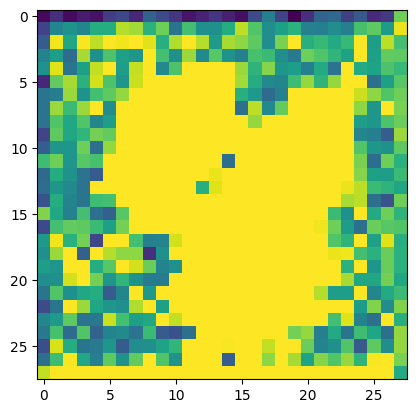


Epoch: 16 | Learning Rate: 0.0008
0.042925428599119186
0.04262610152363777
0.04434632509946823
0.044233519583940506
0.041736602783203125
0.043591342866420746
0.04206960275769234
0.042355988174676895
0.042131032794713974
0.04202122613787651
0.04231242090463638
0.042860083281993866
0.04237934574484825
0.041889775544404984
0.042334944009780884
0.0421619787812233
0.043001145124435425
0.04520024359226227
0.042470820248126984
0.04201166704297066
0.042016223073005676
0.04165405407547951
0.04473842680454254
0.04337172955274582
0.04252397641539574
0.04304928705096245
0.04203960672020912
0.04132530093193054
0.03837969899177551
0.04123704135417938
0.04116928577423096
0.04139575734734535
0.04219815135002136
0.04180624336004257
0.04260056093335152
0.041940852999687195
0.04171162098646164
0.041410572826862335
0.04284386336803436
0.04502381011843681
0.0417262464761734
0.042089492082595825
0.04324902221560478
0.0406399741768837
0.04158279672265053
0.0399298258125782
0.03959805145859718
0.042415373027

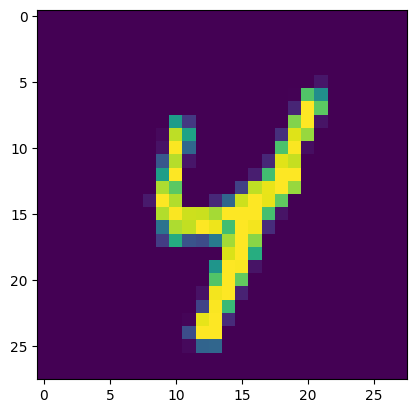


Epoch: 17 | Learning Rate: 0.0008
0.042280666530132294
0.03997252508997917
0.039418064057826996
0.04231748729944229
0.043263521045446396
0.04071064665913582
0.03981553390622139
0.043646518141031265
0.04055303707718849
0.03932378441095352
0.04098290577530861
0.04251410812139511
0.04085264354944229
0.04281734302639961
0.04172521457076073
0.039940424263477325
0.04237474501132965
0.04438084736466408
0.04197883605957031
0.04142027348279953
0.04191228747367859
0.042051684111356735
0.044383734464645386
0.04221392050385475
0.042645007371902466
0.04348933696746826
0.040021855384111404
0.04032203555107117
0.041098251938819885
0.04153239727020264
0.04247061163187027
0.0420454666018486
0.0408400222659111
0.03904106095433235
0.04081147536635399
0.04127024486660957
0.04127459228038788
0.040364526212215424
0.042141757905483246
0.044883619993925095
0.04147010296583176
0.042666055262088776
0.043548714369535446
0.041901253163814545
0.03913155198097229
0.0421009436249733
0.04195992648601532
0.0426749847

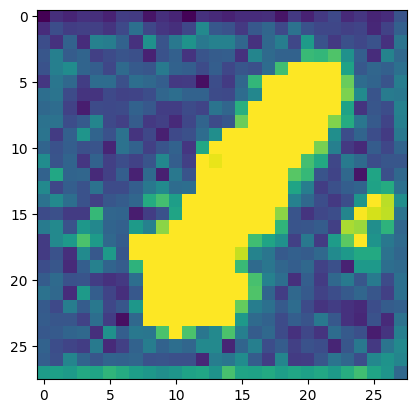


Epoch: 18 | Learning Rate: 0.0008
0.04073907434940338
0.042700719088315964
0.04113705828785896
0.042102567851543427
0.039746154099702835
0.04030807688832283
0.04371847212314606
0.04174720123410225
0.03966072201728821
0.04092128947377205
0.03973756358027458
0.04079779237508774
0.042061951011419296
0.03954581916332245
0.03992252051830292
0.0429866798222065
0.04308421164751053
0.041445206850767136
0.04409492760896683
0.041027817875146866
0.03889378160238266
0.04193998873233795
0.043192677199840546
0.04017627611756325
0.04156677424907684
0.04050209000706673
0.04178347438573837
0.04056617617607117
0.03962087631225586
0.040683992207050323
0.041728533804416656
0.04152528569102287
0.04067224636673927
0.04297277703881264
0.042099036276340485
0.038822710514068604
0.04384623467922211
0.04187900573015213
0.04078679159283638
0.04167988896369934
0.038993000984191895
0.04120829701423645
0.04059396684169769
0.0409737266600132
0.0408649779856205
0.0428796149790287
0.041383273899555206
0.04201648756861

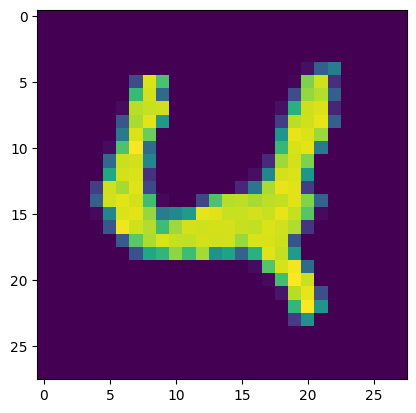


Epoch: 19 | Learning Rate: 0.0008
0.04131525754928589
0.03934891149401665
0.043873000890016556
0.03941647335886955
0.039844077080488205
0.04125644639134407
0.042070433497428894
0.04312669858336449
0.041609831154346466
0.04007368162274361
0.0409112423658371
0.040594227612018585
0.038869984447956085
0.03970413655042648
0.042278390377759933
0.04083551466464996
0.04060685634613037
0.04005441814661026
0.0400628000497818
0.038619108498096466
0.03979731723666191
0.03960620239377022
0.03933907300233841
0.03799047693610191
0.041379913687705994
0.0385037437081337
0.0395270474255085
0.0418735109269619
0.042363572865724564
0.04140685871243477
0.03906138613820076
0.0416034460067749
0.040875814855098724
0.04057750478386879
0.039644405245780945
0.03818054124712944
0.04008343815803528
0.03903026878833771
0.03877277299761772
0.04056908190250397
0.039329808205366135
0.04354952275753021
0.03913383185863495
0.0408322736620903
0.04093023017048836
0.03826829046010971
0.04252490773797035
0.04103946685791015

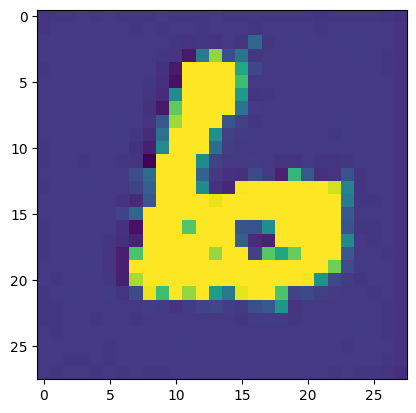


Epoch: 20 | Learning Rate: 0.0008
0.04181637987494469
0.04261605441570282
0.04256727173924446
0.04276280477643013
0.03983170911669731
0.04139048606157303
0.04140612110495567
0.04045337811112404
0.03943073749542236
0.0398876890540123
0.037999123334884644
0.04304759204387665
0.03895818442106247
0.04157400503754616
0.04015325754880905
0.042772743850946426
0.039257075637578964
0.04073493555188179
0.038832999765872955
0.03991436958312988
0.039823949337005615
0.04027385264635086
0.04114539548754692
0.043368782848119736
0.04078047350049019
0.037590716034173965
0.04094505310058594
0.03993014246225357
0.0410090796649456
0.04031102731823921
0.040764983743429184
0.04076974093914032
0.03936583921313286
0.04247771576046944
0.04070517048239708
0.041985657066106796
0.04021210968494415
0.03915289416909218
0.03940232843160629
0.03985295444726944
0.04060548171401024
0.03896915167570114
0.042704787105321884
0.042389851063489914
0.04255993291735649
0.04021250829100609
0.040468763560056686
0.0391954407095

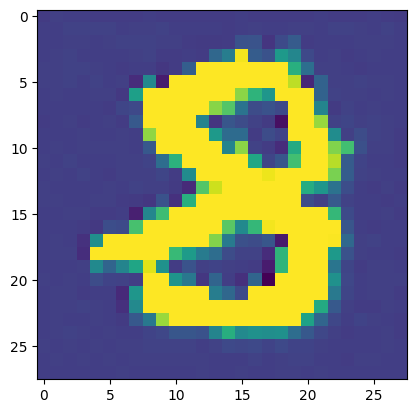


Epoch: 21 | Learning Rate: 0.00064
0.041555989533662796
0.043525297194719315
0.039570558816194534
0.03848613426089287
0.040214624255895615
0.04062352702021599
0.039963249117136
0.0388655886054039
0.04258761927485466
0.03986474499106407
0.04096005856990814
0.03849106281995773
0.04036738723516464
0.03926053270697594
0.04094845801591873
0.04136700555682182
0.040983762592077255
0.03956754133105278
0.03925776854157448
0.03998607024550438
0.04119015485048294
0.043129634112119675
0.03799678385257721
0.04127800092101097
0.041748303920030594
0.040376100689172745
0.039836205542087555
0.04099098592996597
0.03937140107154846
0.03956170752644539
0.041477035731077194
0.039246998727321625
0.04017568379640579
0.03753441199660301
0.040284957736730576
0.040864601731300354
0.04053541645407677
0.04044342786073685
0.03953861445188522
0.03913680836558342
0.040227849036455154
0.04033992812037468
0.0415315143764019
0.040954913944005966
0.0399714820086956
0.04196803271770477
0.03972785547375679
0.039006162434

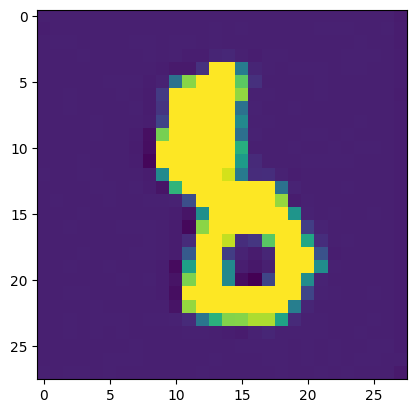


Epoch: 22 | Learning Rate: 0.00064
0.04072242230176926
0.038357771933078766
0.03935801237821579
0.038954757153987885
0.04128700867295265
0.04026871547102928
0.040824469178915024
0.04052850976586342
0.03979530930519104
0.0381004698574543
0.041011419147253036
0.04027499258518219
0.037513114511966705
0.03904946148395538
0.04162943363189697
0.04237755760550499
0.03783943131566048
0.04038866609334946
0.038724109530448914
0.03962975740432739
0.04228085279464722
0.03887566179037094
0.0401257649064064
0.03932390362024307
0.04208049923181534
0.04028325155377388
0.03922879695892334
0.04021579399704933
0.040673594921827316
0.03903190419077873
0.038662366569042206
0.03921301290392876
0.04035869613289833
0.04060850664973259
0.03921249881386757
0.040025822818279266
0.04080498218536377
0.0381275899708271
0.04050273820757866
0.039793919771909714
0.03926588222384453
0.038739435374736786
0.04115038737654686
0.03935302421450615
0.04031705856323242
0.04038309305906296
0.04100457578897476
0.04072612151503

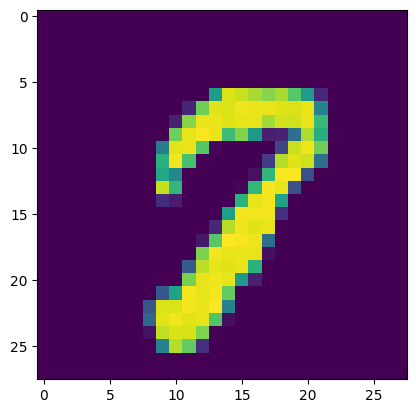


Epoch: 23 | Learning Rate: 0.00064
0.03887562453746796
0.040501173585653305
0.0409466028213501
0.03991495817899704
0.041685931384563446
0.039034970104694366
0.04104561731219292
0.040161680430173874
0.03939954936504364
0.04022285342216492
0.04099093750119209
0.03908410668373108
0.04121328145265579
0.037790797650814056
0.03854785114526749
0.038299329578876495
0.03859735280275345
0.03879095986485481
0.038691550493240356
0.03857859596610069
0.03934793546795845
0.040011096745729446
0.03900356590747833
0.042055513709783554
0.037204843014478683
0.03982498496770859
0.03944936394691467
0.039663560688495636
0.03939959034323692
0.03734755516052246
0.038933783769607544
0.040300168097019196
0.04063510522246361
0.0348818264901638
0.03984662890434265
0.040012288838624954
0.040223538875579834
0.039129588752985
0.03862139210104942
0.03976946324110031
0.03970362991094589
0.04021453857421875
0.04027034342288971
0.03867131844162941
0.040450066328048706
0.04075177386403084
0.038642507046461105
0.040768478

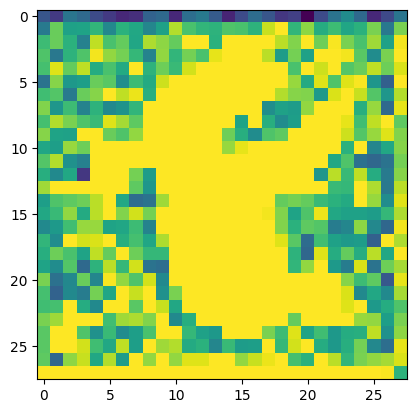


Epoch: 24 | Learning Rate: 0.00064
0.03985585272312164
0.040903955698013306
0.03894306719303131
0.03957783430814743
0.04067637398838997
0.03921103850007057
0.03747132420539856
0.03987954184412956
0.03794649615883827
0.040610816329717636
0.03992818295955658
0.03781229630112648
0.03901156410574913
0.0409487746655941
0.03930819779634476
0.03890317305922508
0.040064919739961624
0.04088495671749115
0.038008227944374084
0.036676015704870224
0.04029572382569313
0.03859171271324158
0.039026085287332535
0.03699236363172531
0.03960641846060753
0.03846015781164169
0.03994164988398552
0.038813747465610504
0.04081127047538757
0.040364790707826614
0.038324251770973206
0.039705999195575714
0.03739054873585701
0.03790179640054703
0.03975275158882141
0.04135178029537201
0.038777176290750504
0.04032501205801964
0.04062895104289055
0.04097232595086098
0.03900003060698509
0.03855295851826668
0.03958434239029884
0.04121684283018112
0.03792284056544304
0.039293691515922546
0.038988757878541946
0.0388775020

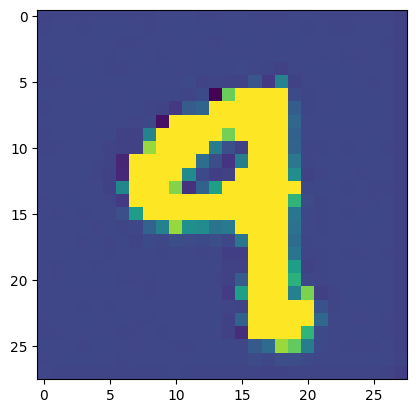


Epoch: 25 | Learning Rate: 0.00064
0.041187744587659836
0.03505363315343857
0.03874577581882477
0.03882433474063873
0.03934109956026077
0.039316464215517044
0.04095141217112541
0.03967790678143501
0.04120275378227234
0.0394495390355587
0.040403228253126144
0.039263077080249786
0.03730589523911476
0.038315095007419586
0.03990798816084862
0.03853624686598778
0.03898328170180321
0.040252771228551865
0.03607910871505737
0.037843260914087296
0.04053793475031853
0.039522189646959305
0.039717402309179306
0.03969996050000191
0.03793737664818764
0.036918070167303085
0.04046444594860077
0.037780482321977615
0.04065611958503723
0.038230959326028824
0.03840315341949463
0.04217354208230972
0.040742892771959305
0.04067768156528473
0.039307694882154465
0.037593696266412735
0.038454942405223846
0.04040554165840149
0.03817148134112358
0.03989183157682419
0.04105542600154877
0.03963601589202881
0.040284305810928345
0.040271587669849396
0.039498671889305115
0.039619676768779755
0.04010799899697304
0.037

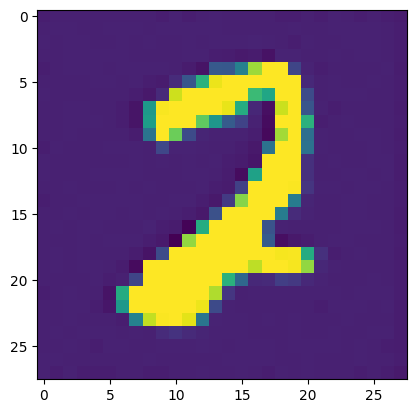


Epoch: 26 | Learning Rate: 0.00064
0.04127410799264908
0.03940033167600632
0.03746289759874344
0.03880545124411583
0.03734707087278366
0.040115565061569214
0.03819534555077553
0.03825514763593674
0.03809143602848053
0.04120948165655136
0.040005989372730255
0.0369771346449852
0.038749225437641144
0.038640089333057404
0.038941092789173126
0.03792225196957588
0.03618321940302849
0.03807598724961281
0.038941189646720886
0.039651576429605484
0.03792046383023262
0.039136454463005066
0.04001074284315109
0.04148028790950775
0.03932473435997963
0.03894510865211487
0.03967239707708359
0.03947843611240387
0.03989188373088837
0.038347601890563965
0.04009171202778816
0.03934318572282791
0.03906525671482086
0.03665211796760559
0.03709910437464714
0.03893202915787697
0.03856389597058296
0.03672327101230621
0.03826316073536873
0.0407998152077198
0.03719307482242584
0.03804692253470421
0.03891468420624733
0.038213230669498444
0.03762630373239517
0.041684839874506
0.03847343102097511
0.0367636904120445

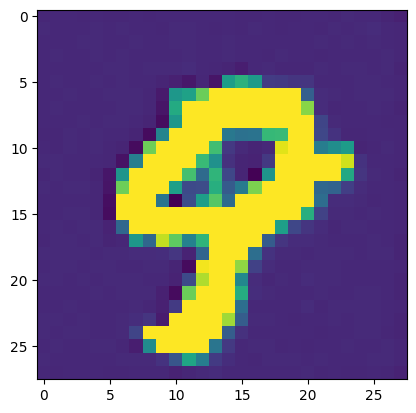


Epoch: 27 | Learning Rate: 0.00064
0.03863240033388138
0.03669281303882599
0.037975478917360306
0.038838911801576614
0.03948649391531944
0.037329915910959244
0.038394927978515625
0.03741804510354996
0.03702579811215401
0.03984816372394562
0.03597862273454666
0.03717561438679695
0.03854764997959137
0.03935243934392929
0.039114899933338165
0.03701142966747284
0.03908924013376236
0.03582955151796341
0.04051794484257698
0.03700500726699829
0.03809378668665886
0.03972288966178894
0.039490681141614914
0.038353946059942245
0.04045732691884041
0.0389331579208374
0.03809647634625435
0.03876986354589462
0.040214937180280685
0.03972524777054787
0.03864679113030434
0.03914959728717804
0.03818070515990257
0.04005302116274834
0.03940248861908913
0.037394944578409195
0.03950444236397743
0.037266653031110764
0.03750324249267578
0.035974252969026566
0.03796621039509773
0.03701929748058319
0.0388554222881794
0.038952380418777466
0.03871467709541321
0.03937898203730583
0.0383974052965641
0.0385196506977

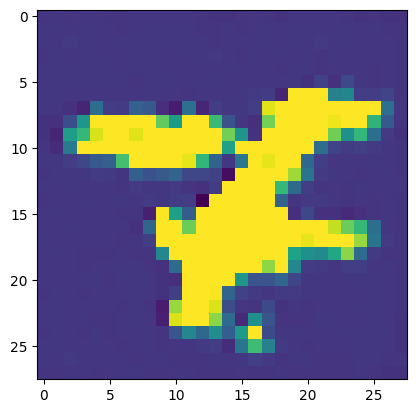


Epoch: 28 | Learning Rate: 0.00064
0.040099311619997025
0.03682148456573486
0.03881454095244408
0.03595152124762535
0.037062983959913254
0.040438100695610046
0.03616180270910263
0.03713603317737579
0.037926044315099716
0.03885914385318756
0.03688209876418114
0.03771781176328659
0.040503572672605515
0.03791152313351631
0.03767450898885727
0.03794628754258156
0.040133003145456314
0.03728274628520012
0.03777076303958893
0.03806488960981369
0.037008896470069885
0.03836681693792343
0.037313323467969894
0.03812496364116669
0.03728467598557472
0.038652777671813965
0.04023941233754158
0.039335861802101135
0.03865428641438484
0.0358286052942276
0.04056072235107422
0.037551674991846085
0.03859325125813484
0.036154210567474365
0.03788301721215248
0.04097411036491394
0.037424542009830475
0.038106005638837814
0.03664897382259369
0.03681744262576103
0.03843807429075241
0.0377686582505703
0.039794184267520905
0.0383850559592247
0.03739361837506294
0.03941681981086731
0.03999781981110573
0.0370701365

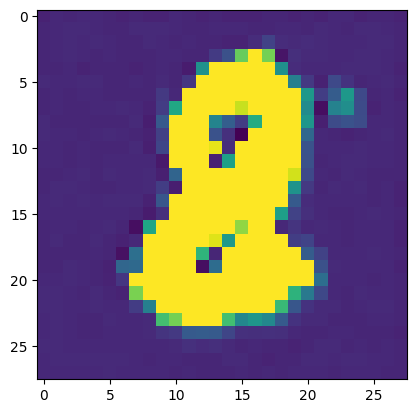


Epoch: 29 | Learning Rate: 0.00064
0.03715130686759949
0.03906433284282684
0.03819970786571503
0.03746740147471428
0.0374145433306694
0.03898729383945465
0.04024151340126991
0.03703554719686508
0.040370453149080276
0.03828497603535652
0.03931577131152153
0.038788896054029465
0.040053967386484146
0.03748933970928192
0.037719935178756714
0.03768760338425636
0.04039828106760979
0.03938355669379234
0.038294851779937744
0.038759615272283554
0.040378138422966
0.03956896439194679
0.03913357853889465
0.03786846995353699
0.037482138723134995
0.03723138943314552
0.03852077201008797
0.03666125610470772
0.03946606442332268
0.04061198979616165
0.03907615318894386
0.036670565605163574
0.035599011927843094
0.03678544983267784
0.038805458694696426
0.03977925702929497
0.03938506543636322
0.03680357709527016
0.0373135581612587
0.036922525614500046
0.0384192019701004
0.03805983439087868
0.03756031021475792
0.03952273353934288
0.037666868418455124
0.03868182376027107
0.03831996023654938
0.038005668669939

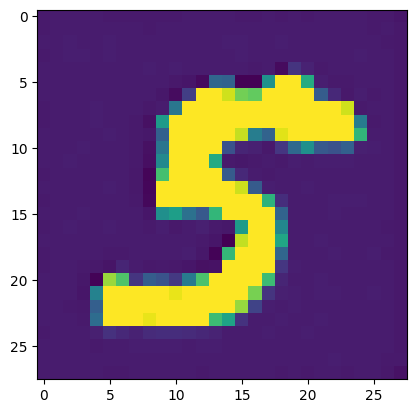


Epoch: 30 | Learning Rate: 0.00064
0.03917675092816353
0.037660181522369385
0.037765562534332275
0.04033689573407173
0.03778642788529396
0.038969866931438446
0.03849560394883156
0.03858078643679619
0.03687702864408493
0.03957312926650047
0.03828345984220505
0.03628651425242424
0.03660791739821434
0.03763880953192711
0.0378522127866745
0.03539682552218437
0.03746061772108078
0.03859798237681389
0.03814168646931648
0.039166051894426346
0.03890549764037132
0.03955753520131111
0.038389213383197784
0.037537407130002975
0.03748150169849396
0.04095669090747833
0.039499808102846146
0.038391221314668655
0.03854576125741005
0.039729371666908264
0.03796400502324104
0.0377262607216835
0.03554089739918709
0.038691431283950806
0.038782935589551926
0.03919249027967453
0.0396033339202404
0.03970824554562569
0.03860381618142128
0.03930969908833504
0.03835911676287651
0.03719184175133705
0.036698490381240845
0.03596262261271477
0.03877352178096771
0.03958757594227791
0.0362858846783638
0.03723686560988

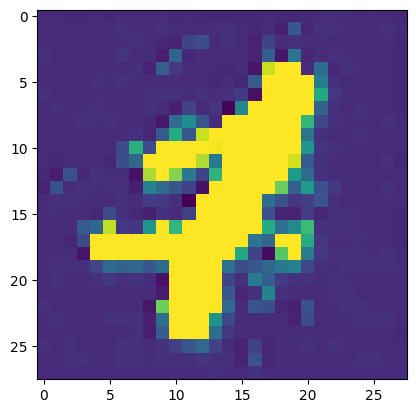


Epoch: 31 | Learning Rate: 0.0005120000000000001
0.037897203117609024
0.037000078707933426
0.03827352449297905
0.03914429992437363
0.03967694193124771
0.04064652696251869
0.037973951548337936
0.0390632301568985
0.038028836250305176
0.03643195331096649
0.0385751910507679
0.03996148705482483
0.037826504558324814
0.03865872696042061
0.038110699504613876
0.03841457888484001
0.038803450763225555
0.03946062549948692
0.03909404203295708
0.03691304102540016
0.03617025166749954
0.0379389189183712
0.03955402597784996
0.0371682308614254
0.03877965360879898
0.03718728944659233
0.03618248552083969
0.03911685198545456
0.038784369826316833
0.03641565516591072
0.03648616746068001
0.037351273000240326
0.038203272968530655
0.039698950946331024
0.03687939792871475
0.03812699392437935
0.038700222969055176
0.03850210830569267
0.037138309329748154
0.0389789380133152
0.03830761834979057
0.03730011731386185
0.03793976828455925
0.03509277105331421
0.03501831740140915
0.03912593424320221
0.03779353201389313
0.

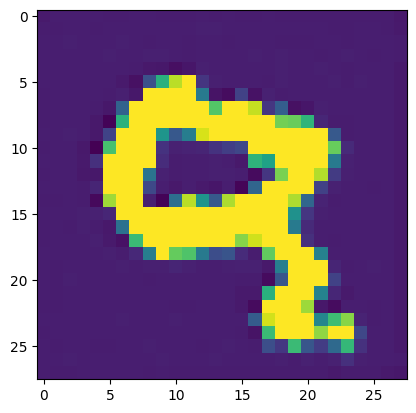


Epoch: 32 | Learning Rate: 0.0005120000000000001
0.039033859968185425
0.03699492663145065
0.03853034973144531
0.038983192294836044
0.03889874741435051
0.037879399955272675
0.03716258704662323
0.03552025556564331
0.03778330981731415
0.038415420800447464
0.03613855317234993
0.03991580009460449
0.03651643544435501
0.03903011605143547
0.03688269108533859
0.03712015226483345
0.03710633143782616
0.03644435107707977
0.0380413718521595
0.037892259657382965
0.03671763092279434
0.0383780337870121
0.036477070301771164
0.03819567710161209
0.03914249688386917
0.037488095462322235
0.036782246083021164
0.03857773169875145
0.03807228431105614
0.03737220540642738
0.038730062544345856
0.03733118996024132
0.037799589335918427
0.03838582709431648
0.03734319657087326
0.03823506459593773
0.03846809267997742
0.03820590674877167
0.036523349583148956
0.03785794600844383
0.03742094710469246
0.03699633106589317
0.039688561111688614
0.03567459061741829
0.037077248096466064
0.03855672478675842
0.03847378119826317

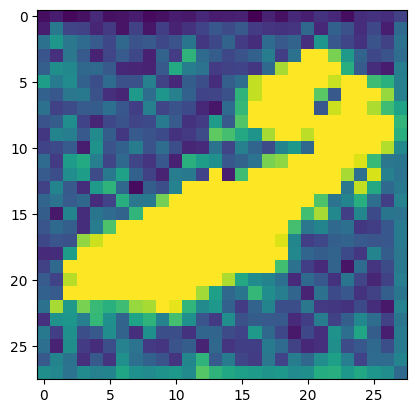


Epoch: 33 | Learning Rate: 0.0005120000000000001
0.03953999653458595
0.03766679763793945
0.040726207196712494
0.03806142881512642
0.037135712802410126
0.03879117965698242
0.038398485630750656
0.037524156272411346
0.03678569570183754
0.039814528077840805
0.03576685115695
0.036392971873283386
0.039266254752874374
0.036999113857746124
0.038282185792922974
0.03489099442958832
0.03863316401839256
0.035756465047597885
0.03963731229305267
0.037626516073942184
0.035843200981616974
0.04053448885679245
0.03828509524464607
0.037816353142261505
0.03733415901660919
0.036460332572460175
0.036443937569856644
0.035632211714982986
0.038354333490133286
0.03768834099173546
0.038009315729141235
0.03714502602815628
0.03835243359208107
0.03813325613737106
0.03820089250802994
0.03988741710782051
0.03949696943163872
0.036748871207237244
0.03680377081036568
0.03888006508350372
0.03802323713898659
0.03704763203859329
0.03896244987845421
0.037380825728178024
0.03759227693080902
0.039383549243211746
0.0369438081

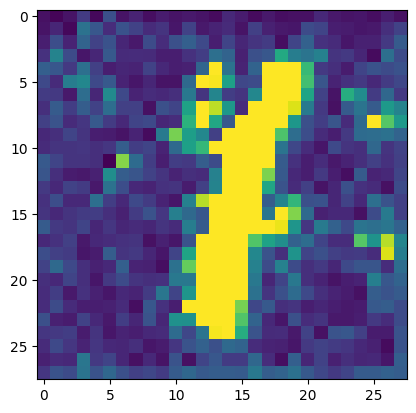


Epoch: 34 | Learning Rate: 0.0005120000000000001
0.03814239427447319
0.038362257182598114
0.03705507144331932
0.03948501870036125
0.03841722011566162
0.03826075419783592
0.03807162120938301
0.03796086832880974
0.03785056993365288
0.037676576524972916
0.037402331829071045
0.036663610488176346
0.03884660825133324
0.03533155098557472
0.038362715393304825
0.03802984580397606
0.03489460051059723
0.039477188140153885
0.0375031977891922
0.038554444909095764
0.03755129128694534
0.03791718930006027
0.0369005911052227
0.038390323519706726
0.03801605477929115
0.036401305347681046
0.03488221392035484
0.03727653995156288
0.038167841732501984
0.037797339260578156
0.03656121715903282
0.0375589057803154
0.038679223507642746
0.03601676598191261
0.037301305681467056
0.037178754806518555
0.03511306643486023
0.03744713217020035
0.039240237325429916
0.03565087169408798
0.03682195022702217
0.03797388821840286
0.03671394661068916
0.036641865968704224
0.038072653114795685
0.039926592260599136
0.0391199328005

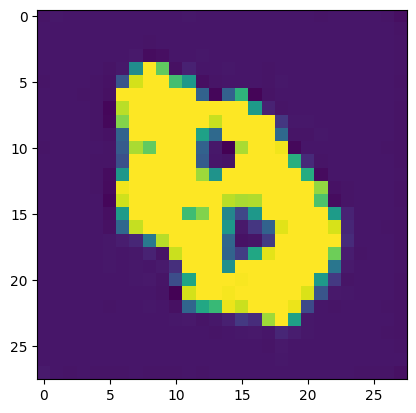


Epoch: 35 | Learning Rate: 0.0005120000000000001
0.03953150659799576
0.03711075708270073
0.03744680806994438
0.037606243044137955
0.03594254329800606
0.037745989859104156
0.037908099591732025
0.03850743919610977
0.03861477971076965
0.0367695651948452
0.03840070962905884
0.03785893693566322
0.0370708666741848
0.03712303191423416
0.039787497371435165
0.03660542145371437
0.03774769976735115
0.03575405851006508
0.03509006276726723
0.037043243646621704
0.0377843901515007
0.037222135812044144
0.03632466867566109
0.03709390014410019
0.03760644420981407
0.03802233934402466
0.03779241070151329
0.036584995687007904
0.038619279861450195
0.037020351737737656
0.037828315049409866
0.036421630531549454
0.03734105825424194
0.03674399107694626
0.03749879449605942
0.036756742745637894
0.03728359565138817
0.038423631340265274
0.03871787339448929
0.038668107241392136
0.03785114362835884
0.0363411083817482
0.03788546100258827
0.03720938041806221
0.03812374547123909
0.03773760050535202
0.038446296006441116

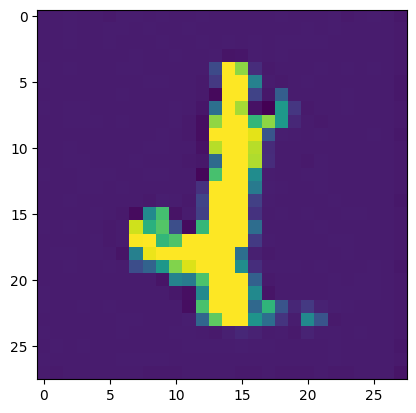


Epoch: 36 | Learning Rate: 0.0005120000000000001
0.03563617914915085
0.038492050021886826
0.036846455186605453
0.037091054022312164
0.03793567419052124
0.03656260669231415
0.039285168051719666
0.037681709975004196
0.03666379675269127
0.03858862817287445
0.03701956197619438
0.04079659655690193
0.037542372941970825
0.037314899265766144
0.03535250574350357
0.03615604713559151
0.03721987456083298
0.03812592476606369
0.03823361173272133
0.03692537546157837
0.03938312456011772
0.03701016679406166
0.03774520382285118
0.03740294650197029
0.03839484974741936
0.03889799118041992
0.03703387826681137
0.03676508739590645
0.03817647695541382
0.03844495490193367
0.035642098635435104
0.036871422082185745
0.03733684867620468
0.03750942647457123
0.03670762851834297
0.03789609670639038
0.035324182361364365
0.036930594593286514
0.036847375333309174
0.03683305159211159
0.03433145582675934
0.03681454807519913
0.035847049206495285
0.037478189915418625
0.03695715218782425
0.036237675696611404
0.0367879644036

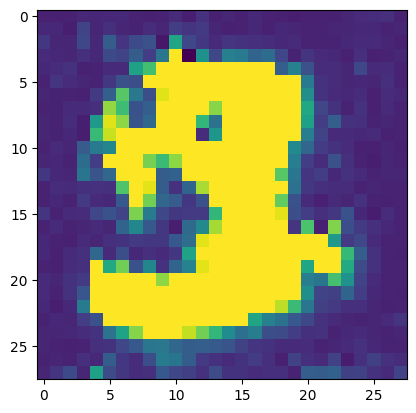


Epoch: 37 | Learning Rate: 0.0005120000000000001
0.03624391928315163
0.03770001232624054
0.038091376423835754
0.03757723793387413
0.03776146471500397
0.039044227451086044
0.038366299122571945
0.03828943520784378
0.037351373583078384
0.036875780671834946
0.03724728152155876
0.03477668762207031
0.03872133791446686
0.03771147504448891
0.03857417032122612
0.035871975123882294
0.03692213445901871
0.037047937512397766
0.03469675034284592
0.037933994084596634
0.035925041884183884
0.03510689362883568
0.037038348615169525
0.03745165094733238
0.03868696466088295
0.03890256956219673
0.03619574010372162
0.03697580471634865
0.03860476240515709
0.03755825757980347
0.036954257637262344
0.03299298137426376
0.03888677805662155
0.0377047136425972
0.0368805006146431
0.03674318641424179
0.03964272886514664
0.03947560489177704
0.03674859553575516
0.03770684450864792
0.03558283671736717
0.0385698527097702
0.03876792639493942
0.03657270222902298
0.034407347440719604
0.037623632699251175
0.039307139813899994

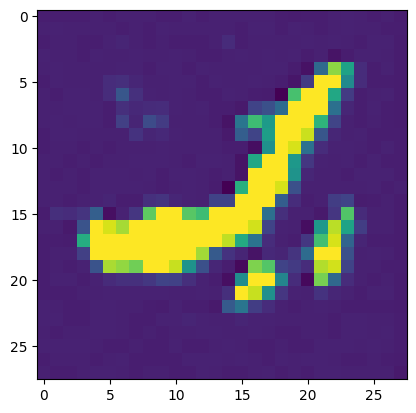


Epoch: 38 | Learning Rate: 0.0005120000000000001
0.03648624196648598
0.03655858710408211
0.03877033293247223
0.03790115937590599
0.038556620478630066
0.03781605511903763
0.03648308664560318
0.036448948085308075
0.03971618786454201
0.03703881800174713
0.038556747138500214
0.03589833527803421
0.03775414451956749
0.03700454160571098
0.03858553245663643
0.036373570561409
0.03776729851961136
0.03601587936282158
0.03615851327776909
0.038050659000873566
0.03517991676926613
0.03600667417049408
0.036222461611032486
0.0365133136510849
0.03617614507675171
0.03807659447193146
0.03724340349435806
0.0383499339222908
0.03976775333285332
0.03729623183608055
0.03720781207084656
0.038633860647678375
0.03649633377790451
0.03833012655377388
0.03797173500061035
0.03882243484258652
0.03655586019158363
0.038535743951797485
0.03766968101263046
0.037391744554042816
0.037409182637929916
0.03639857470989227
0.03884647786617279
0.03756437078118324
0.037284694612026215
0.039275091141462326
0.036117952316999435
0.

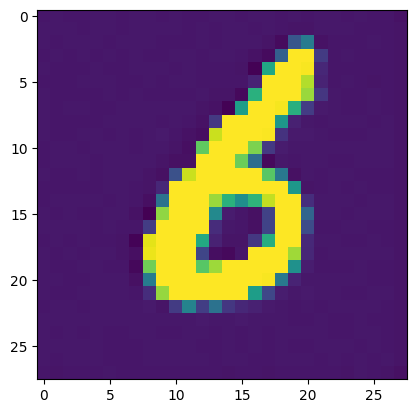


Epoch: 39 | Learning Rate: 0.0005120000000000001
0.03781682252883911
0.03708891570568085
0.037536200135946274
0.036402832716703415
0.036882512271404266
0.03565147891640663
0.036427851766347885
0.03619565814733505
0.03735210746526718
0.03717217966914177
0.03504448011517525
0.03759597986936569
0.03985317423939705
0.038052257150411606
0.036640800535678864
0.037230782210826874
0.03580006584525108
0.03609616681933403
0.03677397593855858
0.03592590615153313
0.039033349603414536
0.03572927042841911
0.036641351878643036
0.03770929202437401
0.0364205576479435
0.036659836769104004
0.03745504841208458
0.040730468928813934
0.03770549222826958
0.03949971869587898
0.03742767870426178
0.037383388727903366
0.03891528770327568
0.03691813722252846
0.037682805210351944
0.03792600706219673
0.03613569587469101
0.036735255271196365
0.03780945762991905
0.03797849640250206
0.03591620922088623
0.038280002772808075
0.03726199269294739
0.03686374053359032
0.0349242277443409
0.037424538284540176
0.03735182061791

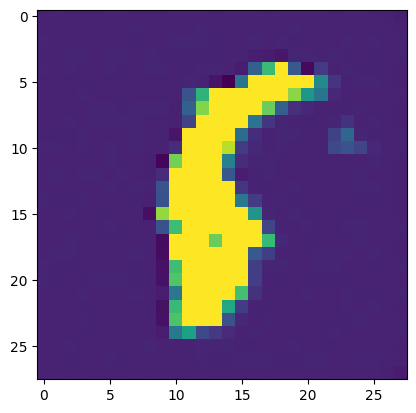


Epoch: 40 | Learning Rate: 0.0005120000000000001
0.03635529428720474
0.037141475826501846
0.03958450257778168
0.03579973429441452
0.0360192209482193
0.03989462926983833
0.03649033233523369
0.036889173090457916
0.03681453689932823
0.03904817998409271
0.03753800317645073
0.03752849996089935
0.03695101663470268
0.037162620574235916
0.039396267384290695
0.03679822385311127
0.03570712357759476
0.037387821823358536
0.03643808886408806
0.03738471865653992
0.03681297227740288
0.037572477012872696
0.036204639822244644
0.03725066035985947
0.038102809339761734
0.03669600188732147
0.03874281048774719
0.03782782331109047
0.037281908094882965
0.03718436136841774
0.036292914301157
0.03679819777607918
0.03847087174654007
0.03748060017824173
0.03655862808227539
0.03648889809846878
0.034735504537820816
0.0363234244287014
0.034334953874349594
0.03694172576069832
0.036883383989334106
0.03786027804017067
0.03596239909529686
0.037160877138376236
0.037434034049510956
0.0336797796189785
0.03486134856939316
0

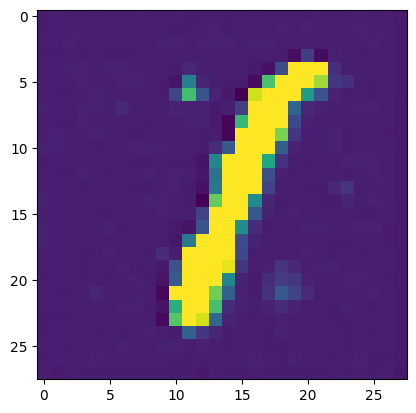


Epoch: 41 | Learning Rate: 0.0004096000000000001
0.03783946484327316
0.03522540628910065
0.03861871361732483
0.03680553659796715
0.03603284806013107
0.03647064045071602
0.03660896047949791
0.03694838285446167
0.03580525889992714
0.037444084882736206
0.03724660351872444
0.034810081124305725
0.03480393812060356
0.03786031901836395
0.03760208189487457
0.03725680336356163
0.03571304306387901
0.035672638565301895
0.035886067897081375
0.03705562278628349
0.036716412752866745
0.03486829251050949
0.03912126645445824
0.037441033869981766
0.038884155452251434
0.03585580736398697
0.03748755902051926
0.038119226694107056
0.0359383150935173
0.04032488912343979
0.03727941960096359
0.03916594758629799
0.03699546679854393
0.0368000827729702
0.03647051751613617
0.03597201034426689
0.03532833978533745
0.03632219508290291
0.040112707763910294
0.03698074072599411
0.03732309862971306
0.037637632340192795
0.036224205046892166
0.03616532310843468
0.03659593686461449
0.03725535050034523
0.03701573237776756
0

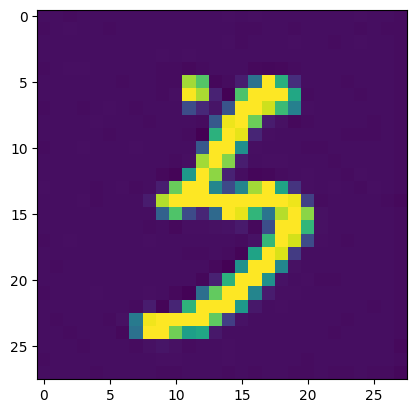


Epoch: 42 | Learning Rate: 0.0004096000000000001
0.0378350168466568
0.03532559052109718
0.03673328086733818
0.0363578163087368
0.03540405258536339
0.036737747490406036
0.037779614329338074
0.039213232696056366
0.03886372223496437
0.036169081926345825
0.0360824391245842
0.03650194779038429
0.03795602545142174
0.03644898906350136
0.03535032644867897
0.03760441765189171
0.03783470019698143
0.03662876784801483
0.03387482464313507
0.03632919862866402
0.037884317338466644
0.03531651571393013
0.03691790997982025
0.03923376277089119
0.036647334694862366
0.035034049302339554
0.03668874874711037
0.03705153241753578
0.038072891533374786
0.035060714930295944
0.03660636767745018
0.037894174456596375
0.03643113002181053
0.03670767694711685
0.03576289489865303
0.036303404718637466
0.0360511913895607
0.03610901162028313
0.03529250994324684
0.03907547518610954
0.034758538007736206
0.03562451899051666
0.038674116134643555
0.03566042333841324
0.036632437258958817
0.03479989618062973
0.03756716102361679


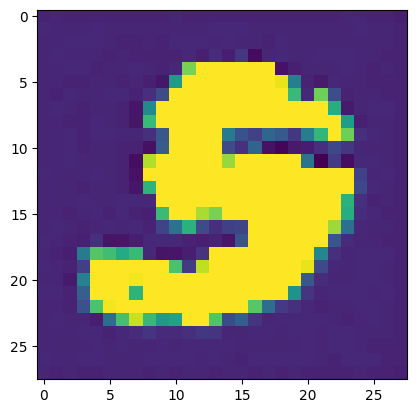


Epoch: 43 | Learning Rate: 0.0004096000000000001
0.03824854642152786
0.03552422672510147
0.038656871765851974
0.03630722314119339
0.0366828516125679
0.03680529445409775
0.037919607013463974
0.03600234165787697
0.03698566555976868
0.036713190376758575
0.03899037092924118
0.03702772408723831
0.03583942726254463
0.03586937487125397
0.03516369313001633
0.03599108010530472
0.034659989178180695
0.036871425807476044
0.03777109459042549
0.03901759535074234
0.03856249898672104
0.037131648510694504
0.03603146970272064
0.03674934804439545
0.03712887689471245
0.03655902296304703
0.036922525614500046
0.03670848533511162
0.036828458309173584
0.03593190386891365
0.03707822784781456
0.03514951094985008
0.03630247339606285
0.03673987090587616
0.03623269870877266
0.03641105815768242
0.03732728213071823
0.03487347438931465
0.03749851882457733
0.03472911939024925
0.03651655465364456
0.03701790049672127
0.03604067489504814
0.03453853353857994
0.03761804848909378
0.03679926320910454
0.035311512649059296
0.

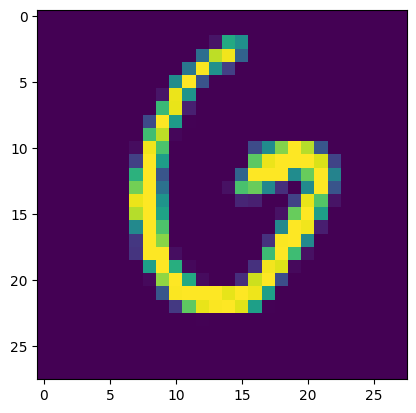


Epoch: 44 | Learning Rate: 0.0004096000000000001
0.036369480192661285
0.03702295199036598
0.03838259354233742
0.03610401600599289
0.035123974084854126
0.03667793422937393
0.03610082343220711
0.03422204405069351
0.03753194585442543
0.03875834494829178
0.03519141674041748
0.03653470799326897
0.03728053346276283
0.03816705569624901
0.03820647671818733
0.03621700406074524
0.03544839099049568
0.0372450090944767
0.036592092365026474
0.035596415400505066
0.03518356382846832
0.03444180265069008
0.039298154413700104
0.03668352961540222
0.03511654958128929
0.038884904235601425
0.036034874618053436
0.036302872002124786
0.03770175948739052
0.03614913672208786
0.035211630165576935
0.034557878971099854
0.036113422363996506
0.03721223771572113
0.03613070398569107
0.03877193480730057
0.038742776960134506
0.03793694078922272
0.036589644849300385
0.03725377842783928
0.036254312843084335
0.03707585111260414
0.03703565150499344
0.03657382354140282
0.037020210176706314
0.03717336803674698
0.03625327721238

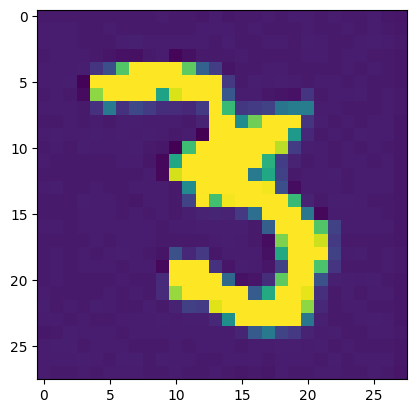


Epoch: 45 | Learning Rate: 0.0004096000000000001
0.03981400281190872
0.03572685271501541
0.03523653745651245
0.03572811186313629
0.03696494549512863
0.03716025874018669
0.035693056881427765
0.03680914640426636
0.03739500790834427
0.03787509724497795
0.037159428000450134
0.039116255939006805
0.035734593868255615
0.037453219294548035
0.03653745725750923
0.03734670951962471
0.03715985268354416
0.03594963252544403
0.036421388387680054
0.03537534549832344
0.03597260266542435
0.03744349628686905
0.04063331335783005
0.03855576738715172
0.03556958585977554
0.03622012212872505
0.034590981900691986
0.03809376433491707
0.035560242831707
0.036506086587905884
0.035767193883657455
0.036785855889320374
0.037553660571575165
0.03693537041544914
0.03669722378253937
0.036151222884655
0.036131951957941055
0.03708503767848015
0.03598996624350548
0.037245407700538635
0.03762233257293701
0.036591656506061554
0.037520334124565125
0.03741876035928726
0.038987595587968826
0.035664089024066925
0.035643976181745

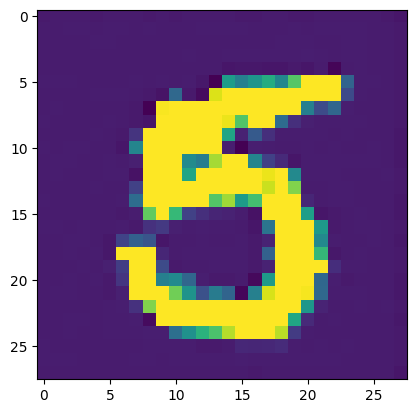


Epoch: 46 | Learning Rate: 0.0004096000000000001
0.03653799742460251
0.03722747415304184
0.038011081516742706
0.036210790276527405
0.036020632833242416
0.036966945976018906
0.03653483837842941
0.03469984978437424
0.0360674150288105
0.0354512594640255
0.0384797602891922
0.03850323706865311
0.03763876482844353
0.036388229578733444
0.03790218010544777
0.03655935078859329
0.03863929584622383
0.0359916053712368
0.03805231302976608
0.03744209557771683
0.03831764683127403
0.03814133629202843
0.03584511950612068
0.033383846282958984
0.034921903163194656
0.03685051575303078
0.0341632105410099
0.03570786118507385
0.035853561013936996
0.03509315848350525
0.036962833255529404
0.03680934011936188
0.03722241520881653
0.038636453449726105
0.038528330624103546
0.037370480597019196
0.03646029159426689
0.03681755065917969
0.035929497331380844
0.03606705367565155
0.036949627101421356
0.03613419830799103
0.03538413345813751
0.035151004791259766
0.03749328851699829
0.036013245582580566
0.03646626695990562

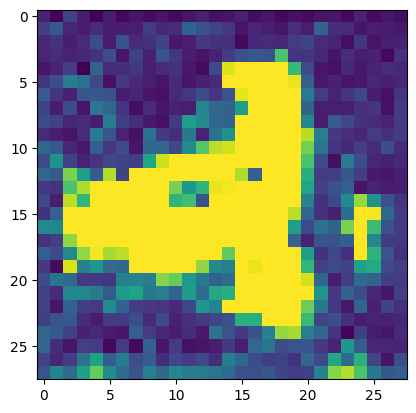


Epoch: 47 | Learning Rate: 0.0004096000000000001
0.036755211651325226
0.03596118092536926
0.037786275148391724
0.03795487806200981
0.03795396909117699
0.037046875804662704
0.03802672028541565
0.0371914878487587
0.036761537194252014
0.03624913841485977
0.03691060468554497
0.036300115287303925
0.03553106635808945
0.035028424113988876
0.0360412634909153
0.03518637642264366
0.036454446613788605
0.03775584325194359
0.03755224868655205
0.036259666085243225
0.03649527207016945
0.03518326207995415
0.034670405089855194
0.033981986343860626
0.0384368933737278
0.03704626113176346
0.03595751151442528
0.03487038239836693
0.03480628877878189
0.03443746268749237
0.035187020897865295
0.036920905113220215
0.036840323358774185
0.03668653592467308
0.03585537150502205
0.03666186332702637
0.03648056834936142
0.03576090931892395
0.03776701167225838
0.03594348207116127
0.035854410380125046
0.036812517791986465
0.03542590141296387
0.03539406880736351
0.035501427948474884
0.03702902793884277
0.036149971187114

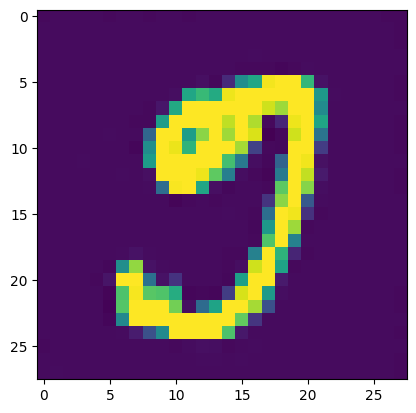


Epoch: 48 | Learning Rate: 0.0004096000000000001
0.03522888943552971
0.03754730150103569
0.03688254952430725
0.03565763682126999
0.037334345281124115
0.035769023001194
0.0362304262816906
0.0353250689804554
0.034792739897966385
0.03586801141500473
0.03540438041090965
0.035242438316345215
0.03787712752819061
0.03485225513577461
0.03842460736632347
0.03554557263851166
0.03509600833058357
0.036203302443027496
0.03490437567234039
0.0364830456674099
0.036652572453022
0.03675689548254013
0.03582780063152313
0.035881683230400085
0.03761087730526924
0.03672894090414047
0.03550710529088974
0.03659888729453087
0.036673564463853836
0.03719007596373558
0.03632108494639397
0.03706700727343559
0.035087950527668
0.03771663084626198
0.037339676171541214
0.03733135387301445
0.037766747176647186
0.03709734231233597
0.03567812591791153
0.03618409484624863
0.03635744750499725
0.0357278548181057
0.03464105352759361
0.036199264228343964
0.03605033457279205
0.03506074473261833
0.034478574991226196
0.03631049

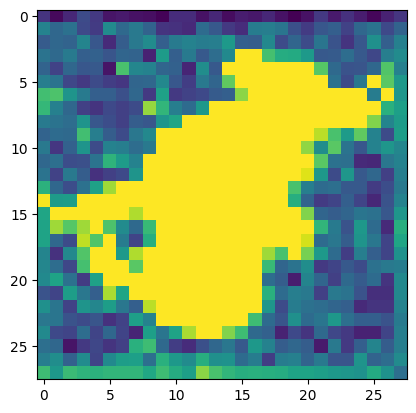


Epoch: 49 | Learning Rate: 0.0004096000000000001
0.0383438877761364
0.03466349467635155
0.03451427444815636
0.036009252071380615
0.03526096045970917
0.03525375574827194
0.03527557849884033
0.03633986786007881
0.03572802245616913
0.03594839945435524
0.035055335611104965
0.03578606992959976
0.03580503538250923
0.035090453922748566
0.03582116961479187
0.03512849286198616
0.03504406288266182
0.03421344608068466
0.03664667531847954
0.036420222371816635
0.03676823154091835
0.03531702980399132
0.037709400057792664
0.03573065251111984
0.037624601274728775
0.0350487194955349
0.035963572561740875
0.03713949769735336
0.03507259488105774
0.036883797496557236
0.03665976598858833
0.035597123205661774
0.03613591939210892
0.0374143049120903
0.03550683706998825
0.03583459556102753
0.036083027720451355
0.035806987434625626
0.03657212108373642
0.035317402333021164
0.03680746257305145
0.03509509563446045
0.03428652882575989
0.03575533255934715
0.03577689081430435
0.03721899166703224
0.03666608780622482
0

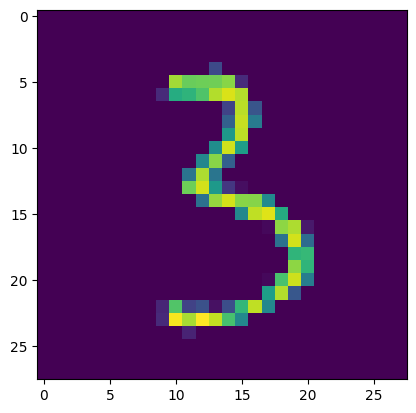


Epoch: 50 | Learning Rate: 0.0004096000000000001
0.03400798887014389
0.03512869402766228
0.03576698526740074
0.034101322293281555
0.03775251656770706
0.03708464652299881
0.037245504558086395
0.03768840804696083
0.03859949856996536
0.03743291646242142
0.034928303211927414
0.034401025623083115
0.03582485392689705
0.03793422877788544
0.038142140954732895
0.03565360978245735
0.035178206861019135
0.03503644838929176
0.0358208492398262
0.03715300187468529
0.03474583476781845
0.035105496644973755
0.037666287273168564
0.036195963621139526
0.03744201734662056
0.03750833496451378
0.03742629289627075
0.035702504217624664
0.03658582270145416
0.03591000288724899
0.03947664052248001
0.03592060133814812
0.03695403411984444
0.03725696727633476
0.03595808148384094
0.03431131690740585
0.03505465388298035
0.03773793205618858
0.03555814176797867
0.03781775012612343
0.034513216465711594
0.036532871425151825
0.03678218275308609
0.03505108878016472
0.034882690757513046
0.03736438602209091
0.0355250239372253

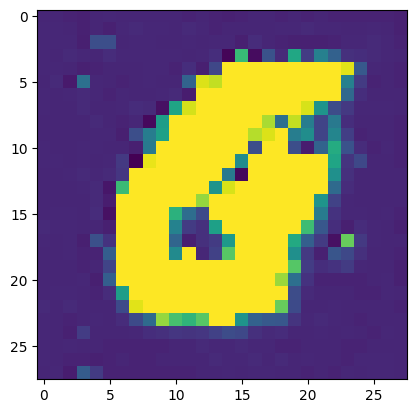


Epoch: 51 | Learning Rate: 0.0003276800000000001
0.03519356995820999
0.0359034463763237
0.03433530777692795
0.035888757556676865
0.03557443246245384
0.03516887128353119
0.03570985421538353
0.034296564757823944
0.03722033277153969
0.0374513603746891
0.03658383712172508
0.03622123599052429
0.037000708281993866
0.03723820298910141
0.03657815232872963
0.03826577216386795
0.03662903606891632
0.03568236529827118
0.035890690982341766
0.03505467250943184
0.03571632131934166
0.036518484354019165
0.0362716019153595
0.03673558682203293
0.03628390282392502
0.03770628198981285
0.03615986555814743
0.03575757145881653
0.036244917660951614
0.035826634615659714
0.03467273712158203
0.03451641649007797
0.03431619703769684
0.03595205768942833
0.0360223688185215
0.03670727461576462
0.03838520124554634
0.03584142401814461
0.035638898611068726
0.03555755689740181
0.03755471110343933
0.03682903200387955
0.03864484652876854
0.03757064417004585
0.03648144751787186
0.0369151271879673
0.03556060045957565
0.03435

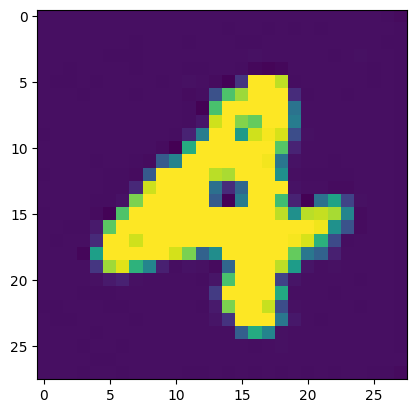


Epoch: 52 | Learning Rate: 0.0003276800000000001
0.0355418436229229
0.03426838293671608
0.03453190252184868
0.037524692714214325
0.03484128788113594
0.038341768085956573
0.0359334759414196
0.034282442182302475
0.037085969001054764
0.035785626620054245
0.03730461001396179
0.03945571184158325
0.03624881058931351
0.03482789546251297
0.035724710673093796
0.03581146150827408
0.03914415091276169
0.03785419464111328
0.03574018180370331
0.03762536495923996
0.03429413586854935
0.03623925894498825
0.034366924315690994
0.03973228111863136
0.03622487559914589
0.03637823835015297
0.03724474832415581
0.034534770995378494
0.03324531391263008
0.03716258704662323
0.0359790176153183
0.037120189517736435
0.03737286478281021
0.03487267345190048
0.03700690716505051
0.03547170013189316
0.038761209696531296
0.036441218107938766
0.03328142315149307
0.03773277625441551
0.03580956906080246
0.036630284041166306
0.0347508080303669
0.03674392029643059
0.03722190484404564
0.0357963964343071
0.03440671041607857
0.0

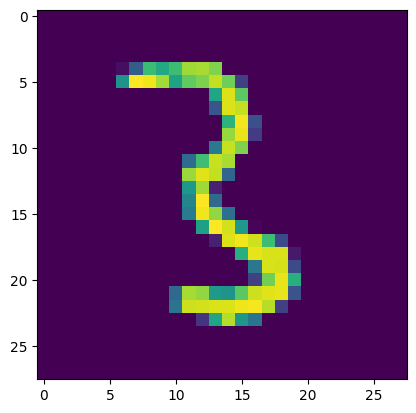


Epoch: 53 | Learning Rate: 0.0003276800000000001
0.03471594303846359
0.03565524145960808
0.03623653203248978
0.034672632813453674
0.03716736286878586
0.03677590191364288
0.03667484596371651
0.036554209887981415
0.03688538074493408
0.0358700305223465
0.03354340419173241
0.03780551627278328
0.03560977801680565
0.03447415307164192
0.03659513220191002
0.03706847503781319
0.035251520574092865
0.035289742052555084
0.03479195013642311
0.03473604470491409
0.03617767244577408
0.03491596877574921
0.036297645419836044
0.03580315783619881
0.03522242605686188
0.03617284819483757
0.037173401564359665
0.03700936213135719
0.036403872072696686
0.03452039137482643
0.03596579283475876
0.035230640321969986
0.0350457988679409
0.03654959797859192
0.03493675962090492
0.03649447485804558
0.03449873998761177
0.03431019186973572
0.036260977387428284
0.037685416638851166
0.0377143956720829
0.03844586759805679
0.03541915491223335
0.036230988800525665
0.03681053966283798
0.03494681417942047
0.035094257444143295
0

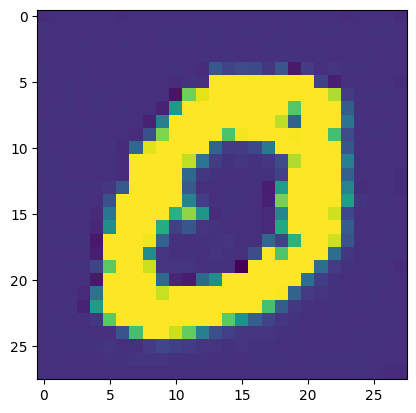


Epoch: 54 | Learning Rate: 0.0003276800000000001
0.03662256896495819
0.037747278809547424
0.035524412989616394
0.03504972904920578
0.036894530057907104
0.0374927893280983
0.035961974412202835
0.0338740199804306
0.03729826956987381
0.03472753241658211
0.036326996982097626
0.035273272544145584
0.034968648105859756
0.03294144943356514
0.03610789403319359
0.03739330545067787
0.0372319221496582
0.03570646792650223
0.03688753396272659
0.0370706282556057
0.03843223303556442
0.034788843244314194
0.03600810095667839
0.03674299642443657
0.03506910800933838
0.03577954322099686
0.03571094572544098
0.03718545287847519
0.03582882881164551
0.036993660032749176
0.03647972270846367
0.035355471074581146
0.035986222326755524
0.03818650171160698
0.03581343963742256
0.03534404933452606
0.03724927827715874
0.03454606980085373
0.03649761527776718
0.03778073564171791
0.03800397366285324
0.03637959063053131
0.03525487706065178
0.036460455507040024
0.03698013350367546
0.03618454188108444
0.03345418721437454
0.

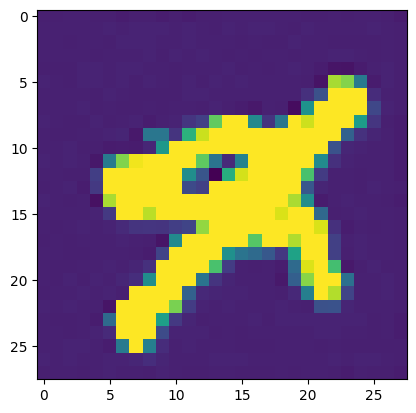


Epoch: 55 | Learning Rate: 0.0003276800000000001
0.03764753416180611
0.036295317113399506
0.03648411110043526
0.03483710065484047
0.036752235144376755
0.036796554923057556
0.037109535187482834
0.03759833052754402
0.03478854522109032
0.0353061743080616
0.035512905567884445
0.034656278789043427
0.035830240696668625
0.03754735365509987
0.03412146493792534
0.03849282115697861
0.035711176693439484
0.03506350517272949
0.03544255346059799
0.034409862011671066
0.035439155995845795
0.035103097558021545
0.03834423050284386
0.035590335726737976
0.036586638540029526
0.03534138202667236
0.036053404211997986
0.03594915196299553
0.034946780651807785
0.036418791860342026
0.03530361130833626
0.036129195243120193
0.038620129227638245
0.036290813237428665
0.034773826599121094
0.03400325030088425
0.03450339660048485
0.0364474356174469
0.035824526101350784
0.035129014402627945
0.033802151679992676
0.037581752985715866
0.03492444008588791
0.035620417445898056
0.03511158376932144
0.0361880362033844
0.037575

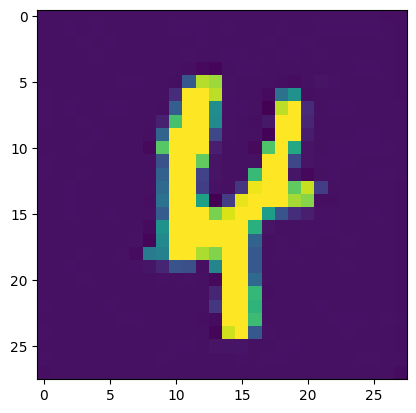


Epoch: 56 | Learning Rate: 0.0003276800000000001
0.03510347753763199
0.03515686094760895
0.03379619121551514
0.03631974011659622
0.036278825253248215
0.03508524224162102
0.03361388295888901
0.03584042191505432
0.03504464402794838
0.03569180518388748
0.036308735609054565
0.033941224217414856
0.03460996598005295
0.03510202467441559
0.03461110219359398
0.03610920161008835
0.03707302361726761
0.035081274807453156
0.03607093542814255
0.03547969460487366
0.03371068462729454
0.03502864018082619
0.03496307134628296
0.035382792353630066
0.035911675542593
0.03701167553663254
0.03742741793394089
0.03646102175116539
0.036561671644449234
0.03551199287176132
0.03666311874985695
0.03688732534646988
0.03536568582057953
0.03541896119713783
0.03698877990245819
0.03724971413612366
0.03430640697479248
0.03640448674559593
0.0376221239566803
0.034606222063302994
0.03575483709573746
0.03461390361189842
0.03462359681725502
0.0377499982714653
0.03675851598381996
0.036304716020822525
0.0360930971801281
0.03556

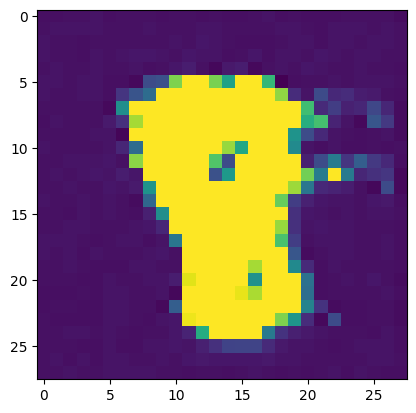


Epoch: 57 | Learning Rate: 0.0003276800000000001
0.03595826402306557
0.036927562206983566
0.03366208076477051
0.03319256752729416
0.0343732088804245
0.03589348867535591
0.037164658308029175
0.03486597165465355
0.034729424864053726
0.03554543852806091
0.03580686077475548
0.03600727394223213
0.03738594800233841
0.03412671014666557
0.034713346511125565
0.033006489276885986
0.03547433018684387
0.035669632256031036
0.03673309460282326
0.03600097447633743
0.0360473208129406
0.033601511269807816
0.033542901277542114
0.03600987046957016
0.03624913468956947
0.035843994468450546
0.03488442301750183
0.03451082855463028
0.03553222119808197
0.035205986350774765
0.035318657755851746
0.036817509680986404
0.0350998118519783
0.03509397432208061
0.03739525377750397
0.0347401462495327
0.03498015180230141
0.034925248473882675
0.03567252680659294
0.0372009202837944
0.03626403585076332
0.036146458238363266
0.034360747784376144
0.03551550582051277
0.03506039083003998
0.037634070962667465
0.03729811683297157

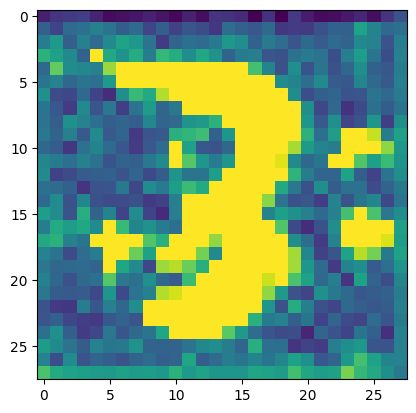


Epoch: 58 | Learning Rate: 0.0003276800000000001
0.0352335050702095
0.03731134533882141
0.03555094823241234
0.033040601760149
0.03485509753227234
0.03669590875506401
0.03472407907247543
0.03478798642754555
0.035528238862752914
0.03515377268195152
0.03721931576728821
0.037588268518447876
0.036547787487506866
0.034620534628629684
0.03490213304758072
0.03578104078769684
0.03360111266374588
0.035828594118356705
0.03596726059913635
0.03643036633729935
0.03466549888253212
0.0352884978055954
0.03830783814191818
0.03662535920739174
0.03480131924152374
0.035822805017232895
0.03629297390580177
0.03596321493387222
0.03822112828493118
0.0351979099214077
0.03382084518671036
0.0360080786049366
0.03561330586671829
0.036272082477808
0.03565540537238121
0.03631605952978134
0.03427307307720184
0.0348827987909317
0.037317775189876556
0.03738787770271301
0.03548488765954971
0.032369464635849
0.03561321645975113
0.03632894158363342
0.03533496707677841
0.033851396292448044
0.03503120318055153
0.03594571724

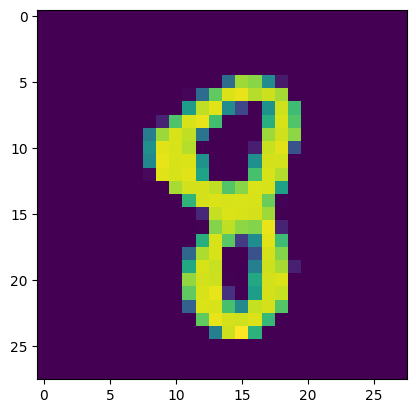


Epoch: 59 | Learning Rate: 0.0003276800000000001
0.037761032581329346
0.03460581228137016
0.036605674773454666
0.03344404324889183
0.03874025121331215
0.03446882218122482
0.03795157000422478
0.03852800279855728
0.03716714307665825
0.036632392555475235
0.03636426478624344
0.03515699505805969
0.03702620416879654
0.03675870597362518
0.03494378924369812
0.03437449410557747
0.03385449945926666
0.037145670503377914
0.03659380227327347
0.03532704710960388
0.03576698899269104
0.0344245508313179
0.03226783871650696
0.03738429397344589
0.03574099764227867
0.03508182242512703
0.03622157499194145
0.03626861423254013
0.03582829236984253
0.03790648654103279
0.0362064428627491
0.0360337570309639
0.035125959664583206
0.03554028645157814
0.03594594448804855
0.03376889228820801
0.037076208740472794
0.035867027938365936
0.03650065138936043
0.03258191794157028
0.03630192205309868
0.03454843908548355
0.03622521087527275
0.037427179515361786
0.03708305209875107
0.03366535156965256
0.0346362330019474
0.0350

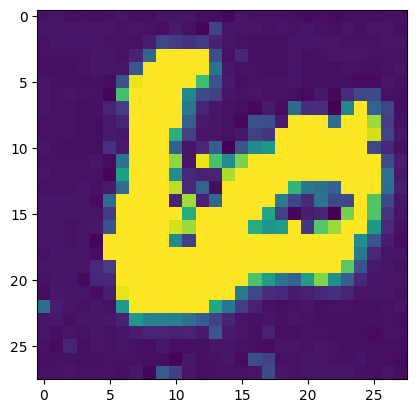


Epoch: 60 | Learning Rate: 0.0003276800000000001
0.0376359187066555
0.03733675926923752
0.03630047291517258
0.03692587837576866
0.03772116079926491
0.03570884093642235
0.038649946451187134
0.03643535077571869
0.035361263900995255
0.03545578196644783
0.03684501722455025
0.03676571696996689
0.03662540018558502
0.0365147665143013
0.03880149498581886
0.03556320443749428
0.03353133425116539
0.03531055897474289
0.03615017980337143
0.0355839878320694
0.03424345329403877
0.034835703670978546
0.03581368923187256
0.03518633544445038
0.03668214753270149
0.03595228120684624
0.0363440066576004
0.03571965545415878
0.03517238050699234
0.03627254441380501
0.03529001399874687
0.03634082153439522
0.035011421889066696
0.037441857159137726
0.03560838848352432
0.035118237137794495
0.03571232408285141
0.03486454859375954
0.035539183765649796
0.03619419410824776
0.03640623018145561
0.034805454313755035
0.036401644349098206
0.03634079545736313
0.03639993816614151
0.035254497081041336
0.03656071051955223
0.03

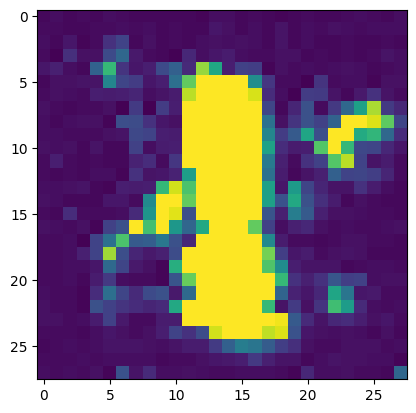


Epoch: 61 | Learning Rate: 0.0002621440000000001
0.03520170971751213
0.03584911674261093
0.035531070083379745
0.03594457358121872
0.037356898188591
0.03507818281650543
0.035767387598752975
0.03406970202922821
0.03508070111274719
0.03360418975353241
0.03631726652383804
0.03579914569854736
0.034461334347724915
0.036946892738342285
0.035870250314474106
0.03424907103180885
0.03562742471694946
0.03717239201068878
0.03539952263236046
0.03454628586769104
0.03271535784006119
0.03607882559299469
0.035849131643772125
0.03591117635369301
0.03698430582880974
0.03653663024306297
0.03572920337319374
0.03462396189570427
0.035406168550252914
0.03644966706633568
0.03787648677825928
0.03599300608038902
0.03485942259430885
0.03842295706272125
0.03518524020910263
0.034067872911691666
0.037208642810583115
0.03385593742132187
0.03720440715551376
0.036750681698322296
0.036119744181632996
0.03596363216638565
0.035818591713905334
0.0351673923432827
0.03779364377260208
0.03298449516296387
0.034177254885435104


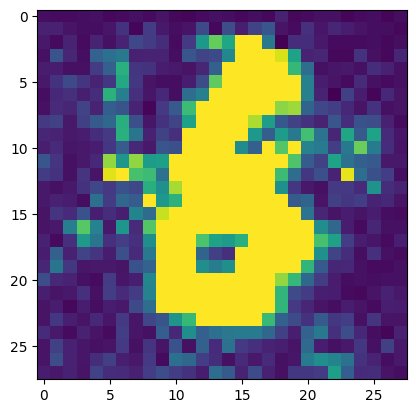


Epoch: 62 | Learning Rate: 0.0002621440000000001
0.03605877608060837
0.035882145166397095
0.03762549161911011
0.03452668711543083
0.03546778857707977
0.03522102162241936
0.03448614850640297
0.03586723655462265
0.03596033900976181
0.03648348152637482
0.03420771285891533
0.03578881174325943
0.037654295563697815
0.03818175941705704
0.03594876453280449
0.03611864522099495
0.03387195244431496
0.03573618456721306
0.035472095012664795
0.0341159850358963
0.03513633832335472
0.03567899018526077
0.03397063910961151
0.03520162031054497
0.03467361256480217
0.034870944917201996
0.036810360848903656
0.034402236342430115
0.03482397645711899
0.036285288631916046
0.03564479574561119
0.0372854545712471
0.03559353947639465
0.034532610327005386
0.034022264182567596
0.035520877689123154
0.035909254103899
0.034520357847213745
0.03750874474644661
0.03702573850750923
0.03407907113432884
0.03451189771294594
0.034972913563251495
0.0387369841337204
0.03544950485229492
0.03614285960793495
0.03524620085954666
0.0

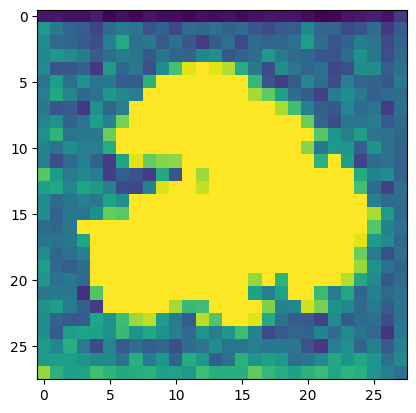


Epoch: 63 | Learning Rate: 0.0002621440000000001
0.03541886806488037
0.03494050353765488
0.03562137112021446
0.03546416759490967
0.03511090949177742
0.036450617015361786
0.03612546995282173
0.03673150762915611
0.032938383519649506
0.03471709415316582
0.0365527905523777
0.036499716341495514
0.03589662164449692
0.03538331761956215
0.03549911454319954
0.03496626019477844
0.03351335972547531
0.03458116576075554
0.03542931005358696
0.036980561912059784
0.03649275749921799
0.03519457206130028
0.034123800694942474
0.03379712998867035
0.03665361925959587
0.03658297285437584
0.034915897995233536
0.03596252575516701
0.03512972965836525
0.03434234485030174
0.03533376008272171
0.03555171936750412
0.0354883186519146
0.03519957512617111
0.037800293415784836
0.03561386838555336
0.03596971556544304
0.034365925937891006
0.035598184913396835
0.03481399267911911
0.035205867141485214
0.03551294282078743
0.03428470715880394
0.036517977714538574
0.034751590341329575
0.03582950308918953
0.03652704507112503


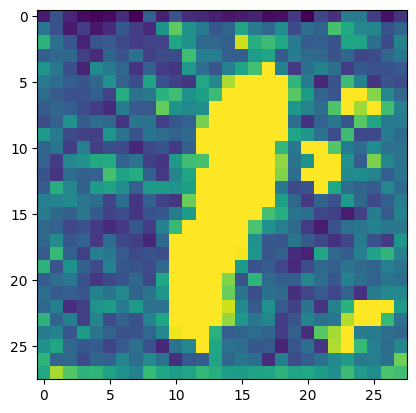


Epoch: 64 | Learning Rate: 0.0002621440000000001
0.03443153202533722
0.03556405007839203
0.03388306125998497
0.03532315045595169
0.034463267773389816
0.0331827737390995
0.03685824200510979
0.03443756327033043
0.033688247203826904
0.0349322184920311
0.03659830242395401
0.03754613175988197
0.03564287722110748
0.03639736771583557
0.03811445087194443
0.037146665155887604
0.03386780992150307
0.03523148596286774
0.03695661574602127
0.035519789904356
0.035580649971961975
0.03485638648271561
0.03571010380983353
0.03782985731959343
0.03571809083223343
0.03695223852992058
0.034504443407058716
0.034883737564086914
0.036833878606557846
0.03539787232875824
0.035107459872961044
0.03481229394674301
0.03589959070086479
0.03526479750871658
0.03727606683969498
0.03702477738261223
0.03547053039073944
0.035543929785490036
0.03474713861942291
0.03479909896850586
0.03603949770331383
0.03723593428730965
0.03574519604444504
0.03550371900200844
0.03688748553395271
0.035362470895051956
0.03382878750562668
0.03

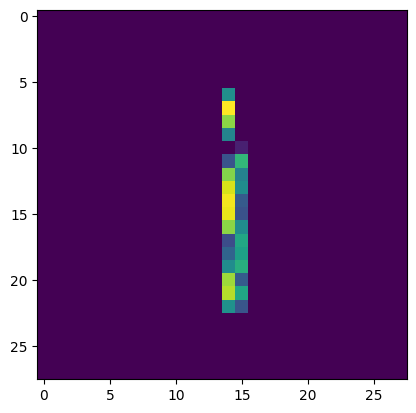


Epoch: 65 | Learning Rate: 0.0002621440000000001
0.035233598202466965
0.034984610974788666
0.03621365502476692
0.03490331768989563
0.03512848913669586
0.03605562821030617
0.03553101792931557
0.035656314343214035
0.03573501110076904
0.03517443686723709
0.035464320331811905
0.03620878979563713
0.03484497219324112
0.03445287421345711
0.035842567682266235
0.03641377389431
0.03639666736125946
0.035813599824905396
0.037570275366306305
0.034565795212984085
0.034348178654909134
0.03564761206507683
0.032598890364170074
0.03474073484539986
0.03697938844561577
0.03607863560318947
0.03444574773311615
0.035719819366931915
0.03893027827143669
0.03428604081273079
0.035664983093738556
0.0339161679148674
0.03475154563784599
0.036167506128549576
0.03431408107280731
0.03489626199007034
0.03594730794429779
0.03536168485879898
0.03554792329668999
0.03540413826704025
0.03428621590137482
0.0357840359210968
0.036147937178611755
0.03560655564069748
0.035307276993989944
0.034961070865392685
0.03450659289956093

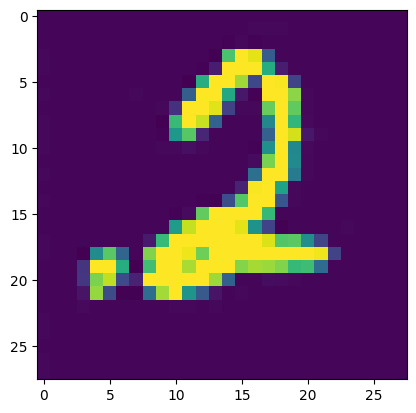


Epoch: 66 | Learning Rate: 0.0002621440000000001
0.033872801810503006
0.03658835217356682
0.03632218390703201
0.035606734454631805
0.03635711595416069
0.03560613840818405
0.03642205893993378
0.03547525778412819
0.035652969032526016
0.03507183864712715
0.03564554080367088
0.036181025207042694
0.03498910367488861
0.03434094786643982
0.03707079589366913
0.035097636282444
0.03639320284128189
0.036273762583732605
0.03488724306225777
0.0352366603910923
0.03482424095273018
0.03650966286659241
0.0366860032081604
0.03535524755716324
0.034261882305145264
0.03747144713997841
0.034206561744213104
0.03480988368391991
0.03550295531749725
0.03514651954174042
0.035430580377578735
0.034889642149209976
0.03765368089079857
0.03421345353126526
0.03485073894262314
0.03521201014518738
0.03713934123516083
0.034954991191625595
0.03782201558351517
0.03460659831762314
0.036408115178346634
0.03331230208277702
0.03387074172496796
0.034963130950927734
0.03539194166660309
0.03472636640071869
0.035703178495168686
0

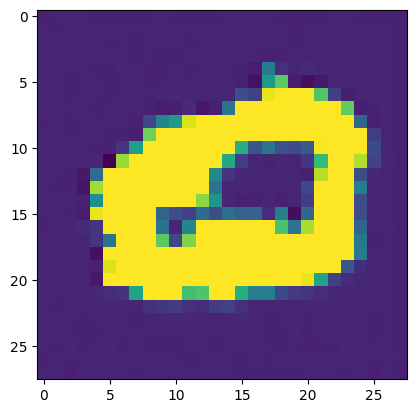


Epoch: 67 | Learning Rate: 0.0002621440000000001
0.03370935469865799
0.034956809133291245
0.03648211061954498
0.03526310622692108
0.03506902605295181
0.035886675119400024
0.03537030518054962
0.033769674599170685
0.03552950546145439
0.036456361413002014
0.0371529720723629
0.03663220256567001
0.03528362140059471
0.0359153188765049
0.03496068716049194
0.036001354455947876
0.03496177867054939
0.03637554123997688
0.034979287534952164
0.0343112014234066
0.03567464277148247
0.035951633006334305
0.033756550401449203
0.03418879956007004
0.03481149300932884
0.038425445556640625
0.03584400564432144
0.036466944962739944
0.03644957393407822
0.035582125186920166
0.035782426595687866
0.03465734049677849
0.033415306359529495
0.033695876598358154
0.036450810730457306
0.037018124014139175
0.03781450539827347
0.034026097506284714
0.03738719969987869
0.035143326967954636
0.035100873559713364
0.035788509994745255
0.03617759048938751
0.036446355283260345
0.03480071574449539
0.035377200692892075
0.034981813

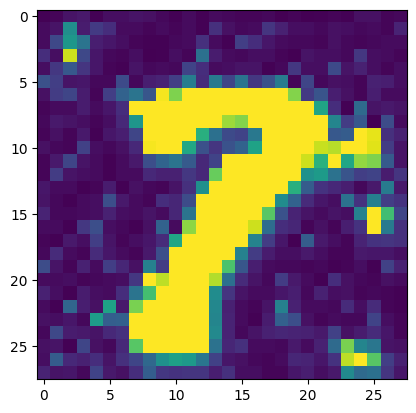


Epoch: 68 | Learning Rate: 0.0002621440000000001
0.03477851301431656
0.03337617963552475
0.035228416323661804
0.03364912047982216
0.03462572395801544
0.034450750797986984
0.03637990728020668
0.03533846512436867
0.035703688859939575
0.03562017157673836
0.03478438779711723
0.0331440344452858
0.03480469807982445
0.03476598113775253
0.0361570306122303
0.03531447798013687
0.036846961826086044
0.03481592983007431
0.036859262734651566
0.0351574644446373
0.035681985318660736
0.03406095504760742
0.03386937454342842
0.037492554634809494
0.036615949124097824
0.03458146005868912
0.035475507378578186
0.035673417150974274
0.03692471608519554
0.03475520387291908
0.0330551415681839
0.0366668663918972
0.035586003214120865
0.0340074822306633
0.03469656780362129
0.033991534262895584
0.03715910017490387
0.03404396027326584
0.0365641824901104
0.035688381642103195
0.03746673837304115
0.03586498275399208
0.03304208070039749
0.036004580557346344
0.03600214794278145
0.03348715975880623
0.03674770146608353
0.0

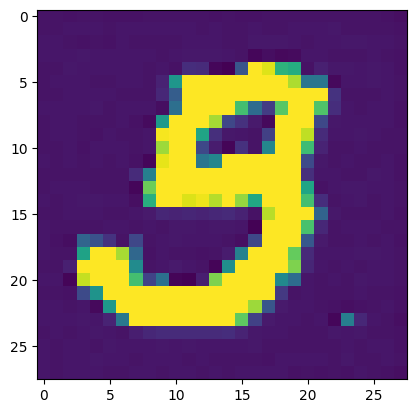


Epoch: 69 | Learning Rate: 0.0002621440000000001
0.03404312953352928
0.03448208048939705
0.03672439977526665
0.037476833909749985
0.03461988642811775
0.034807588905096054
0.03547888621687889
0.03408849611878395
0.03639352694153786
0.03405655175447464
0.034800659865140915
0.036206237971782684
0.03507676720619202
0.03670830652117729
0.035605814307928085
0.03355060890316963
0.03560665249824524
0.03586950898170471
0.03446296229958534
0.03778370842337608
0.03765488415956497
0.03602062165737152
0.03531665727496147
0.03473025932908058
0.033306412398815155
0.03572525084018707
0.034055326133966446
0.03556514158844948
0.034909140318632126
0.035437632352113724
0.03635655716061592
0.035128042101860046
0.036066293716430664
0.03385889530181885
0.03502896428108215
0.03513062000274658
0.033541206270456314
0.03350655362010002
0.03772801533341408
0.03402994945645332
0.03411014750599861
0.037395015358924866
0.033584196120500565
0.0366227813065052
0.03585897013545036
0.03481745347380638
0.035128384828567

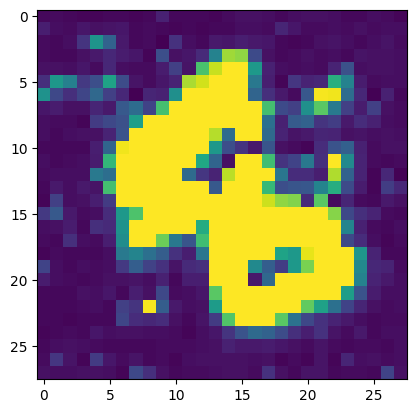


Epoch: 70 | Learning Rate: 0.0002621440000000001
0.03481177240610123
0.03700762614607811
0.03642789646983147
0.033791497349739075
0.035399552434682846
0.034285467118024826
0.034582432359457016
0.03677752614021301
0.03511655330657959
0.035854488611221313
0.0361485593020916
0.03378636762499809
0.035030897706747055
0.036034367978572845
0.03325306251645088
0.03588853403925896
0.03421029448509216
0.03327872231602669
0.03507067263126373
0.034343965351581573
0.03725806623697281
0.03525977581739426
0.03683428466320038
0.034529998898506165
0.03578176349401474
0.0358356311917305
0.034109167754650116
0.034464653581380844
0.03314775973558426
0.03421306610107422
0.034793343394994736
0.035256899893283844
0.036264777183532715
0.03479676693677902
0.03476199135184288
0.033517900854349136
0.03416666015982628
0.03539712354540825
0.03473101183772087
0.032557811588048935
0.03789743408560753
0.03437194600701332
0.035843782126903534
0.036321815103292465
0.03491663932800293
0.035892270505428314
0.03649103641

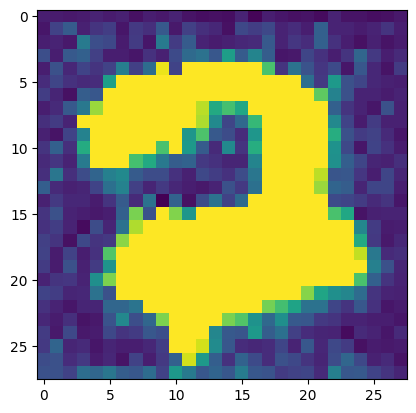


Epoch: 71 | Learning Rate: 0.00020971520000000012
0.035147760063409805
0.03305748477578163
0.03576696291565895
0.037245865911245346
0.03560574725270271
0.03587526082992554
0.035629380494356155
0.035280741751194
0.0337698757648468
0.034913573414087296
0.03473344445228577
0.034965503960847855
0.036286354064941406
0.03602062910795212
0.03622272610664368
0.034958090633153915
0.03735465183854103
0.03469715639948845
0.03636357560753822
0.03500519320368767
0.0345434807240963
0.036351218819618225
0.03523264452815056
0.03575317934155464
0.03678372502326965
0.03558982163667679
0.035938408225774765
0.034649308770895004
0.03630033880472183
0.03549548611044884
0.03407960757613182
0.035590268671512604
0.03617110475897789
0.03639441356062889
0.03500476852059364
0.03504545986652374
0.03474046289920807
0.036357663571834564
0.03504149243235588
0.03442353382706642
0.034868523478507996
0.03375899791717529
0.03566937893629074
0.03477197140455246
0.03651905804872513
0.03576621785759926
0.03686780855059624


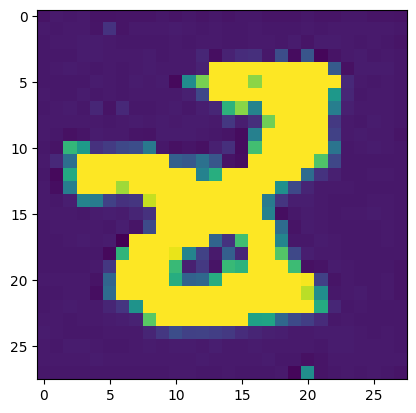


Epoch: 72 | Learning Rate: 0.00020971520000000012
0.03600045666098595
0.03466164693236351
0.034054819494485855
0.033690448850393295
0.03366667777299881
0.036428023129701614
0.03456301614642143
0.03501986339688301
0.034623995423316956
0.03564973548054695
0.03420626372098923
0.03350594639778137
0.034732408821582794
0.036847058683633804
0.034694839268922806
0.03491148725152016
0.03466028347611427
0.0370958037674427
0.03428303822875023
0.03572627529501915
0.03245478495955467
0.03491093963384628
0.03222402557730675
0.03719382733106613
0.03580672666430473
0.033898137509822845
0.03612664341926575
0.03447292745113373
0.036367181688547134
0.034902241080999374
0.036860574036836624
0.03566376492381096
0.03470511734485626
0.03566674888134003
0.034409571439027786
0.03649649769067764
0.035055503249168396
0.034473273903131485
0.034006983041763306
0.035174410790205
0.03630164638161659
0.03647935390472412
0.032823480665683746
0.033891960978507996
0.03678141161799431
0.03524426370859146
0.0342210792005

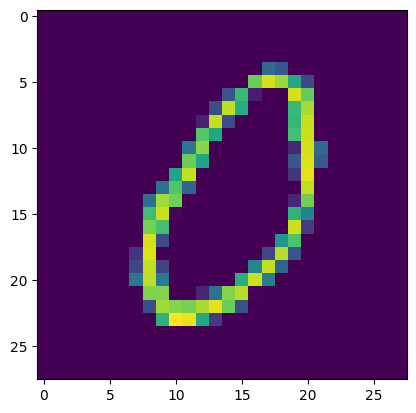


Epoch: 73 | Learning Rate: 0.00020971520000000012
0.03372311219573021
0.03375980630517006
0.0340702198445797
0.03528902307152748
0.03770897164940834
0.03410949558019638
0.03826281800866127
0.0348144993185997
0.03653907775878906
0.03628392145037651
0.03606086224317551
0.0362958125770092
0.03407789394259453
0.03390684723854065
0.03617146983742714
0.033684082329273224
0.035308241844177246
0.03519557788968086
0.034200940281152725
0.034797873347997665
0.035753145813941956
0.036274444311857224
0.035982366651296616
0.03483031690120697
0.035160187631845474
0.03652070462703705
0.03400813415646553
0.03641287982463837
0.034517478197813034
0.03660402446985245
0.0352676697075367
0.03471852466464043
0.03408316150307655
0.03788037970662117
0.03669475391507149
0.035222508013248444
0.03503753989934921
0.03395929932594299
0.03551841527223587
0.03650159388780594
0.03528928756713867
0.03752099350094795
0.035035744309425354
0.03489937260746956
0.034882355481386185
0.03602379932999611
0.03472384065389633
0

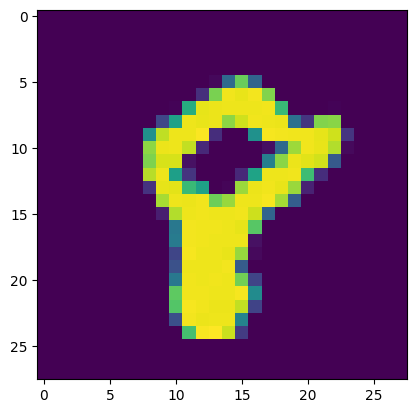


Epoch: 74 | Learning Rate: 0.00020971520000000012
0.03599156066775322
0.03507089614868164
0.03564216196537018
0.03442854806780815
0.03419046476483345
0.032909464091062546
0.03357100486755371
0.035866085439920425
0.035165123641490936
0.03544854745268822
0.03427999094128609
0.03477615490555763
0.03522597253322601
0.034738752990961075
0.03499210625886917
0.033508121967315674
0.03504960238933563
0.03619258105754852
0.037578046321868896
0.03413612022995949
0.03497842326760292
0.03509124740958214
0.03643140569329262
0.03565498813986778
0.03422465920448303
0.03669504076242447
0.03565753996372223
0.03569290041923523
0.03577462583780289
0.03501991927623749
0.036375273019075394
0.034894637763500214
0.03623503819108009
0.035172417759895325
0.033491138368844986
0.036121390759944916
0.035706527531147
0.03372826427221298
0.03501031920313835
0.03388676419854164
0.0375802107155323
0.0364634245634079
0.0345827117562294
0.03460307791829109
0.03403909504413605
0.03599973022937775
0.0371599979698658
0.03

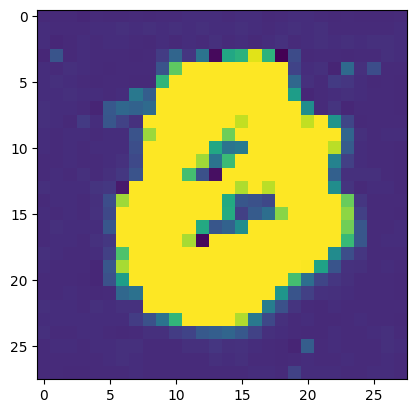


Epoch: 75 | Learning Rate: 0.00020971520000000012
0.03318679332733154
0.03673892840743065
0.03561392053961754
0.03607984259724617
0.0344369001686573
0.03550666943192482
0.035845499485731125
0.03649871051311493
0.0356629304587841
0.03484607860445976
0.0344015508890152
0.036423683166503906
0.03608952835202217
0.03667452186346054
0.03478541970252991
0.03455595672130585
0.03455573692917824
0.03454194590449333
0.03634059429168701
0.035346340388059616
0.03524024039506912
0.03400910645723343
0.036998115479946136
0.03577259182929993
0.03507052734494209
0.03521595895290375
0.034284017980098724
0.035343948751688004
0.03443634882569313
0.03652743995189667
0.035478610545396805
0.03430629521608353
0.03650146350264549
0.036914702504873276
0.034158218652009964
0.03447772562503815
0.03560495376586914
0.036743227392435074
0.03660166263580322
0.035004954785108566
0.03413601219654083
0.033511582762002945
0.0357031412422657
0.03581713140010834
0.0347505547106266
0.0363541916012764
0.03416621312499046
0.0

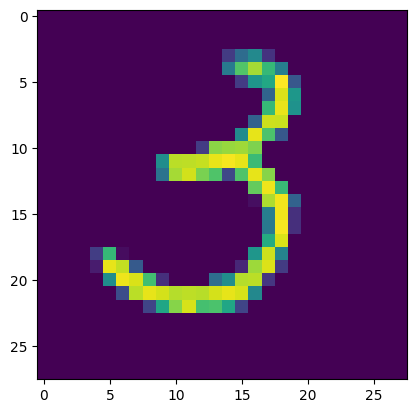


Epoch: 76 | Learning Rate: 0.00020971520000000012
0.03357049450278282
0.03356334939599037
0.03500708192586899
0.03444966673851013
0.03647340461611748
0.03413189575076103
0.037641484290361404
0.034781090915203094
0.03658030927181244
0.03392251580953598
0.032814688980579376
0.03644796833395958
0.03635847195982933
0.035740453749895096
0.03774508088827133
0.03505617007613182
0.035616789013147354
0.036825213581323624
0.03563826158642769
0.034381307661533356
0.03525830805301666
0.034283436834812164
0.03473914414644241
0.03487766161561012
0.035394713282585144
0.03635406494140625
0.033594366163015366
0.03505996614694595
0.034079309552907944
0.03406132385134697
0.03645377233624458
0.03422759845852852
0.035373132675886154
0.03432317450642586
0.035894256085157394
0.034577567130327225
0.03331354260444641
0.03365068510174751
0.03476085513830185
0.03517743945121765
0.033567920327186584
0.03423824906349182
0.03403845429420471
0.03406408429145813
0.036319293081760406
0.034787483513355255
0.0361635014

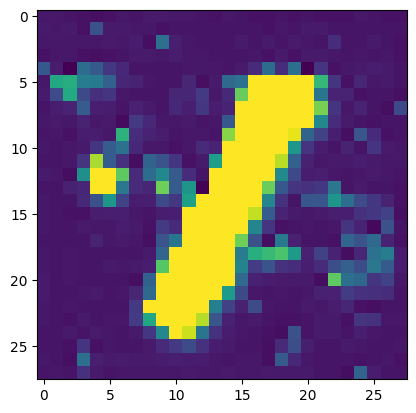


Epoch: 77 | Learning Rate: 0.00020971520000000012
0.034230951219797134
0.03506474569439888
0.03411759063601494
0.03527048975229263
0.035765375941991806
0.035252645611763
0.03510814160108566
0.03598567470908165
0.0356491394340992
0.03588676452636719
0.03484300523996353
0.03566176816821098
0.03593297675251961
0.034830451011657715
0.03531733900308609
0.03657163679599762
0.03390122205018997
0.03522932529449463
0.03350904956459999
0.03586316108703613
0.03472917899489403
0.03545323759317398
0.03414246067404747
0.0350179485976696
0.034660592675209045
0.0338328517973423
0.035433005541563034
0.03302328288555145
0.03442353010177612
0.035763006657361984
0.0332878902554512
0.03369344770908356
0.03537371754646301
0.03199704736471176
0.033953528851270676
0.03695740923285484
0.03579138591885567
0.035903025418519974
0.035226233303546906
0.03210979327559471
0.03656017407774925
0.03418126702308655
0.0365358330309391
0.03327740728855133
0.03525852411985397
0.03514203801751137
0.037946879863739014
0.0337

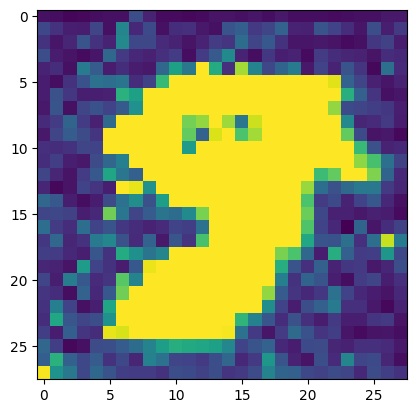


Epoch: 78 | Learning Rate: 0.00020971520000000012
0.03496578708291054
0.03562676161527634
0.034464556723833084
0.035088155418634415
0.0372295081615448
0.03495750203728676
0.03672808036208153
0.03778323903679848
0.03536491096019745
0.0340782068669796
0.03565574064850807
0.0341888889670372
0.03580799698829651
0.03438476845622063
0.03606010973453522
0.03552334010601044
0.036162640899419785
0.03385244309902191
0.0359530970454216
0.035448964685201645
0.03664301335811615
0.03473544493317604
0.03617463260889053
0.0342174731194973
0.03465991094708443
0.035202376544475555
0.035250041633844376
0.035491712391376495
0.03417113795876503
0.03689363971352577
0.03402694687247276
0.03393000736832619
0.03475157171487808
0.03643167018890381
0.0366930291056633
0.033224500715732574
0.03405853733420372
0.03416193276643753
0.03602307662367821
0.035549089312553406
0.034793198108673096
0.03504611551761627
0.03442849963903427
0.033456746488809586
0.03505149111151695
0.03388750180602074
0.036340683698654175
0.0

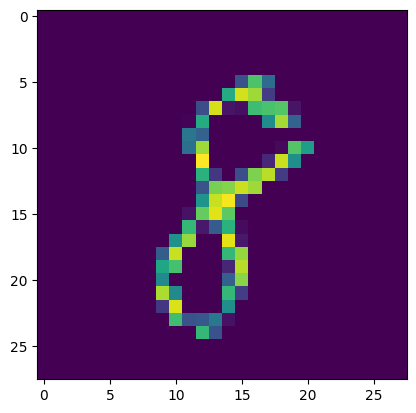


Epoch: 79 | Learning Rate: 0.00020971520000000012
0.03502161428332329
0.033749230206012726
0.03570900484919548
0.034286148846149445
0.03629729896783829
0.03608499467372894
0.03410622850060463
0.034786250442266464
0.034191351383924484
0.0342470183968544
0.037607163190841675
0.03408340364694595
0.035414598882198334
0.03649317845702171
0.03459161892533302
0.034378115087747574
0.03571933135390282
0.03486490249633789
0.035132985562086105
0.03450961410999298
0.03578073903918266
0.03509816527366638
0.035711564123630524
0.03554396331310272
0.03763563558459282
0.034756746143102646
0.035341691225767136
0.03393305465579033
0.03586740791797638
0.03453418239951134
0.0332854725420475
0.03562512621283531
0.03478144481778145
0.034404922276735306
0.03392812982201576
0.03489169850945473
0.034584980458021164
0.03343949839472771
0.03553411364555359
0.033796604722738266
0.03632953017950058
0.033287495374679565
0.03377103433012962
0.03329024463891983
0.033823978155851364
0.03461664542555809
0.0371249839663

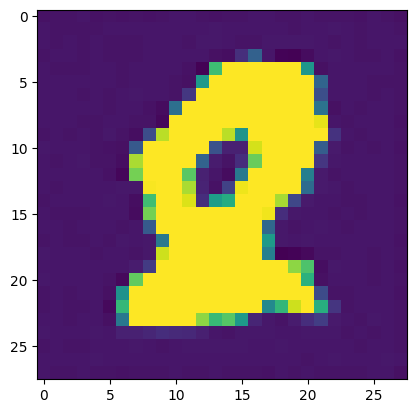


Epoch: 80 | Learning Rate: 0.00020971520000000012
0.03503428027033806
0.033678293228149414
0.0357382595539093
0.03419351577758789
0.035804182291030884
0.037070371210575104
0.03371397778391838
0.03627671301364899
0.03572152182459831
0.035583704710006714
0.03611012175679207
0.033868949860334396
0.03340525925159454
0.03586520254611969
0.03560870513319969
0.03583907708525658
0.035042695701122284
0.03653150051832199
0.03375718742609024
0.03458021208643913
0.03455817326903343
0.03737631067633629
0.0338854156434536
0.035332921892404556
0.035013746470212936
0.03612470626831055
0.03566785901784897
0.034052666276693344
0.0352679081261158
0.034942980855703354
0.0368160717189312
0.03735249489545822
0.03547569736838341
0.03493058681488037
0.03539932891726494
0.036422304809093475
0.034163765609264374
0.034991491585969925
0.035967808216810226
0.03638389706611633
0.035269901156425476
0.035553280264139175
0.03662470355629921
0.035248786211013794
0.03346068039536476
0.03514181077480316
0.03561580181121

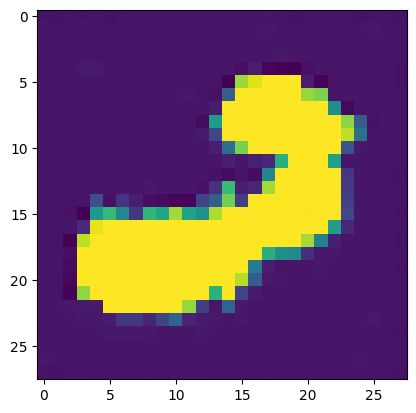


Epoch: 81 | Learning Rate: 0.0001677721600000001
0.03431873396039009
0.034543950110673904
0.03307778760790825
0.03295411914587021
0.03630095347762108
0.03492162376642227
0.0330481193959713
0.03597481548786163
0.03445689007639885
0.035323433578014374
0.034066490828990936
0.03573562204837799
0.03476014360785484
0.03411034494638443
0.03628160431981087
0.037120454013347626
0.03385172411799431
0.033865656703710556
0.03215061500668526
0.036267343908548355
0.034452006220817566
0.03545917198061943
0.033975958824157715
0.03638879582285881
0.03327098488807678
0.03362968564033508
0.03465089574456215
0.03522477671504021
0.03475739061832428
0.03500557318329811
0.034909579902887344
0.03561633080244064
0.03497827425599098
0.03609343245625496
0.03408214449882507
0.03811177611351013
0.034624725580215454
0.03534764423966408
0.03425638750195503
0.033604834228754044
0.034846872091293335
0.03327754884958267
0.03435225412249565
0.03603250905871391
0.033837053924798965
0.035525672137737274
0.033203806728124

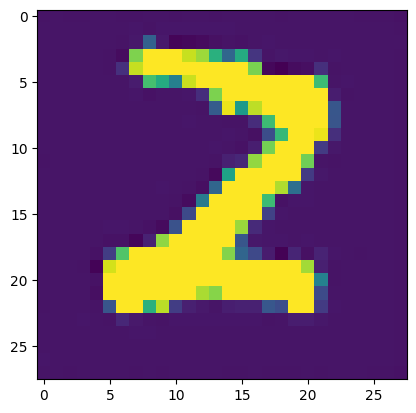


Epoch: 82 | Learning Rate: 0.0001677721600000001
0.035996198654174805
0.03409215435385704
0.03532972186803818
0.03378048539161682
0.03569716960191727
0.037788696587085724
0.035714421421289444
0.03517655283212662
0.03538680821657181
0.03568368777632713
0.03309352323412895
0.03605470433831215
0.0348428450524807
0.03351074457168579
0.03587998077273369
0.03480727598071098
0.03571825101971626
0.03458361700177193
0.03511662408709526
0.034316498786211014
0.03416752442717552
0.037377890199422836
0.0346599705517292
0.035180795937776566
0.03509528562426567
0.03444770723581314
0.037036631256341934
0.03426524996757507
0.0368548259139061
0.03645467758178711
0.03520561009645462
0.03564833849668503
0.0351271852850914
0.03544680401682854
0.03443968668580055
0.03544044494628906
0.033850688487291336
0.03464733436703682
0.03568125516176224
0.036306556314229965
0.03548726812005043
0.03551420941948891
0.035237867385149
0.033623192459344864
0.036122050136327744
0.03561925143003464
0.036849480122327805
0.03

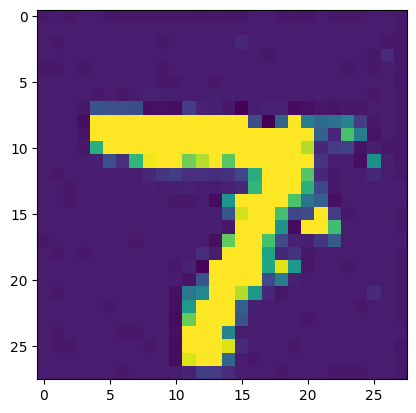


Epoch: 83 | Learning Rate: 0.0001677721600000001
0.03573639318346977
0.03578717261552811
0.03705574944615364
0.03586021810770035
0.034560345113277435
0.03451724350452423
0.03531834855675697
0.035105299204587936
0.035329487174749374
0.03534065559506416
0.034503690898418427
0.035049743950366974
0.034600723534822464
0.03610144928097725
0.03311466798186302
0.03364044800400734
0.03533509001135826
0.036009810864925385
0.035583965480327606
0.03388461098074913
0.034601494669914246
0.03427676856517792
0.03496992215514183
0.03452020138502121
0.03453686088323593
0.035526614636182785
0.03612974286079407
0.03601795807480812
0.03460755571722984
0.033941347151994705
0.03601717948913574
0.03445710986852646
0.038248032331466675
0.036446500569581985
0.0364261157810688
0.03590932860970497
0.03451013192534447
0.03707968071103096
0.03637148067355156
0.0368180088698864
0.03388566896319389
0.03425336629152298
0.03636113554239273
0.03633132949471474
0.03624778240919113
0.03442354127764702
0.03572508320212364

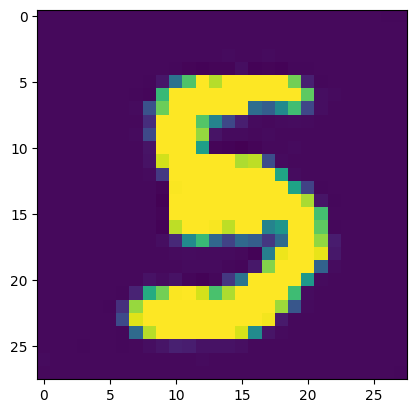


Epoch: 84 | Learning Rate: 0.0001677721600000001
0.036340370774269104
0.03479209169745445
0.035618752241134644
0.03469781577587128
0.034110382199287415
0.034735389053821564
0.036176495254039764
0.03554730862379074
0.03422021120786667
0.03350432962179184
0.03780648484826088
0.03444204479455948
0.03392880782485008
0.03477182239294052
0.035394586622714996
0.03295409306883812
0.0336640439927578
0.036748938262462616
0.0347568579018116
0.03500654175877571
0.03554275631904602
0.03469980135560036
0.03318534418940544
0.03542586788535118
0.03315408155322075
0.03545621037483215
0.03377069532871246
0.034632641822099686
0.034907255321741104
0.0363197848200798
0.033749133348464966
0.03601233288645744
0.03605864942073822
0.0351097546517849
0.03409180790185928
0.03459884598851204
0.03613106533885002
0.03719458356499672
0.036276090890169144
0.03420640155673027
0.034923456609249115
0.03371470421552658
0.03435776010155678
0.03421517834067345
0.03529639542102814
0.034613944590091705
0.03771667182445526
0

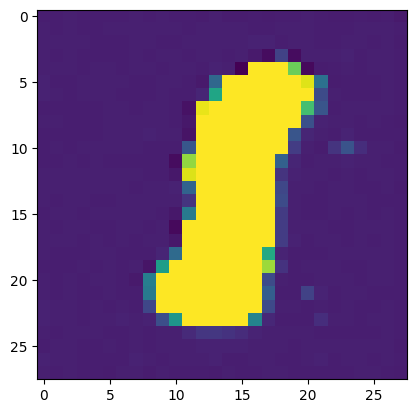


Epoch: 85 | Learning Rate: 0.0001677721600000001
0.03436939790844917
0.034603167325258255
0.03535730019211769
0.033832211047410965
0.03772236406803131
0.036623045802116394
0.03637564182281494
0.03443826362490654
0.035118237137794495
0.03561163693666458
0.034343231469392776
0.036928340792655945
0.03524614870548248
0.034212954342365265
0.03401092067360878
0.036187250167131424
0.0362350270152092
0.03367934748530388
0.03514798358082771
0.03500731661915779
0.03610122203826904
0.03593467175960541
0.03490731492638588
0.034787993878126144
0.033995285630226135
0.035461582243442535
0.03686600551009178
0.03464321047067642
0.03558679297566414
0.03449511528015137
0.03471793606877327
0.03291865810751915
0.03639781102538109
0.031723618507385254
0.03558148816227913
0.03634073585271835
0.03529626503586769
0.035256531089544296
0.033984728157520294
0.03389362245798111
0.035101406276226044
0.03584831953048706
0.0359601154923439
0.03270546719431877
0.03412768244743347
0.03381532058119774
0.034671146422624

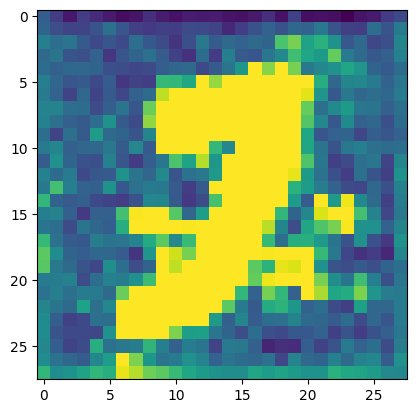


Epoch: 86 | Learning Rate: 0.0001677721600000001
0.03600713238120079
0.034439705312252045
0.03187616541981697
0.034190889447927475
0.03408291935920715
0.034765247255563736
0.035798560827970505
0.03434262424707413
0.03669026866555214
0.035418178886175156
0.034234222024679184
0.03319472074508667
0.033762358129024506
0.03445085510611534
0.03656760975718498
0.03387950733304024
0.0359860397875309
0.03450189158320427
0.03388482704758644
0.03511783480644226
0.03430195152759552
0.03487555682659149
0.035538703203201294
0.035913679748773575
0.03716735541820526
0.034300316125154495
0.03451218828558922
0.033472511917352676
0.03446490317583084
0.033747512847185135
0.0342295877635479
0.03594231978058815
0.03326902538537979
0.03410563990473747
0.03536754474043846
0.03564058989286423
0.03568330407142639
0.03550542891025543
0.03228006884455681
0.03501109778881073
0.03442687168717384
0.03457195684313774
0.035064857453107834
0.03339441120624542
0.035714853554964066
0.033519815653562546
0.035485669970512

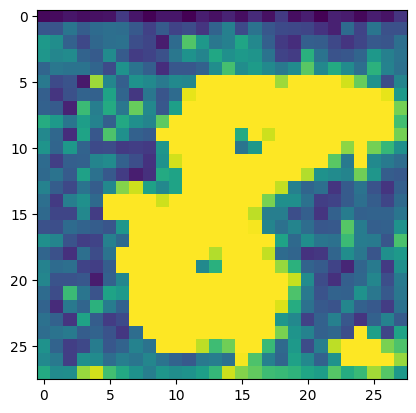


Epoch: 87 | Learning Rate: 0.0001677721600000001
0.035202618688344955
0.03586266562342644
0.03522767871618271
0.03582610934972763
0.03467661514878273
0.034490663558244705
0.03606170788407326
0.03316620737314224
0.034578971564769745
0.03563515096902847
0.03459097445011139
0.035606272518634796
0.033464450389146805
0.03455539047718048
0.034765638411045074
0.0342329740524292
0.03583356365561485
0.03346521779894829
0.03483393043279648
0.034676581621170044
0.034295450896024704
0.03482121229171753
0.03427339345216751
0.03544168174266815
0.03622309863567352
0.03729730099439621
0.03604191541671753
0.033082831650972366
0.03576379641890526
0.03520242124795914
0.034231968224048615
0.036322224885225296
0.034229300916194916
0.0355025976896286
0.033962346613407135
0.03554247319698334
0.03465462476015091
0.03674732893705368
0.03549383208155632
0.03429392725229263
0.0333450548350811
0.0347091481089592
0.03568640723824501
0.03370256349444389
0.035833925008773804
0.03469673916697502
0.034207817167043686

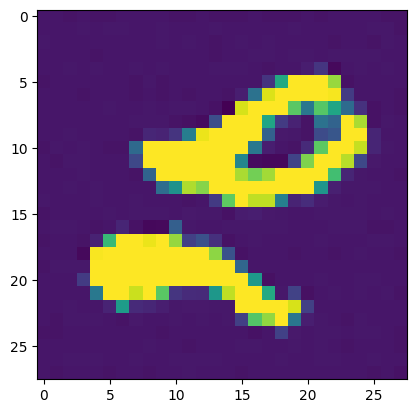


Epoch: 88 | Learning Rate: 0.0001677721600000001
0.034732770174741745
0.03485063090920448
0.03313365951180458
0.031999532133340836
0.034775134176015854
0.033744391053915024
0.036387935280799866
0.03415834903717041
0.034725844860076904
0.03589257597923279
0.03573918342590332
0.03517618030309677
0.0338188074529171
0.03510862961411476
0.03619524464011192
0.036423370242118835
0.034362055361270905
0.03580210357904434
0.03437312692403793
0.03477311134338379
0.03482147678732872
0.03678714111447334
0.03636166825890541
0.033548660576343536
0.03359255567193031
0.038555942475795746
0.035215381532907486
0.036642033606767654
0.033010244369506836
0.03344256058335304
0.03372030705213547
0.03642233833670616
0.03581690788269043
0.03486602008342743
0.032602619379758835
0.03386980667710304
0.03400368615984917
0.03441815823316574
0.036200277507305145
0.03564699366688728
0.03626404330134392
0.035680826753377914
0.03521805629134178
0.03482995182275772
0.035223621875047684
0.03481081873178482
0.037692647427

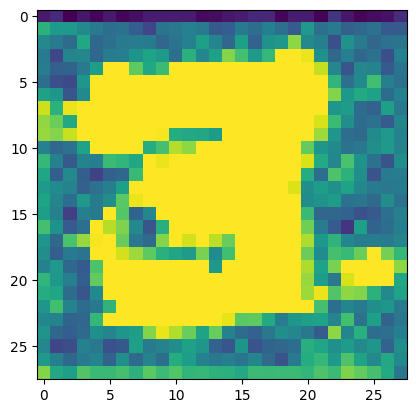


Epoch: 89 | Learning Rate: 0.0001677721600000001
0.03532490134239197
0.03581211715936661
0.03465993329882622
0.03622516244649887
0.034163326025009155
0.03502833843231201
0.036382775753736496
0.03432196006178856
0.03518836200237274
0.035486482083797455
0.036537811160087585
0.03509744629263878
0.03421848639845848
0.035994432866573334
0.035499848425388336
0.03261999785900116
0.03529767692089081
0.0360279455780983
0.03511804714798927
0.03518756106495857
0.03484446555376053
0.034707676619291306
0.03479738533496857
0.03487221151590347
0.03496752306818962
0.03490437567234039
0.03608528897166252
0.035096123814582825
0.03609401732683182
0.03556017950177193
0.03557769954204559
0.03329942747950554
0.033765003085136414
0.035385943949222565
0.03510146588087082
0.03466321527957916
0.03515969589352608
0.03544360026717186
0.03400745987892151
0.03531499579548836
0.03455697000026703
0.034686747938394547
0.03439173847436905
0.03568795695900917
0.03572120890021324
0.036680061370134354
0.03429065272212028

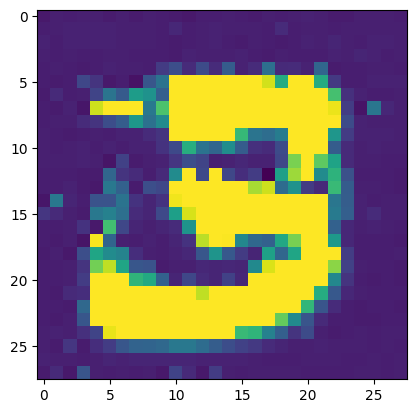


Epoch: 90 | Learning Rate: 0.0001677721600000001
0.03468189015984535
0.03230844810605049
0.036239560693502426
0.03479810431599617
0.034228432923555374
0.034814897924661636
0.034165818244218826
0.0337115041911602
0.0365421362221241
0.035042133182287216
0.0350339375436306
0.03641709312796593
0.03439975157380104
0.03330065310001373
0.03328987956047058
0.03415204957127571
0.03596195951104164
0.035187844187021255
0.037089988589286804
0.03542635217308998
0.032012831419706345
0.03526080399751663
0.03582241013646126
0.03456288203597069
0.03584248945116997
0.034266289323568344
0.03497261181473732
0.034798502922058105
0.03477535769343376
0.03486710041761398
0.03325318917632103
0.03299252316355705
0.03505605831742287
0.03413093090057373
0.0353662334382534
0.03440890088677406
0.034144964069128036
0.03440910950303078
0.03391651809215546
0.03546728566288948
0.034633006900548935
0.03744131699204445
0.035312335938215256
0.03557078540325165
0.03434249758720398
0.03460065647959709
0.03453829884529114
0

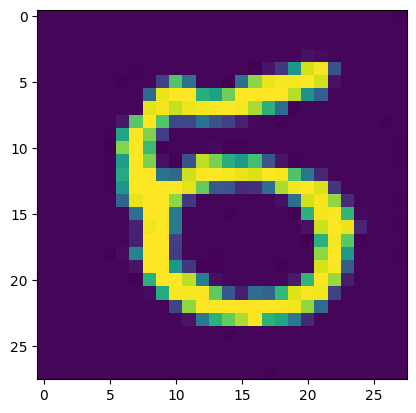


Epoch: 91 | Learning Rate: 0.00013421772800000008
0.03450792282819748
0.03377244994044304
0.033172979950904846
0.03466362878680229
0.03404982388019562
0.033245787024497986
0.034797366708517075
0.03542018681764603
0.035511188209056854
0.03311809152364731
0.034448690712451935
0.033809445798397064
0.03348894044756889
0.03565765917301178
0.0338398776948452
0.033571019768714905
0.034113809466362
0.032657790929079056
0.03492497280240059
0.03695725277066231
0.035716183483600616
0.03293931111693382
0.03498309105634689
0.03397943079471588
0.03728126734495163
0.03498081490397453
0.03511134535074234
0.03629355505108833
0.03552054241299629
0.03243458271026611
0.035696569830179214
0.03609175980091095
0.03434717282652855
0.035468537360429764
0.035319142043590546
0.0345330648124218
0.03425121307373047
0.03562819957733154
0.03579885885119438
0.03316205367445946
0.03389987722039223
0.03455802798271179
0.034683581441640854
0.03582241013646126
0.036271918565034866
0.03563451021909714
0.03448419645428657

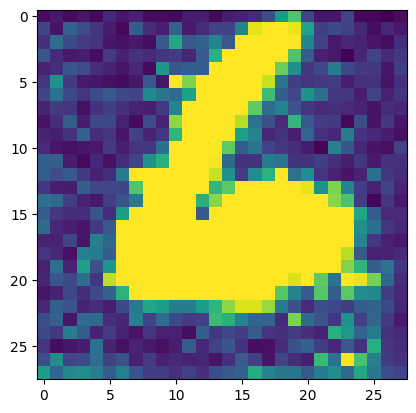


Epoch: 92 | Learning Rate: 0.00013421772800000008
0.03488602489233017
0.03369696065783501
0.0355650819838047
0.03347063437104225
0.03568808361887932
0.03214116021990776
0.03605594485998154
0.03356669470667839
0.03514618054032326
0.034961603581905365
0.03641725704073906
0.0369764119386673
0.0359923392534256
0.03263842687010765
0.03545495122671127
0.03467130288481712
0.03413807973265648
0.03517721965909004
0.03485024720430374
0.033891819417476654
0.032362449914216995
0.03462573513388634
0.03261995688080788
0.036206405609846115
0.0341918021440506
0.0348968505859375
0.03451945260167122
0.033077023923397064
0.03425994887948036
0.03551376610994339
0.03536229580640793
0.03349553048610687
0.033727873116731644
0.03600950911641121
0.036424532532691956
0.03561790660023689
0.03447563201189041
0.03453613072633743
0.03470702841877937
0.03364623337984085
0.03640046715736389
0.035678744316101074
0.033778149634599686
0.03327614441514015
0.03387158736586571
0.03622901067137718
0.03409451246261597
0.033

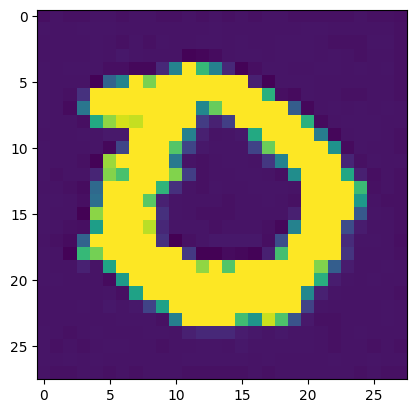


Epoch: 93 | Learning Rate: 0.00013421772800000008
0.034120913594961166
0.03523796796798706
0.03510152921080589
0.03703830763697624
0.034732505679130554
0.03365572169423103
0.03475019335746765
0.034244317561388016
0.034547947347164154
0.034922000020742416
0.03421144187450409
0.0354861244559288
0.032452262938022614
0.03590434417128563
0.03458850830793381
0.03421717509627342
0.03565371781587601
0.03390248492360115
0.034642819315195084
0.03437580168247223
0.034712184220552444
0.03372734412550926
0.035288482904434204
0.03326871246099472
0.034416504204273224
0.0332576148211956
0.03260378539562225
0.035402312874794006
0.03603704646229744
0.034221258014440536
0.034323111176490784
0.0364890955388546
0.034061018377542496
0.03650647774338722
0.035098474472761154
0.0348576195538044
0.03414209559559822
0.03371977061033249
0.03597717359662056
0.03329905495047569
0.036532532423734665
0.0360620878636837
0.032305311411619186
0.03574299067258835
0.034191396087408066
0.034942109137773514
0.0344574600458

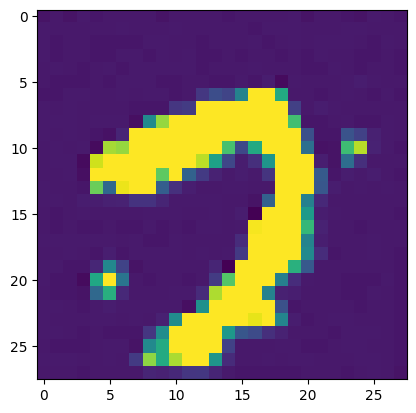


Epoch: 94 | Learning Rate: 0.00013421772800000008
0.03351709246635437
0.03374720364809036
0.037797313183546066
0.03407909348607063
0.03355865180492401
0.03462296351790428
0.034883350133895874
0.03555653989315033
0.036468248814344406
0.03445747494697571
0.036556750535964966
0.03549695014953613
0.03586190566420555
0.03584444150328636
0.03486941382288933
0.03360849246382713
0.0346405915915966
0.03326266258955002
0.03591199591755867
0.03375697508454323
0.03494633734226227
0.033245403319597244
0.03488906845450401
0.03387276083230972
0.034755125641822815
0.037175215780735016
0.035469431430101395
0.034080274403095245
0.03579948842525482
0.03326140716671944
0.03308071196079254
0.03669513761997223
0.03615756705403328
0.03477342054247856
0.036199524998664856
0.035001445561647415
0.03594580292701721
0.033782582730054855
0.035541657358407974
0.03579423949122429
0.03700646013021469
0.035534802824258804
0.03562844544649124
0.03417715057730675
0.033576928079128265
0.034641679376363754
0.035536013543

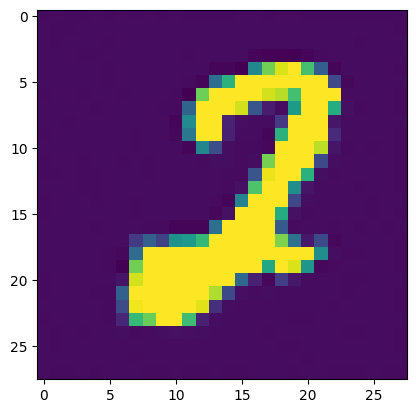


Epoch: 95 | Learning Rate: 0.00013421772800000008
0.03417954593896866
0.036872997879981995
0.03543507307767868
0.036437228322029114
0.03419871628284454
0.0365111343562603
0.035639286041259766
0.03655350208282471
0.03588353842496872
0.035243675112724304
0.03619930520653725
0.03467259556055069
0.03587733581662178
0.03566473349928856
0.035232074558734894
0.03426213935017586
0.03337579965591431
0.0340285524725914
0.034218236804008484
0.034083154052495956
0.03325347602367401
0.03472711890935898
0.03348786383867264
0.03465237468481064
0.034188225865364075
0.03583193197846413
0.0354728028178215
0.03649662807583809
0.03591981157660484
0.03429080918431282
0.03469683974981308
0.03381109610199928
0.03480130806565285
0.03223786503076553
0.03613291308283806
0.03596998006105423
0.03656838834285736
0.036749217659235
0.03516724705696106
0.03388642892241478
0.03496517613530159
0.034227076917886734
0.03466179966926575
0.03590390458703041
0.03559304028749466
0.034026168286800385
0.03503590449690819
0.03

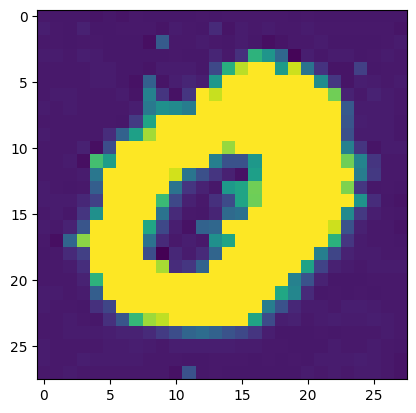


Epoch: 96 | Learning Rate: 0.00013421772800000008
0.03478940948843956
0.033558525145053864
0.03465884551405907
0.03519365191459656
0.03593236953020096
0.03179328888654709
0.035053785890340805
0.03345147520303726
0.036912232637405396
0.0342620424926281
0.03603053838014603
0.03629931062459946
0.03469136729836464
0.035641659051179886
0.034265097230672836
0.03293798863887787
0.034628625959157944
0.034336961805820465
0.03508222848176956
0.03520471230149269
0.034794844686985016
0.03479121997952461
0.035347115248441696
0.035331469029188156
0.03660890460014343
0.034269705414772034
0.03495711088180542
0.034600891172885895
0.03357252478599548
0.035545963793992996
0.033487629145383835
0.03554505482316017
0.03444699943065643
0.03504369780421257
0.03445073962211609
0.034817494451999664
0.03450262174010277
0.03523324802517891
0.03538762405514717
0.03476591780781746
0.034151799976825714
0.03369826450943947
0.034480225294828415
0.034374430775642395
0.03429398313164711
0.03572681546211243
0.0352259203

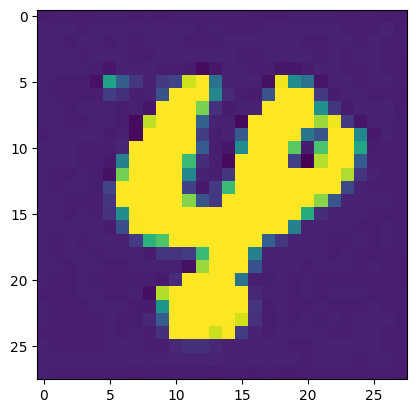


Epoch: 97 | Learning Rate: 0.00013421772800000008
0.03430245816707611
0.033336933702230453
0.03467302769422531
0.0323251374065876
0.033148959279060364
0.03565025329589844
0.03536640852689743
0.03418589383363724
0.03363596647977829
0.03483414649963379
0.03614233806729317
0.03495851159095764
0.03413956239819527
0.03547317907214165
0.03562669828534126
0.034662723541259766
0.03411339968442917
0.03596761077642441
0.03416115418076515
0.0347401425242424
0.032794512808322906
0.03548259288072586
0.03505225107073784
0.036686576902866364
0.03600293770432472
0.03488091379404068
0.033794105052948
0.035470250993967056
0.036122310906648636
0.03448772057890892
0.032309841364622116
0.03385785594582558
0.035500846803188324
0.03548768162727356
0.03408896550536156
0.035165246576070786
0.03545961156487465
0.033892326056957245
0.03477144241333008
0.035585712641477585
0.03465494140982628
0.034548070281744
0.03384971618652344
0.03439079597592354
0.03413871303200722
0.034173768013715744
0.03445974737405777
0.

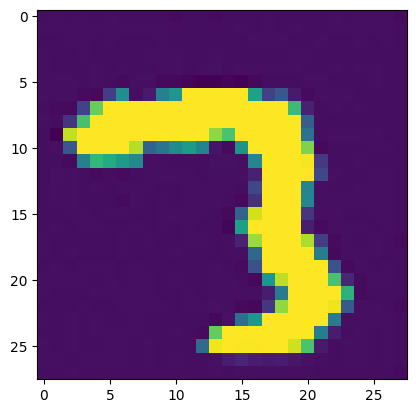


Epoch: 98 | Learning Rate: 0.00013421772800000008
0.03485781326889992
0.03584694117307663
0.03442049026489258
0.03334689140319824
0.03583688661456108
0.03515908494591713
0.03421647474169731
0.03329780697822571
0.032413847744464874
0.03363887220621109
0.03502216935157776
0.03530396521091461
0.03454669192433357
0.034953486174345016
0.03346118703484535
0.03418989107012749
0.03517787158489227
0.03455745428800583
0.03508773073554039
0.03307730704545975
0.03355495259165764
0.03497440740466118
0.03548338636755943
0.03533928096294403
0.03388166055083275
0.033696532249450684
0.03376561775803566
0.03404289484024048
0.03486347571015358
0.035113781690597534
0.034159302711486816
0.03454380854964256
0.03404087945818901
0.03398861736059189
0.03540775552392006
0.03174925968050957
0.033255092799663544
0.035749856382608414
0.03539746254682541
0.0327710397541523
0.032792117446660995
0.0348067469894886
0.03387733921408653
0.03702029213309288
0.03406982123851776
0.03455960378050804
0.0332658477127552
0.03

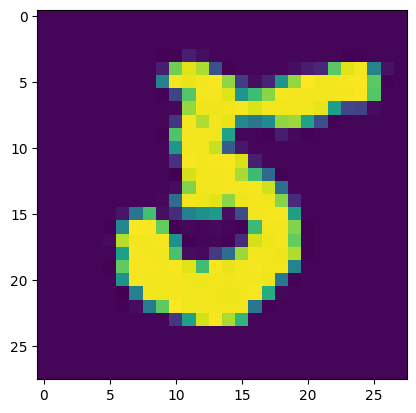


Epoch: 99 | Learning Rate: 0.00013421772800000008
0.03461721912026405
0.034512072801589966
0.03483879193663597
0.034478507936000824
0.036393411457538605
0.0346040315926075
0.03292381763458252
0.03401822969317436
0.03812461346387863
0.03511359542608261
0.03360749036073685
0.03468147665262222
0.03389153629541397
0.0361902229487896
0.0343802273273468
0.03559688478708267
0.03317389637231827
0.03481380641460419
0.03522295877337456
0.03385006636381149
0.035781387239694595
0.03687414154410362
0.03762674704194069
0.03593536838889122
0.038378044962882996
0.03537975624203682
0.03524463251233101
0.03551657125353813
0.034991875290870667
0.033259570598602295
0.03522033616900444
0.03719191998243332
0.035275716334581375
0.03547484427690506
0.03611999750137329
0.035170748829841614
0.033257171511650085
0.036451131105422974
0.03388301283121109
0.03448422998189926
0.03608303517103195
0.03432769700884819
0.034954674541950226
0.03434119001030922
0.03300497308373451
0.03368549048900604
0.03521377220749855


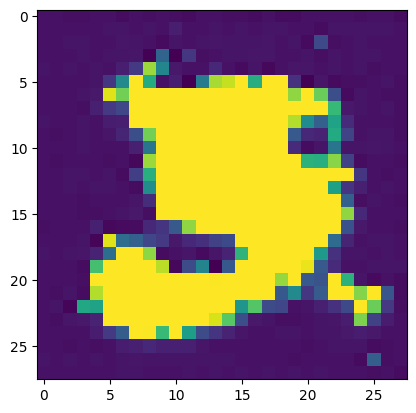


Epoch: 100 | Learning Rate: 0.00013421772800000008
0.033538445830345154
0.03415556997060776
0.03201892971992493
0.0343766063451767
0.033289771527051926
0.033200304955244064
0.03607359156012535
0.03467871993780136
0.03388362377882004
0.033197253942489624
0.03323083370923996
0.036756254732608795
0.03277256712317467
0.03425566852092743
0.03463507816195488
0.034767646342515945
0.035107772797346115
0.033878881484270096
0.034251514822244644
0.03642553836107254
0.0341574102640152
0.03347648307681084
0.03413645923137665
0.03346126899123192
0.03584682568907738
0.034834835678339005
0.033415015786886215
0.03530660271644592
0.03326934203505516
0.03357263281941414
0.03391886502504349
0.03553490713238716
0.03709133341908455
0.036148007959127426
0.03313871845602989
0.03609705716371536
0.0363105945289135
0.03487524762749672
0.03524798899888992
0.03378770872950554
0.03530268371105194
0.03581741452217102
0.03656299039721489
0.033500947058200836
0.033371392637491226
0.035127192735672
0.03400677815079689

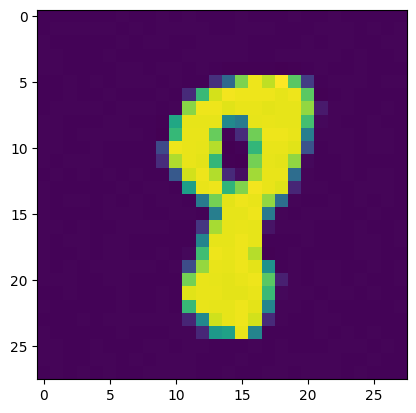

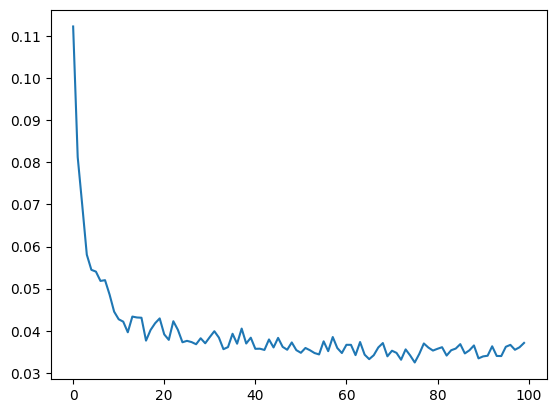

In [13]:
print("Number of parameters:", sum([param.numel() for param in unet.parameters()]))
optimizer = optim.Adam(unet.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.8)
train(unet, data, ddpm, optimizer, scheduler, epochs=100, num_workers=2)

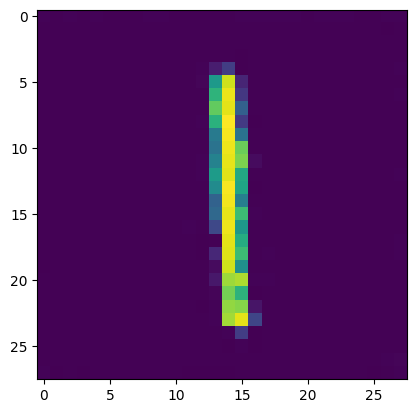

In [16]:
unet.eval()
display_generated(unet, ddpm, data)

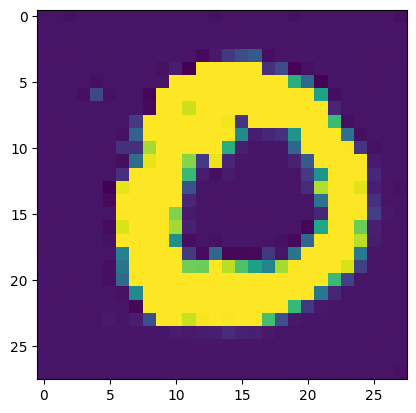

In [17]:
unet.eval()
display_generated(unet, ddpm, data)

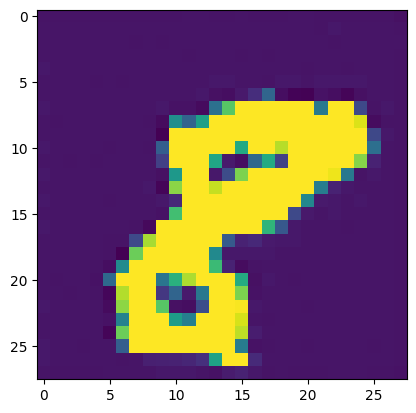

In [20]:
unet.eval()
display_generated(unet, ddpm, data)

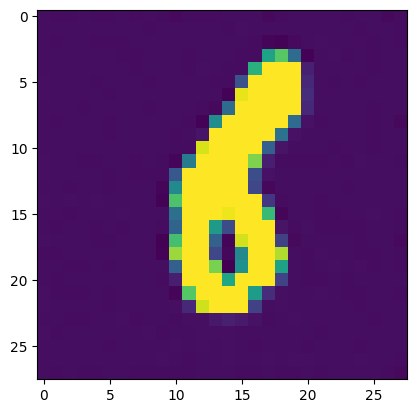

In [26]:
unet.eval()
display_generated(unet, ddpm, data)

In [32]:
ddpm_dict = {
  "beta_start": 1e-4,
  "beta_end": 2e-2,
  "timesteps": 512,
  "device": device,
  "dtype": dtype
}

data_dict = {
  "name": "cifar10",
  "path": "data",
  "batch_size": 1024
}

ddpm = DDPM(**ddpm_dict)
data2 = Data(**data_dict)

unet_dict = {
  "input_channels": data2.shape[0],
  "hid_channels": 32,
  "num_blocks": 4,
  "emb_dim": 512
}

unet2 = UNet(**unet_dict).to(dtype=ddpm.dtype, device=ddpm.device)

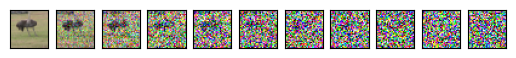

In [34]:
visualize_forward(ddpm, data2)

Number of parameters: 9563776

Epoch: 1 | Learning Rate: 0.001
1.289312481880188
0.9708441495895386
0.7693570852279663
0.6367079615592957
0.5320659279823303
0.48031479120254517
0.41577526926994324
0.36085695028305054
0.3432140052318573
0.311410129070282
0.29167288541793823
0.2677169442176819
0.2420419454574585
0.2281779944896698
0.21860206127166748
0.21395257115364075
0.20807074010372162
0.2004399597644806
0.20867043733596802
0.1902357041835785
0.19654321670532227
0.20110401511192322
0.17548418045043945
0.17321912944316864
0.17159400880336761
0.18177419900894165
0.1762245148420334
0.1723574846982956
0.1670035421848297
0.16605104506015778
0.16894075274467468
0.1595696061849594
0.1630876660346985
0.16705021262168884
0.15655063092708588
0.15835990011692047
0.15342167019844055
0.15826719999313354
0.14728644490242004
0.15179800987243652
0.1549641191959381
0.15509599447250366
0.14515966176986694
0.15447914600372314
0.1478569209575653
0.1426849663257599
0.14625075459480286
0.14260664582252502

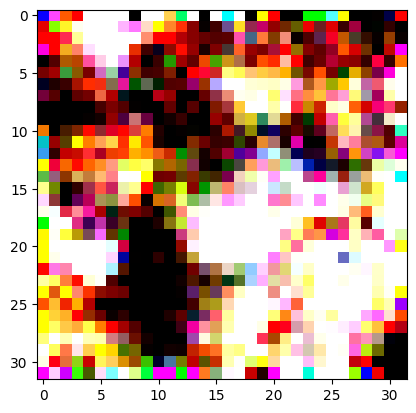


Epoch: 2 | Learning Rate: 0.001
0.1365644633769989
0.14648810029029846
0.1381600946187973
0.13742393255233765
0.14227400720119476
0.13242781162261963
0.13776977360248566
0.13863450288772583
0.13251589238643646
0.13821910321712494
0.1264420747756958
0.13989751040935516
0.1339867115020752
0.13611263036727905
0.12927138805389404
0.13142655789852142
0.13160592317581177
0.13013364374637604
0.12490832805633545
0.1255340278148651
0.12547796964645386
0.1338290125131607
0.12634897232055664
0.12605994939804077
0.13412806391716003
0.12390874326229095
0.12707141041755676
0.12311196327209473
0.12146121263504028
0.12751001119613647
0.1233384907245636
0.11598831415176392
0.11811508983373642
0.1210923120379448
0.11758234351873398
0.11363162845373154
0.1235029548406601
0.11994844675064087
0.12215279787778854
0.12191466987133026
0.1129479855298996
0.11828165501356125
0.10817214101552963
0.11273982375860214
0.11976216733455658
0.11413353681564331
0.11911457031965256
0.10803499072790146
0.112978160381317

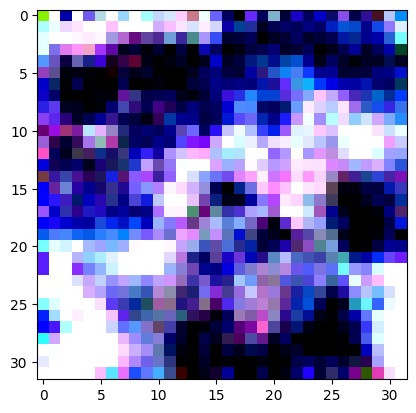


Epoch: 3 | Learning Rate: 0.001
0.10723082721233368
0.10667839646339417
0.10807405412197113
0.10932948440313339
0.11224064230918884
0.10450012981891632
0.10873522609472275
0.10310404747724533
0.10879237949848175
0.10142375528812408
0.10503202676773071
0.10597382485866547
0.09745156764984131
0.09553351253271103
0.10334240645170212
0.0999162495136261
0.10479065775871277
0.10157601535320282
0.09818899631500244
0.09532992541790009
0.09465247392654419
0.10307087749242783
0.10416305065155029
0.09434892982244492
0.09671449661254883
0.1022978276014328
0.09543505311012268
0.09362351894378662
0.09793045371770859
0.09211836755275726
0.09671672433614731
0.0965263769030571
0.10121415555477142
0.09357990324497223
0.09091456234455109
0.09035094827413559
0.0983659029006958
0.09036102145910263
0.09348007291555405
0.09419569373130798
0.09056268632411957
0.08410507440567017
0.09346511960029602
0.08477018773555756
0.08779692649841309
0.0962032899260521
0.08523638546466827
0.09190928190946579
0.0864518284

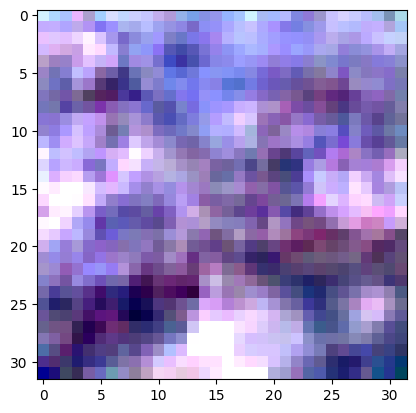


Epoch: 4 | Learning Rate: 0.001
0.08725208044052124
0.08992281556129456
0.08970712125301361
0.09009300172328949
0.08799652755260468
0.08524161577224731
0.08226287364959717
0.09116494655609131
0.08340764045715332
0.0860980898141861
0.08768757432699203
0.09083056449890137
0.09698338806629181
0.08815126121044159
0.09148566424846649
0.08780497312545776
0.0848395824432373
0.07897045463323593
0.08189915120601654
0.08653207868337631
0.08732345700263977
0.08053325861692429
0.08241792768239975
0.07806399464607239
0.08281514048576355
0.08343541622161865
0.08623158931732178
0.0855729803442955
0.08548808097839355
0.08388029038906097
0.07838436216115952
0.07843863219022751
0.0826738253235817
0.07506787776947021
0.0758015513420105
0.08180981129407883
0.07543383538722992
0.08174349367618561
0.07827012985944748
0.08919945359230042
0.07729966938495636
0.08263926208019257
0.07576721906661987
0.08857493847608566
0.07859301567077637
0.07908979058265686
0.07930364459753036
0.08230537176132202
0.0730778798

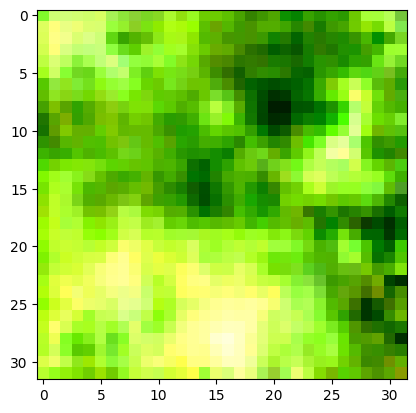


Epoch: 5 | Learning Rate: 0.001
0.08565527200698853
0.07188110053539276
0.08061830699443817
0.08245812356472015
0.07777637988328934
0.07505781948566437
0.07771597057580948
0.08165993541479111
0.07754048705101013
0.08565177023410797
0.08504264801740646
0.07986088842153549
0.0767211988568306
0.08113708347082138
0.07611935585737228
0.07818779349327087
0.08037929981946945
0.07666721940040588
0.08252774178981781
0.07816644757986069
0.08028243482112885
0.07781054824590683
0.08145631849765778
0.07952388375997543
0.06955563277006149
0.08232332766056061
0.0720774307847023
0.07235389947891235
0.07478944212198257
0.0769706666469574
0.06967642158269882
0.07499943673610687
0.07213014364242554
0.07696230709552765
0.07523985207080841
0.07721664756536484
0.08258607238531113
0.07423266768455505
0.07455652207136154
0.07595531642436981
0.06920238584280014
0.06884261965751648
0.07194999605417252
0.07202406227588654
0.06961560249328613
0.07457111775875092
0.06474249809980392
0.08132036030292511
0.07860429

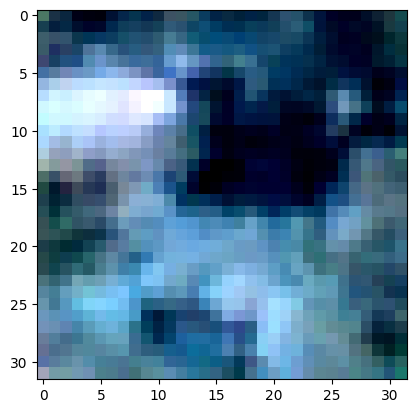


Epoch: 6 | Learning Rate: 0.001
0.06976489722728729
0.07835506647825241
0.06988141685724258
0.07578983902931213
0.07424309849739075
0.07609031349420547
0.07223160564899445
0.08278076350688934
0.06900206208229065
0.0718224048614502
0.0732242614030838
0.0731215700507164
0.07577654719352722
0.07234961539506912
0.07533705234527588
0.0739312395453453
0.07205557823181152
0.07088444381952286
0.07238265872001648
0.07502055168151855
0.06756958365440369
0.06565000861883163
0.0669904574751854
0.07200080156326294
0.06959323585033417
0.07069399952888489
0.06976445764303207
0.07318943738937378
0.07579553127288818
0.07094095647335052
0.07466999441385269
0.0728721171617508
0.07205186784267426
0.07438953965902328
0.07086309790611267
0.06885561347007751
0.0680057555437088
0.071358323097229
0.0667664110660553
0.06963690370321274
0.07510276883840561
0.06907199323177338
0.06804843246936798
0.06487296521663666
0.06331580132246017
0.06796278059482574
0.07495956122875214
0.07032546401023865
0.069234728813171

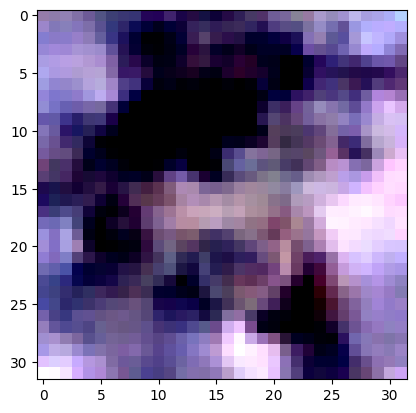


Epoch: 7 | Learning Rate: 0.001
0.0701436698436737
0.06420126557350159
0.07294345647096634
0.06587566435337067
0.07150640338659286
0.07627741247415543
0.06767743825912476
0.06469814479351044
0.06767463684082031
0.07200036942958832
0.06614595651626587
0.07136186212301254
0.06139153242111206
0.07275506108999252
0.06424208730459213
0.06788386404514313
0.06820491701364517
0.06777702271938324
0.060695163905620575
0.06403028219938278
0.06656991690397263
0.07140827178955078
0.067548468708992
0.06493255496025085
0.06373997032642365
0.06329376995563507
0.06747882813215256
0.07060255110263824
0.0673903226852417
0.06287791579961777
0.0745074525475502
0.06802284717559814
0.06278342008590698
0.0654047355055809
0.06602906435728073
0.06654080748558044
0.06750010699033737
0.06654809415340424
0.06231646239757538
0.06298261880874634
0.06458484381437302
0.06711716949939728
0.07341642677783966
0.06602462381124496
0.06837492436170578
0.06682196259498596
0.06472939997911453
0.06561283767223358
0.0695912241

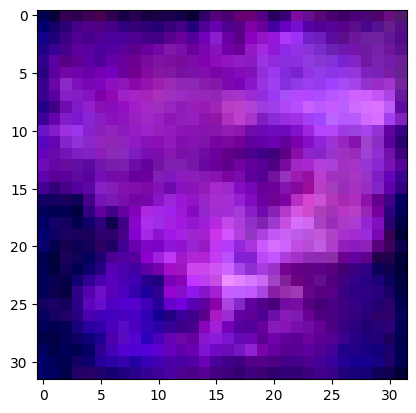


Epoch: 8 | Learning Rate: 0.001
0.0711924135684967
0.06773176789283752
0.05798758566379547
0.06296339631080627
0.06313587725162506
0.06291582435369492
0.06995176523923874
0.06488925218582153
0.06253166496753693
0.06316643208265305
0.05854673683643341
0.06548893451690674
0.06360866874456406
0.06316488981246948
0.06479251384735107
0.06252679228782654
0.06269168853759766
0.06177135556936264
0.06351864337921143
0.06818613409996033
0.06436275690793991
0.06309757381677628
0.0595993772149086
0.06803526729345322
0.06146445870399475
0.06180792301893234
0.0649636909365654
0.06500683724880219
0.06530459970235825
0.06201428174972534
0.06367267668247223
0.06075555831193924
0.06219082325696945
0.062133219093084335
0.06274834275245667
0.0691743791103363
0.06214950606226921
0.06435857713222504
0.060491420328617096
0.0632462278008461
0.06654664874076843
0.05899384245276451
0.06037644296884537
0.060600392520427704
0.06699731945991516
0.06473574042320251
0.0653022825717926
0.06524336338043213
0.05612683

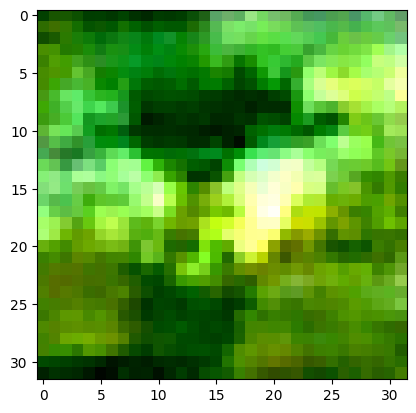


Epoch: 9 | Learning Rate: 0.001
0.0644422248005867
0.060969315469264984
0.05953159183263779
0.0611908957362175
0.05998337268829346
0.06265375018119812
0.05913498252630234
0.06307752430438995
0.05843142792582512
0.0619310587644577
0.05432063341140747
0.06070859730243683
0.06195015460252762
0.06458992511034012
0.06341391801834106
0.06390339136123657
0.06294868886470795
0.06492652744054794
0.06088833138346672
0.060361288487911224
0.0673406645655632
0.0575176402926445
0.061065785586833954
0.06346433609724045
0.05538966506719589
0.06125194951891899
0.06339959800243378
0.06233276054263115
0.06686446070671082
0.06428790092468262
0.06061679124832153
0.06399491429328918
0.05964794009923935
0.06132591515779495
0.05930453538894653
0.06214163452386856
0.05614263936877251
0.06581467390060425
0.059458374977111816
0.061953216791152954
0.058362048119306564
0.05839463323354721
0.06339748948812485
0.05711553618311882
0.05970659479498863
0.06513337790966034
0.057505376636981964
0.05393056198954582
0.063

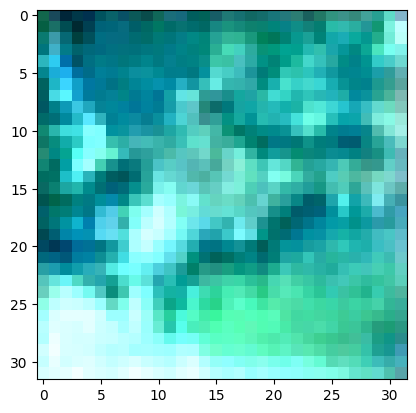


Epoch: 10 | Learning Rate: 0.001
0.057124342769384384
0.05590978264808655
0.06019965559244156
0.06332287192344666
0.060265298932790756
0.05789419263601303
0.06593218445777893
0.06040799617767334
0.05906664580106735
0.06147509813308716
0.05398029088973999
0.06527091562747955
0.06136838719248772
0.06211423873901367
0.058265697211027145
0.059622567147016525
0.055160995572805405
0.0579054057598114
0.05698731541633606
0.06304704397916794
0.06830732524394989
0.057280730456113815
0.0620134174823761
0.05917680263519287
0.061640821397304535
0.061055343598127365
0.060122646391391754
0.06261323392391205
0.05609883368015289
0.05993550270795822
0.06253719329833984
0.05424818396568298
0.06031890958547592
0.057601720094680786
0.06450323760509491
0.056027501821517944
0.05796000361442566
0.059399329125881195
0.05742664262652397
0.06456975638866425
0.0650814026594162
0.06387680023908615
0.05858888849616051
0.06429488956928253
0.05587450787425041
0.05952976271510124
0.06209232658147812
0.054161753505468

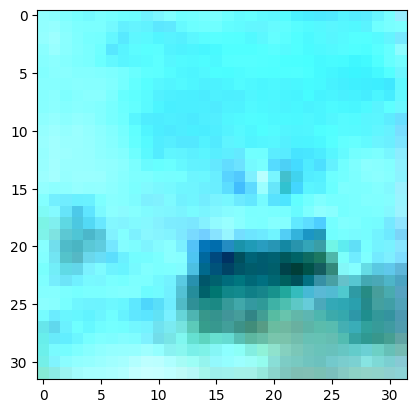


Epoch: 11 | Learning Rate: 0.0008
0.0572689026594162
0.0591815710067749
0.06250018626451492
0.060966312885284424
0.05831044912338257
0.06351003050804138
0.06258097290992737
0.06208503246307373
0.05907361954450607
0.060845937579870224
0.055951617658138275
0.05706799030303955
0.05941155180335045
0.05798565596342087
0.05598463863134384
0.06020934879779816
0.062029048800468445
0.06157303601503372
0.061707720160484314
0.055529654026031494
0.061220139265060425
0.055999934673309326
0.06240297853946686
0.05890551209449768
0.06048574671149254
0.056738197803497314
0.060736339539289474
0.06109234690666199
0.06179685518145561
0.06327780336141586
0.05158977955579758
0.06094055622816086
0.059459418058395386
0.05798209458589554
0.056205879896879196
0.05489487573504448
0.06007321923971176
0.06164497137069702
0.055410467088222504
0.059956200420856476
0.05716919153928757
0.061334770172834396
0.05480457469820976
0.05700017511844635
0.05993740260601044
0.05953970178961754
0.05948618799448013
0.0580745600

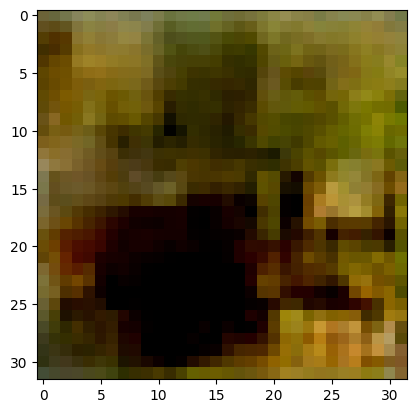


Epoch: 12 | Learning Rate: 0.0008
0.05998227000236511
0.056005753576755524
0.05681236833333969
0.05879434943199158
0.06207998842000961
0.05835646018385887
0.05294455587863922
0.05877292901277542
0.05927984416484833
0.057719528675079346
0.06389708817005157
0.05956979840993881
0.06054646894335747
0.05400375649333
0.05705376714468002
0.05931110307574272
0.05528546869754791
0.055964335799217224
0.056706055998802185
0.06257417798042297
0.05691532418131828
0.06147855520248413
0.059890441596508026
0.058034829795360565
0.058368831872940063
0.060092680156230927
0.06002172827720642
0.055401694029569626
0.05341046303510666
0.0557168684899807
0.06065201386809349
0.05615272372961044
0.06087322160601616
0.06113145500421524
0.05319008231163025
0.06077578663825989
0.0558975450694561
0.059522151947021484
0.05876053869724274
0.05312960594892502
0.05692528188228607
0.05626353621482849
0.0609675869345665
0.05387279391288757
0.06016618013381958
0.059619247913360596
0.06083059310913086
0.05616043135523796


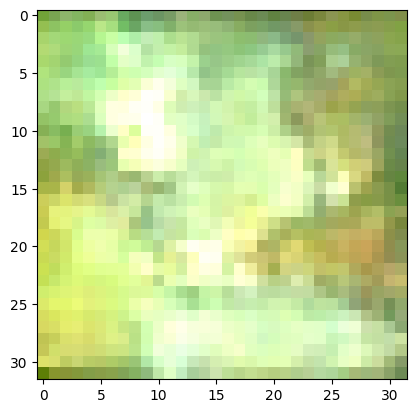


Epoch: 13 | Learning Rate: 0.0008
0.05708833783864975
0.056598465889692307
0.06301435828208923
0.05635197088122368
0.06061014533042908
0.061481647193431854
0.053170204162597656
0.0547524094581604
0.05571497604250908
0.05777036398649216
0.05549801513552666
0.05301549285650253
0.0531793013215065
0.05536728724837303
0.059562504291534424
0.05485362932085991
0.06508736312389374
0.0560479611158371
0.058104828000068665
0.057725559920072556
0.05663927644491196
0.061849407851696014
0.056733809411525726
0.05441008135676384
0.05678600072860718
0.05427750200033188
0.058900125324726105
0.060030631721019745
0.05987316370010376
0.05572030693292618
0.056843407452106476
0.05910578370094299
0.0545668751001358
0.05854800343513489
0.058411773294210434
0.05825435742735863
0.06286510825157166
0.06390560418367386
0.05689387768507004
0.059423722326755524
0.06095662713050842
0.059930719435214996
0.06091512739658356
0.05836171656847
0.05881994217634201
0.05636642500758171
0.05256801098585129
0.0566069893538951

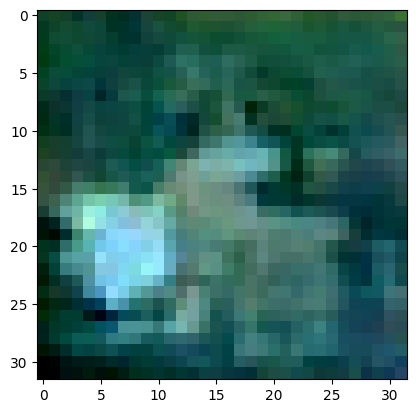


Epoch: 14 | Learning Rate: 0.0008
0.05787736922502518
0.05075107514858246
0.059768494218587875
0.05633939802646637
0.057637449353933334
0.05494650453329086
0.054724402725696564
0.06079104542732239
0.05762491375207901
0.05376671999692917
0.05495501682162285
0.051482848823070526
0.05355753004550934
0.0597655288875103
0.05847923085093498
0.05577396601438522
0.051362764090299606
0.056142717599868774
0.057864002883434296
0.05835258215665817
0.05495951697230339
0.05051806569099426
0.05377468466758728
0.051530834287405014
0.05595792457461357
0.0565996989607811
0.06345929205417633
0.05575158819556236
0.056701891124248505
0.05401141569018364
0.05485324189066887
0.05360131710767746
0.05283039063215256
0.05603472515940666
0.05513115972280502
0.057600222527980804
0.05498374253511429
0.05559597536921501
0.05029106140136719
0.05794356390833855
0.0523066520690918
0.05544789880514145
0.05616658180952072
0.05963054299354553
0.05572434514760971
0.059928663074970245
0.05469426512718201
0.051271431148052

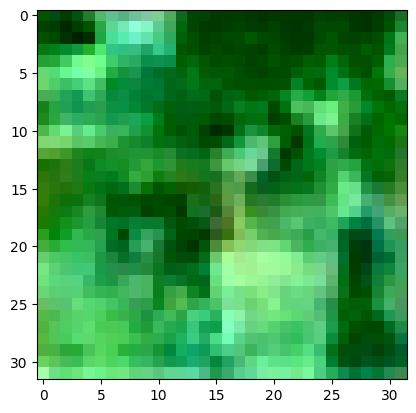


Epoch: 15 | Learning Rate: 0.0008
0.0558634027838707
0.05286885425448418
0.05358637869358063
0.05867856368422508
0.053855255246162415
0.05029551684856415
0.05406910181045532
0.05329478904604912
0.0578201487660408
0.04999320209026337
0.05196823924779892
0.053141530603170395
0.05659446865320206
0.05414222925901413
0.061454080045223236
0.055528007447719574
0.057971980422735214
0.0587802529335022
0.051505476236343384
0.0573887974023819
0.06004779785871506
0.059953898191452026
0.052978675812482834
0.050630271434783936
0.053766943514347076
0.0577414408326149
0.05403252691030502
0.05535473674535751
0.05507698655128479
0.05901447683572769
0.05684104189276695
0.05485178530216217
0.05191881209611893
0.05761780962347984
0.05797271430492401
0.059439659118652344
0.05780640244483948
0.05015037581324577
0.05406155437231064
0.05272824689745903
0.061542809009552
0.05742670223116875
0.05746803432703018
0.0477835051715374
0.059291720390319824
0.05587967485189438
0.052932705730199814
0.05425027012825012


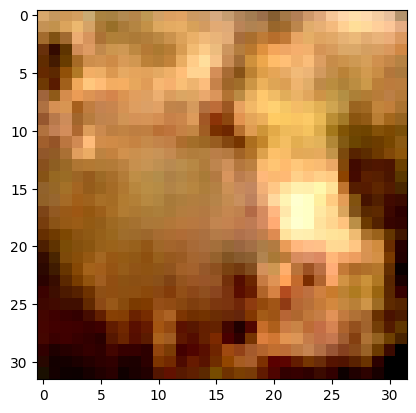


Epoch: 16 | Learning Rate: 0.0008
0.0543823167681694
0.05516713112592697
0.052482299506664276
0.05872040241956711
0.052108120173215866
0.055799342691898346
0.05387258529663086
0.05531826615333557
0.0537845715880394
0.05736805126070976
0.05357832834124565
0.05790465325117111
0.053254395723342896
0.05244183540344238
0.05510056018829346
0.05957838147878647
0.0509941503405571
0.05733969807624817
0.05165274068713188
0.057455241680145264
0.05486904829740524
0.056721873581409454
0.05648988485336304
0.05752063915133476
0.05669118091464043
0.060337573289871216
0.05770183727145195
0.06054065749049187
0.05561443418264389
0.052834250032901764
0.060966841876506805
0.05088939517736435
0.05837390571832657
0.05708813667297363
0.056771278381347656
0.054611872881650925
0.05881882831454277
0.05644833296537399
0.05921248719096184
0.05503516644239426
0.05557052791118622
0.05068269371986389
0.053956545889377594
0.05776699632406235
0.05339304730296135
0.057705145329236984
0.05277138948440552
0.0561867952346

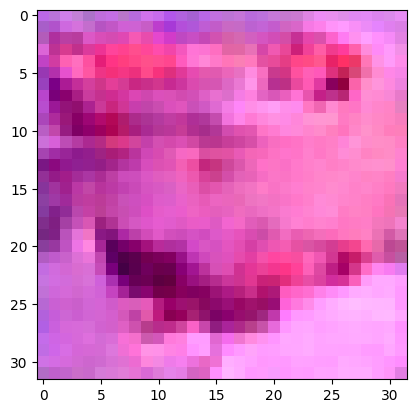


Epoch: 17 | Learning Rate: 0.0008
0.05889277905225754
0.05407597869634628
0.04894475266337395
0.05689463019371033
0.05667134374380112
0.0598483607172966
0.05589786916971207
0.0532778762280941
0.05183034762740135
0.061379458755254745
0.05851007252931595
0.052012741565704346
0.051289886236190796
0.05533268302679062
0.050934698432683945
0.053980544209480286
0.05367116630077362
0.05570494756102562
0.0547027662396431
0.058527182787656784
0.05043845623731613
0.05916547775268555
0.05091824382543564
0.05183340236544609
0.053491365164518356
0.055681049823760986
0.0600433275103569
0.05934268236160278
0.0579213909804821
0.05813492089509964
0.055690206587314606
0.05407142639160156
0.051988013088703156
0.05748934671282768
0.05576769635081291
0.0628919005393982
0.055141326040029526
0.05579071491956711
0.056424982845783234
0.058788567781448364
0.05363243818283081
0.04726486653089523
0.05926018953323364
0.05368084833025932
0.05873863026499748
0.05474943667650223
0.05562329292297363
0.0559804812073707

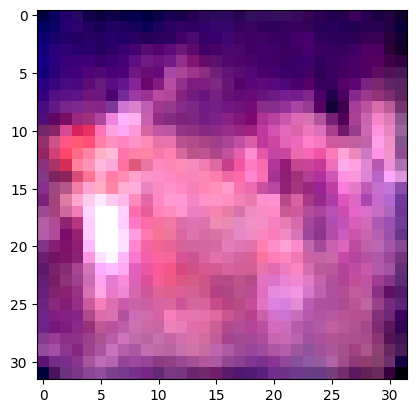


Epoch: 18 | Learning Rate: 0.0008
0.05298734828829765
0.05503411218523979
0.05530357360839844
0.05553246662020683
0.05586187541484833
0.05662461370229721
0.05253259092569351
0.05659079551696777
0.05480359122157097
0.055081259459257126
0.05431406944990158
0.05157043784856796
0.05775047093629837
0.051924657076597214
0.055776070803403854
0.05356116592884064
0.05643907189369202
0.05023838207125664
0.05374341458082199
0.05185888335108757
0.06075024604797363
0.052321698516607285
0.05946630984544754
0.062140535563230515
0.050901345908641815
0.05481667071580887
0.05327269062399864
0.06136859580874443
0.05627567693591118
0.05136118456721306
0.05644403025507927
0.054516226053237915
0.05112668126821518
0.04942506179213524
0.05748700350522995
0.05498399958014488
0.055003173649311066
0.0535782054066658
0.06023258715867996
0.05426635593175888
0.05379115790128708
0.05365186184644699
0.05990816652774811
0.053665243089199066
0.056873731315135956
0.05064356327056885
0.05153368040919304
0.05162514746189

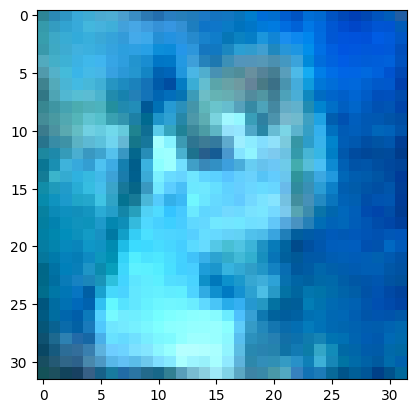


Epoch: 19 | Learning Rate: 0.0008
0.05792686343193054
0.05301908776164055
0.052083007991313934
0.057242732495069504
0.051463738083839417
0.054134443402290344
0.05653093010187149
0.05131933093070984
0.06249190494418144
0.05271591991186142
0.05841895937919617
0.05348470062017441
0.05761269852519035
0.05861694738268852
0.05546332895755768
0.05275797098875046
0.05297412723302841
0.055760692805051804
0.05008585751056671
0.05102916806936264
0.049664221704006195
0.048828523606061935
0.051609333604574203
0.05447281524538994
0.055449098348617554
0.05199029669165611
0.056641288101673126
0.05461030825972557
0.05835682153701782
0.05257372185587883
0.05667101591825485
0.054923783987760544
0.05342268571257591
0.051632534712553024
0.05819423124194145
0.05522031709551811
0.053798310458660126
0.04877586290240288
0.05430089682340622
0.052427709102630615
0.053713228553533554
0.055778857320547104
0.05242418497800827
0.053503554314374924
0.057037316262722015
0.052564822137355804
0.0564875528216362
0.05527

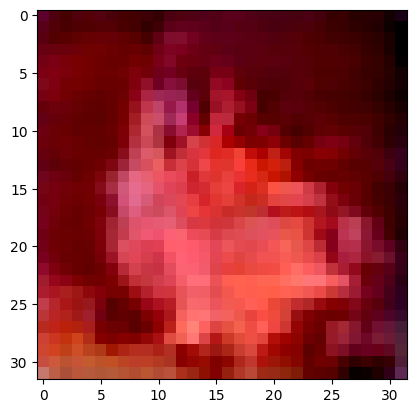


Epoch: 20 | Learning Rate: 0.0008
0.05651372671127319
0.05208837240934372
0.05375831574201584
0.05624769255518913
0.053460776805877686
0.05239131674170494
0.057219572365283966
0.05113786458969116
0.052860941737890244
0.051843833178281784
0.054739560931921005
0.05261990427970886
0.05594394728541374
0.053737178444862366
0.051915060728788376
0.048402249813079834
0.05211963504552841
0.052474528551101685
0.05578235909342766
0.05361975356936455
0.056354060769081116
0.053407713770866394
0.054418109357357025
0.05333549901843071
0.050593577325344086
0.05131399631500244
0.05434276908636093
0.05529972165822983
0.05304928123950958
0.051329657435417175
0.05301351472735405
0.05816167593002319
0.0535135492682457
0.05477168783545494
0.05816483125090599
0.052142150700092316
0.05633949488401413
0.04960941523313522
0.059044502675533295
0.049823205918073654
0.05335120111703873
0.053179606795310974
0.04971841722726822
0.05597880110144615
0.057852692902088165
0.05770784616470337
0.048956792801618576
0.0553

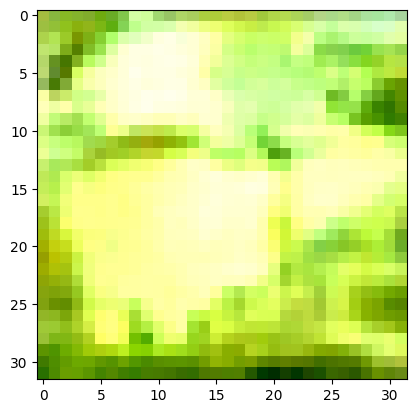


Epoch: 21 | Learning Rate: 0.00064
0.0557895228266716
0.055703870952129364
0.05398589372634888
0.0565781369805336
0.05050640553236008
0.05572681874036789
0.05380217358469963
0.05114264041185379
0.054872509092092514
0.056091129779815674
0.056018631905317307
0.05546259135007858
0.05019324645400047
0.053669288754463196
0.04836830496788025
0.05520130321383476
0.05252615734934807
0.052630215883255005
0.059636376798152924
0.052748750895261765
0.05212173983454704
0.04817496985197067
0.053422607481479645
0.05383124202489853
0.04900316521525383
0.052595268934965134
0.05345086008310318
0.05445095896720886
0.054281603544950485
0.056798022240400314
0.05415700003504753
0.05327260494232178
0.05630723387002945
0.05385679006576538
0.05416024848818779
0.0548621229827404
0.05394083261489868
0.055865079164505005
0.0526035837829113
0.05139530822634697
0.048295628279447556
0.05615586042404175
0.05974135920405388
0.05040906369686127
0.04689956456422806
0.0492171011865139
0.05681329593062401
0.0546613335609

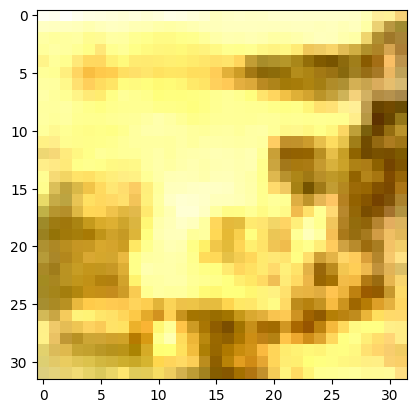


Epoch: 22 | Learning Rate: 0.00064
0.05044274777173996
0.053494226187467575
0.05613112449645996
0.05848049372434616
0.05475891754031181
0.05500365048646927
0.05064237862825394
0.05264353007078171
0.05087538808584213
0.05216975137591362
0.055653274059295654
0.06103331595659256
0.053602393716573715
0.0513736866414547
0.04670790955424309
0.05285165458917618
0.049121152609586716
0.055476121604442596
0.056954942643642426
0.053481798619031906
0.0508141927421093
0.04935958981513977
0.05827656015753746
0.05444903299212456
0.05235491693019867
0.0568208210170269
0.05410284548997879
0.052755050361156464
0.0538141094148159
0.051596835255622864
0.05405259132385254
0.0539250373840332
0.05769289657473564
0.0506879948079586
0.05679932236671448
0.058010034263134
0.05330115556716919
0.05369078367948532
0.05559314414858818
0.055945008993148804
0.051623206585645676
0.05195527523756027
0.05117235705256462
0.05013509839773178
0.049371134489774704
0.052433621138334274
0.051168978214263916
0.0561712495982646

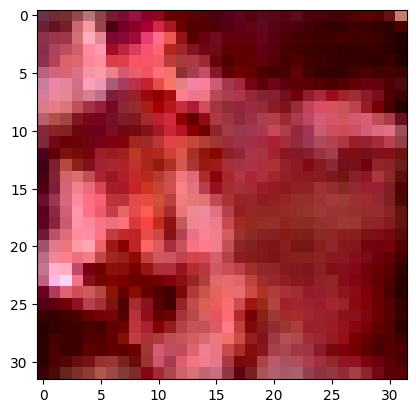


Epoch: 23 | Learning Rate: 0.00064
0.04888341948390007
0.05357877537608147
0.05128446966409683
0.054012104868888855
0.051003020256757736
0.05465632677078247
0.05168033763766289
0.05418786406517029
0.06307727098464966
0.055492859333753586
0.05283951386809349
0.05770379304885864
0.054768528789281845
0.050896745175123215
0.0492975190281868
0.05044478178024292
0.052121929824352264
0.05362185090780258
0.053822413086891174
0.05027037858963013
0.05084501951932907
0.0500810444355011
0.05390280485153198
0.05298524722456932
0.04990720376372337
0.051159005612134933
0.055299799889326096
0.05788598582148552
0.05662848800420761
0.05221670866012573
0.046247974038124084
0.053293511271476746
0.053529661148786545
0.056747689843177795
0.05548151955008507
0.05941271409392357
0.055489759892225266
0.04892983287572861
0.04969775304198265
0.052442967891693115
0.04955802485346794
0.051821812987327576
0.052267324179410934
0.05055142566561699
0.05640087649226189
0.04981037974357605
0.05022990331053734
0.0497561

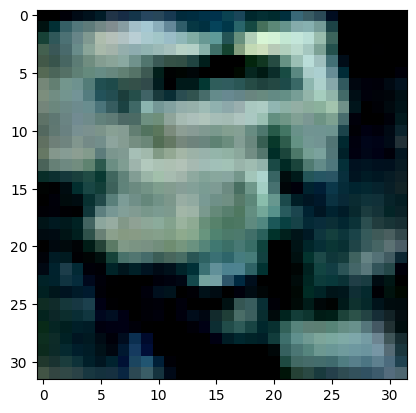


Epoch: 24 | Learning Rate: 0.00064
0.04920537769794464
0.05275098979473114
0.05382305011153221
0.04840700328350067
0.05413809046149254
0.05075935646891594
0.05487653613090515
0.05403295159339905
0.04905135557055473
0.05076165124773979
0.05291390046477318
0.05571645125746727
0.0552058145403862
0.05462031811475754
0.05335332080721855
0.05613068863749504
0.054050855338573456
0.056632544845342636
0.052774153649806976
0.05389805883169174
0.05137833207845688
0.053767263889312744
0.052240073680877686
0.05074106901884079
0.05193735286593437
0.05292310565710068
0.05072616785764694
0.05056732892990112
0.055220119655132294
0.054552655667066574
0.06005268916487694
0.05237126350402832
0.05593019723892212
0.04998984932899475
0.05497836321592331
0.05369686335325241
0.05438372492790222
0.05648227781057358
0.05504836142063141
0.054783713072538376
0.062087446451187134
0.053019195795059204
0.05247301608324051
0.05102376267313957
0.05232749506831169
0.05197311192750931
0.052322130650281906
0.048506624996

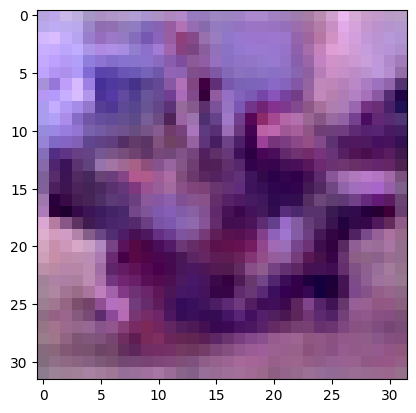


Epoch: 25 | Learning Rate: 0.00064
0.05305691063404083
0.056802645325660706
0.054028891026973724
0.05073752999305725
0.04524902626872063
0.05043482035398483
0.05262475833296776
0.055039502680301666
0.04953143000602722
0.05288699269294739
0.050886254757642746
0.052309371531009674
0.049786247313022614
0.051243167370557785
0.05091453716158867
0.051904257386922836
0.05047435685992241
0.05418805032968521
0.05236271023750305
0.0542975515127182
0.0527089461684227
0.04951449856162071
0.05049998685717583
0.05537811666727066
0.05146557092666626
0.05640359967947006
0.054956283420324326
0.05291694402694702
0.04879924654960632
0.055296313017606735
0.05212070047855377
0.05282474309206009
0.052914462983608246
0.05257037281990051
0.05486857891082764
0.05385269224643707
0.05040846765041351
0.05445355921983719
0.05334034562110901
0.0500480942428112
0.05196484923362732
0.05221502110362053
0.050411954522132874
0.050200045108795166
0.05589558929204941
0.05224546790122986
0.053100936114788055
0.05162041634

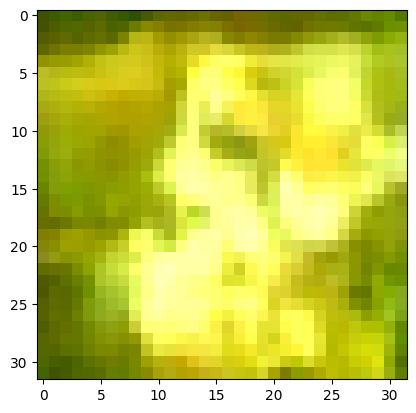


Epoch: 26 | Learning Rate: 0.00064
0.05373261123895645
0.05276428908109665
0.05573945865035057
0.05008317157626152
0.06107579916715622
0.057851456105709076
0.05640014261007309
0.05469515919685364
0.05147901177406311
0.051220960915088654
0.05264054983854294
0.053768258541822433
0.05175594985485077
0.05153306573629379
0.05060875415802002
0.051912516355514526
0.05510246381163597
0.05455370992422104
0.05254939943552017
0.054819148033857346
0.050390832126140594
0.05372076854109764
0.05260871350765228
0.050298742949962616
0.05568912625312805
0.0556318536400795
0.05384499952197075
0.04960419237613678
0.052702613174915314
0.05220882594585419
0.05300430580973625
0.04998679459095001
0.050172656774520874
0.05043891817331314
0.05455920845270157
0.05373933166265488
0.04941053315997124
0.056227266788482666
0.05300083011388779
0.052297353744506836
0.048939965665340424
0.05275331437587738
0.047894369810819626
0.04860334098339081
0.05445832014083862
0.05181792378425598
0.05677969753742218
0.0482251271

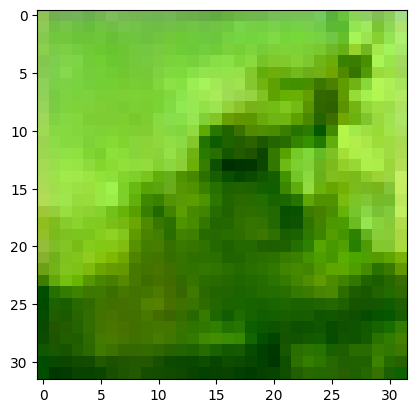


Epoch: 27 | Learning Rate: 0.00064
0.049141764640808105
0.05427950248122215
0.04768676683306694
0.051705650985240936
0.04985474795103073
0.048283666372299194
0.052972372621297836
0.04923233017325401
0.052067406475543976
0.05263570696115494
0.05074857920408249
0.052367426455020905
0.051191460341215134
0.04988608881831169
0.05499204993247986
0.051940880715847015
0.05451019108295441
0.05412152409553528
0.05436965078115463
0.04996652901172638
0.04917042702436447
0.05051484704017639
0.050292935222387314
0.0501074492931366
0.055106934159994125
0.051261644810438156
0.05561666935682297
0.05145116150379181
0.05526134371757507
0.05148249864578247
0.05164721608161926
0.05238901823759079
0.05065309256315231
0.05145600438117981
0.05013201758265495
0.049503665417432785
0.05464256927371025
0.05189772695302963
0.050468575209379196
0.05440299212932587
0.05203563719987869
0.052839525043964386
0.051295630633831024
0.053462713956832886
0.048906438052654266
0.05394318699836731
0.0528624951839447
0.0540907

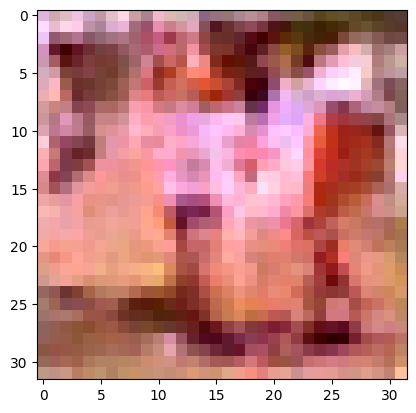


Epoch: 28 | Learning Rate: 0.00064
0.05471115559339523
0.05163171887397766
0.05219387635588646
0.05318455398082733
0.052039310336112976
0.05205174908041954
0.052018724381923676
0.04918855428695679
0.04974856600165367
0.05281336233019829
0.05111375078558922
0.050656240433454514
0.05512983351945877
0.04985781013965607
0.05867071449756622
0.050413042306900024
0.0544423833489418
0.05291852355003357
0.05236106365919113
0.05432360619306564
0.05234166979789734
0.05153701826930046
0.054586462676525116
0.04700241610407829
0.05724416300654411
0.04979082942008972
0.05594901740550995
0.049863845109939575
0.05005471035838127
0.05470959469676018
0.05746963620185852
0.04870319366455078
0.04970177635550499
0.050791896879673004
0.0520515963435173
0.05450839921832085
0.049826573580503464
0.0510917529463768
0.056777652353048325
0.05027664452791214
0.048587530851364136
0.052536070346832275
0.055231012403964996
0.049605607986450195
0.05239773914217949
0.04705722630023956
0.055794209241867065
0.05454372987

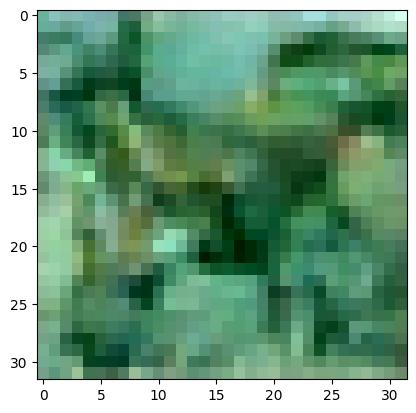


Epoch: 29 | Learning Rate: 0.00064
0.04802432656288147
0.048602521419525146
0.05524921044707298
0.05466299504041672
0.04674416035413742
0.05042284354567528
0.05355309695005417
0.05393022298812866
0.05263317748904228
0.05494317412376404
0.04962646961212158
0.054098837077617645
0.052095696330070496
0.047915928065776825
0.05458085983991623
0.05383392795920372
0.05345269292593002
0.052583109587430954
0.04784978926181793
0.04656953737139702
0.05098254606127739
0.055920474231243134
0.050807587802410126
0.05232766270637512
0.048280708491802216
0.051434941589832306
0.05497606843709946
0.04943905398249626
0.04988056421279907
0.05277382582426071
0.054980941116809845
0.054844945669174194
0.05396760627627373
0.04801180213689804
0.04975293204188347
0.05041079223155975
0.05243273824453354
0.05214415118098259
0.05444551259279251
0.05017688497900963
0.052890580147504807
0.04953312873840332
0.051114343106746674
0.05173360928893089
0.05606372281908989
0.05581645295023918
0.056337546557188034
0.05481189

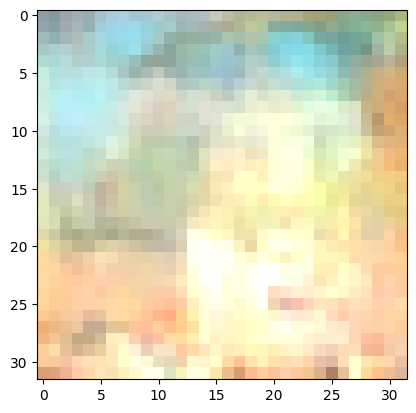


Epoch: 30 | Learning Rate: 0.00064
0.05795479938387871
0.05148942396044731
0.052757393568754196
0.0480404794216156
0.04998258501291275
0.0511915385723114
0.04917886108160019
0.05283674597740173
0.0496821328997612
0.04972304031252861
0.052551575005054474
0.05345989763736725
0.04932093620300293
0.05157722160220146
0.05858154594898224
0.05159638449549675
0.051658064126968384
0.04886165261268616
0.051263876259326935
0.04632061719894409
0.05449680984020233
0.04865001142024994
0.056559957563877106
0.055932894349098206
0.05367405712604523
0.05393849313259125
0.05482464283704758
0.052050136029720306
0.05144181847572327
0.052990108728408813
0.05531737208366394
0.05072491616010666
0.0487387590110302
0.04814931005239487
0.04953239858150482
0.058404698967933655
0.04839057847857475
0.053186558187007904
0.05082034319639206
0.05257953330874443
0.050116490572690964
0.05107799917459488
0.05033264681696892
0.05014025419950485
0.04962032288312912
0.05099407956004143
0.05376353859901428
0.052588991820812

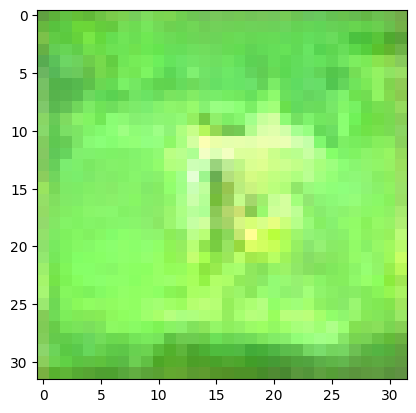


Epoch: 31 | Learning Rate: 0.0005120000000000001
0.04776199907064438
0.05494723469018936
0.050458893179893494
0.05246191844344139
0.04709159955382347
0.050671324133872986
0.052657824009656906
0.05000944435596466
0.050680696964263916
0.05463455244898796
0.050266724079847336
0.051936935633420944
0.04937991499900818
0.04967905208468437
0.05098697543144226
0.04715404659509659
0.04628463834524155
0.05213060975074768
0.05107363313436508
0.04999729245901108
0.0551784448325634
0.04859700798988342
0.05279676616191864
0.051197491586208344
0.05311362445354462
0.048290856182575226
0.05190706253051758
0.05128111690282822
0.05344338342547417
0.04926842451095581
0.056096553802490234
0.05263034999370575
0.05011723190546036
0.04562947154045105
0.05348352715373039
0.05266464874148369
0.056912582367658615
0.04994003474712372
0.051284849643707275
0.051764946430921555
0.046719904989004135
0.049753330647945404
0.04977851361036301
0.053343504667282104
0.05599784106016159
0.051307957619428635
0.0533251725137

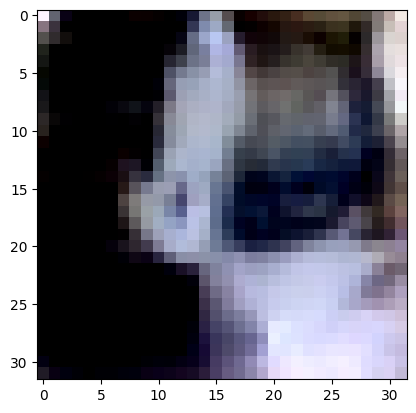


Epoch: 32 | Learning Rate: 0.0005120000000000001
0.05048660561442375
0.0501011423766613
0.05036807060241699
0.0496034249663353
0.044914644211530685
0.05133317410945892
0.054920583963394165
0.05147077888250351
0.05121853947639465
0.04990982264280319
0.048706572502851486
0.05338549613952637
0.04924049973487854
0.0472501739859581
0.05244266986846924
0.05262983962893486
0.05040886998176575
0.049636732786893845
0.05232841894030571
0.052749790251255035
0.05135948583483696
0.05032535642385483
0.05510195717215538
0.049708954989910126
0.04388131946325302
0.045778580009937286
0.049733858555555344
0.054452672600746155
0.05195705592632294
0.05953007936477661
0.04775450751185417
0.05156536027789116
0.05672740936279297
0.05108719319105148
0.04922495037317276
0.05314668267965317
0.050641175359487534
0.05604067072272301
0.049707502126693726
0.05512705445289612
0.05398821830749512
0.05050968378782272
0.05019471049308777
0.05140155181288719
0.05003438889980316
0.05709099769592285
0.049505531787872314
0

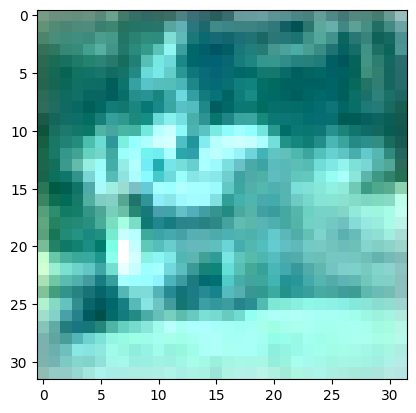


Epoch: 33 | Learning Rate: 0.0005120000000000001
0.05082287639379501
0.048507630825042725
0.053145136684179306
0.052520301192998886
0.049957506358623505
0.0524846576154232
0.053804971277713776
0.050809916108846664
0.05328558385372162
0.04763668030500412
0.04905209690332413
0.05040404200553894
0.053328052163124084
0.04858551546931267
0.05478794500231743
0.052065201103687286
0.04811849445104599
0.05240732431411743
0.051956236362457275
0.04649357125163078
0.05633801221847534
0.05072323977947235
0.051525332033634186
0.0553869865834713
0.056491073220968246
0.05235119163990021
0.048208095133304596
0.05197352170944214
0.04770129919052124
0.05131532996892929
0.05426785349845886
0.04737276956439018
0.055498652160167694
0.05530805513262749
0.05085223168134689
0.05198346823453903
0.053617365658283234
0.05207313597202301
0.05032859370112419
0.05119268223643303
0.053522005677223206
0.0548124760389328
0.04750284180045128
0.05124055966734886
0.04912033677101135
0.04893453046679497
0.0512074679136276

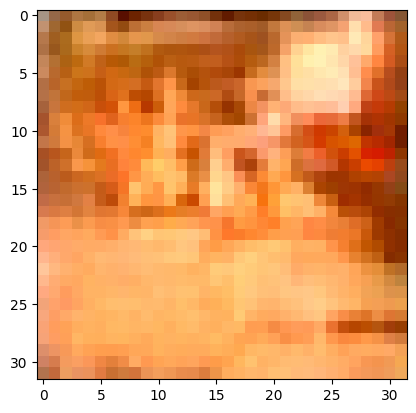


Epoch: 34 | Learning Rate: 0.0005120000000000001
0.05387584865093231
0.05530823394656181
0.05364270135760307
0.050010066479444504
0.05577624961733818
0.054077278822660446
0.05050507187843323
0.05335986614227295
0.0544532835483551
0.05062847584486008
0.04942276328802109
0.04986545443534851
0.04794425517320633
0.048376597464084625
0.049571555107831955
0.054075419902801514
0.05421994626522064
0.04532274603843689
0.0541716031730175
0.05252751708030701
0.05007212981581688
0.05007899925112724
0.0586223267018795
0.055181168019771576
0.04881633073091507
0.05581580847501755
0.0472472608089447
0.05146760866045952
0.05153490602970123
0.04865136742591858
0.04920034855604172
0.04985088109970093
0.04672791808843613
0.0538339726626873
0.050273410975933075
0.05232702195644379
0.047893088310956955
0.051820456981658936
0.05341767519712448
0.05265471339225769
0.050895482301712036
0.055661361664533615
0.053470954298973083
0.053926050662994385
0.046956103295087814
0.05163261294364929
0.05473179742693901
0

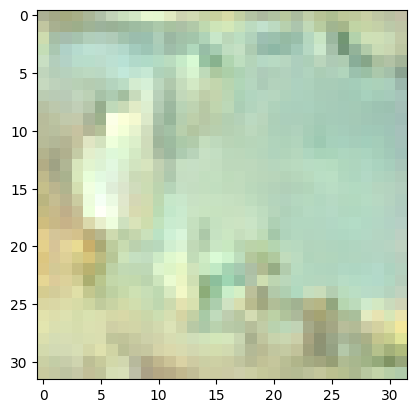


Epoch: 35 | Learning Rate: 0.0005120000000000001
0.05395899713039398
0.04987182840704918
0.049391746520996094
0.05080045387148857
0.047892093658447266
0.05434044450521469
0.04823913797736168
0.05173581466078758
0.049560170620679855
0.047434236854314804
0.04821672663092613
0.04870382696390152
0.04925830662250519
0.04774443432688713
0.052344463765621185
0.0451623871922493
0.049712151288986206
0.04616386815905571
0.05409158393740654
0.05110956355929375
0.04845777899026871
0.05271180719137192
0.048632290214300156
0.0571771040558815
0.05460837483406067
0.05448087304830551
0.053643353283405304
0.04932907223701477
0.04609297960996628
0.05413397401571274
0.052491914480924606
0.04738118499517441
0.05098568648099899
0.04868483543395996
0.050673119723796844
0.05125967413187027
0.052710678428411484
0.050899505615234375
0.04742303490638733
0.04807206988334656
0.048342522233724594
0.051898956298828125
0.051847949624061584
0.0536600761115551
0.050579290837049484
0.05543826147913933
0.053305879235267

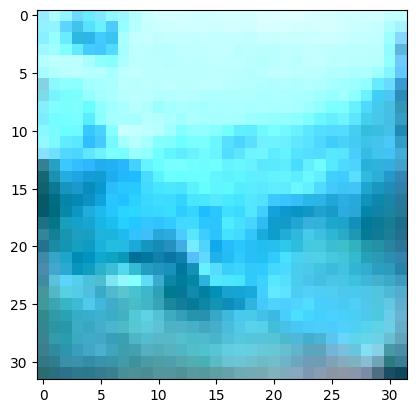


Epoch: 36 | Learning Rate: 0.0005120000000000001
0.05175728350877762
0.04995555803179741
0.05207107216119766
0.052444539964199066
0.05160783976316452
0.05331005901098251
0.0487111434340477
0.046649269759655
0.054796040058135986
0.05172903090715408
0.054245781153440475
0.050942979753017426
0.052963417023420334
0.05049608275294304
0.05404305458068848
0.052108339965343475
0.0503687784075737
0.052341483533382416
0.04787207394838333
0.05116602033376694
0.05015244334936142
0.056166600435972214
0.05084503814578056
0.05139574408531189
0.04650985822081566
0.04937859997153282
0.05068589746952057
0.051524072885513306
0.05096801370382309
0.05462164804339409
0.052329253405332565
0.051616325974464417
0.04908732697367668
0.05046578496694565
0.05636807531118393
0.047774624079465866
0.04652431607246399
0.04850349947810173
0.057691555470228195
0.05146602913737297
0.04614534229040146
0.047405507415533066
0.0517762266099453
0.05160053074359894
0.04759427160024643
0.051236592233181
0.0544658824801445
0.05

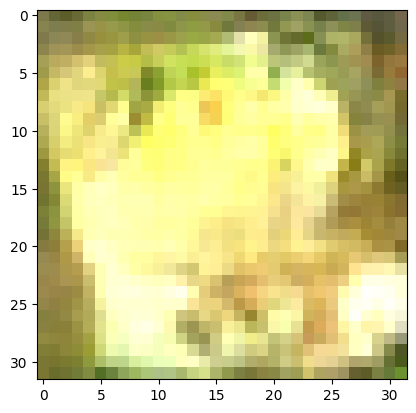


Epoch: 37 | Learning Rate: 0.0005120000000000001
0.04957705736160278
0.05319076031446457
0.05386236310005188
0.05159344524145126
0.057141877710819244
0.05780290812253952
0.04619499295949936
0.05145624279975891
0.04979875311255455
0.0517045259475708
0.048782240599393845
0.052771687507629395
0.05012377351522446
0.047635532915592194
0.0513705313205719
0.04913420230150223
0.051930658519268036
0.05218866467475891
0.048923373222351074
0.05357242375612259
0.05402709171175957
0.04879289120435715
0.04808719456195831
0.052733778953552246
0.04851790517568588
0.05049152299761772
0.04926426708698273
0.05326176434755325
0.0498795211315155
0.05119652673602104
0.05840554088354111
0.05379234999418259
0.051487378776073456
0.05088400840759277
0.0541120283305645
0.047999754548072815
0.049473654478788376
0.046425577253103256
0.05284563824534416
0.046680748462677
0.05508320778608322
0.0586991123855114
0.04926680773496628
0.0470740869641304
0.05715044587850571
0.05414217710494995
0.04958581179380417
0.05082

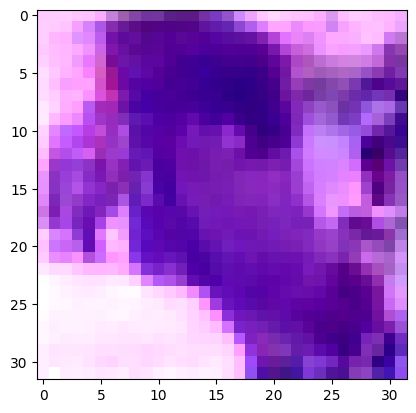


Epoch: 38 | Learning Rate: 0.0005120000000000001
0.05392991006374359
0.04837752506136894
0.05094345659017563
0.0490834079682827
0.05371786653995514
0.05009324103593826
0.05640720576047897
0.04952754080295563
0.052350953221321106
0.05270904302597046
0.05364052578806877
0.047499414533376694
0.04608079418540001
0.0507393553853035
0.05253322049975395
0.05378755182027817
0.054746221750974655
0.051711730659008026
0.054366253316402435
0.04553662985563278
0.04668844863772392
0.050546400249004364
0.049537017941474915
0.0540521964430809
0.05053780600428581
0.05182341858744621
0.05219646543264389
0.05254083871841431
0.047875385731458664
0.05384007841348648
0.05000071972608566
0.04701239988207817
0.05176426097750664
0.05640013515949249
0.0507180392742157
0.05418291687965393
0.04602249711751938
0.05264218896627426
0.048006750643253326
0.04925528168678284
0.05418074131011963
0.05099552869796753
0.05514339730143547
0.0484234020113945
0.04931565374135971
0.047465838491916656
0.051033876836299896
0.05

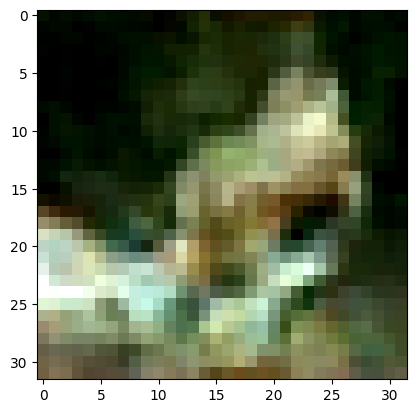


Epoch: 39 | Learning Rate: 0.0005120000000000001
0.052175261080265045
0.05178504437208176
0.055940382182598114
0.050857238471508026
0.05417636036872864
0.05123306065797806
0.04623859375715256
0.050287388265132904
0.05318475887179375
0.05056629329919815
0.04854303598403931
0.050516631454229355
0.05404224246740341
0.05644414946436882
0.05415680631995201
0.04787494242191315
0.052825670689344406
0.04975130409002304
0.048377614468336105
0.05928947776556015
0.05223818123340607
0.052505359053611755
0.04836106300354004
0.04911309480667114
0.052898358553647995
0.04861222207546234
0.04894551262259483
0.05116243287920952
0.0486309677362442
0.04645621031522751
0.047268595546483994
0.049812041223049164
0.046229906380176544
0.05111103504896164
0.05143999680876732
0.05158434808254242
0.04848640412092209
0.04847567528486252
0.0547003448009491
0.052282463759183884
0.049771349877119064
0.04832290858030319
0.04972017556428909
0.051348596811294556
0.05286543071269989
0.04624716565012932
0.046733628958463

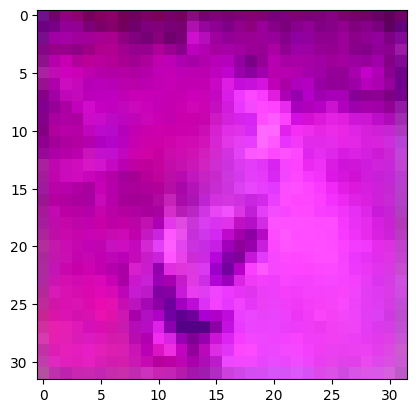


Epoch: 40 | Learning Rate: 0.0005120000000000001
0.04624123498797417
0.05249267816543579
0.05282163619995117
0.04810777306556702
0.050510063767433167
0.05191619694232941
0.0499144122004509
0.05329976975917816
0.05392688512802124
0.05304621905088425
0.04993559047579765
0.046939026564359665
0.05123106762766838
0.051047563552856445
0.04849008843302727
0.05119948089122772
0.05334670841693878
0.05121505260467529
0.04928316920995712
0.04907473921775818
0.0499323308467865
0.04814412444829941
0.051566921174526215
0.051431696861982346
0.04961797595024109
0.05556086450815201
0.052044402807950974
0.04785143584012985
0.0484926700592041
0.05001547932624817
0.04648398980498314
0.05660734698176384
0.05085867643356323
0.04920549318194389
0.051001012325286865
0.049290746450424194
0.05673549324274063
0.04950080066919327
0.04634818062186241
0.04777226969599724
0.05058318376541138
0.0481928288936615
0.05115187168121338
0.049655839800834656
0.047068607062101364
0.053788404911756516
0.04982241615653038
0.0

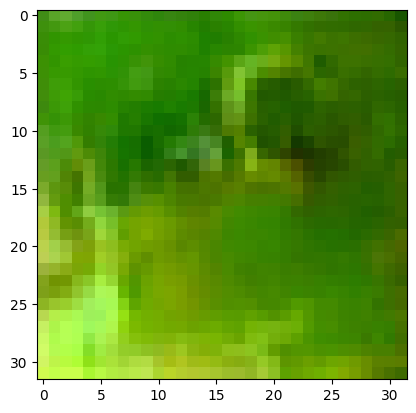


Epoch: 41 | Learning Rate: 0.0004096000000000001
0.05234454199671745
0.05530866980552673
0.054296474903821945
0.05303269624710083
0.05391676723957062
0.04622028395533562
0.04611819237470627
0.05007852241396904
0.05179081857204437
0.05387410521507263
0.05428251251578331
0.04768543690443039
0.05584912747144699
0.049609001725912094
0.05153068155050278
0.048094719648361206
0.051936015486717224
0.05196544528007507
0.05117499828338623
0.046882014721632004
0.04687713086605072
0.05453662574291229
0.05230715125799179
0.04534236714243889
0.0519656240940094
0.051298052072525024
0.052457116544246674
0.04964589700102806
0.047737281769514084
0.04964248463511467
0.05187377333641052
0.050653330981731415
0.0497797429561615
0.044769152998924255
0.05225284397602081
0.0483662486076355
0.04998428747057915
0.054654043167829514
0.05375252291560173
0.04842744395136833
0.05061698704957962
0.051875561475753784
0.0520971342921257
0.05260038375854492
0.04813213273882866
0.049774181097745895
0.05122406408190727
0

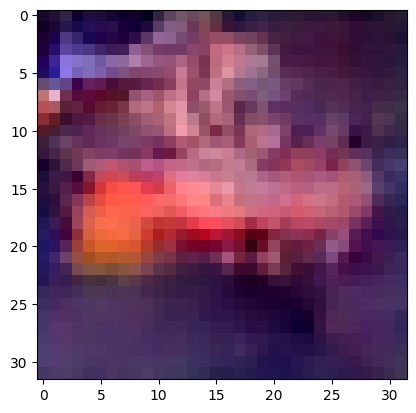


Epoch: 42 | Learning Rate: 0.0004096000000000001
0.051177531480789185
0.05345412716269493
0.04875153303146362
0.054783791303634644
0.05152958631515503
0.0524853840470314
0.052211105823516846
0.04841397702693939
0.05465288087725639
0.049820952117443085
0.0502890944480896
0.05329151079058647
0.054269831627607346
0.04964151605963707
0.04769165441393852
0.05159468576312065
0.04997564107179642
0.05131047964096069
0.046838175505399704
0.05641171336174011
0.0516263023018837
0.054281167685985565
0.05130752548575401
0.04572338983416557
0.04923431575298309
0.049073394387960434
0.05054982751607895
0.055309221148490906
0.05202695354819298
0.05290699005126953
0.052266620099544525
0.051472388207912445
0.05047858878970146
0.05085835978388786
0.05097449943423271
0.04899001121520996
0.04375769942998886
0.047442477196455
0.05907738208770752
0.0543135330080986
0.053742311894893646
0.05092499405145645
0.05060619115829468
0.04909175634384155
0.046857550740242004
0.05138806626200676
0.057796791195869446
0.

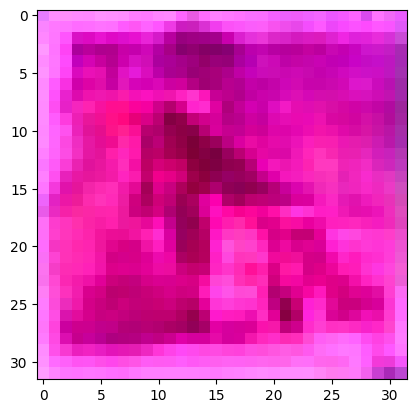


Epoch: 43 | Learning Rate: 0.0004096000000000001
0.050919514149427414
0.052144717425107956
0.04467283934354782
0.04896880313754082
0.051879506558179855
0.05202432721853256
0.05140719935297966
0.05445384234189987
0.05204388499259949
0.05421880632638931
0.05031739920377731
0.05441154167056084
0.05584368854761124
0.048540882766246796
0.051317136734724045
0.05073538422584534
0.043899085372686386
0.051319628953933716
0.04807676374912262
0.0531354695558548
0.0501457154750824
0.047220371663570404
0.05244677513837814
0.0557231530547142
0.04935283586382866
0.047518566250801086
0.050070181488990784
0.049088962376117706
0.04973772168159485
0.04681067913770676
0.04749523848295212
0.05630457401275635
0.048038236796855927
0.049051910638809204
0.04896288365125656
0.05148813873529434
0.050451379269361496
0.05211658030748367
0.05072736740112305
0.04987800121307373
0.05323509871959686
0.05059689283370972
0.0533016137778759
0.04643614590167999
0.057235561311244965
0.0482591912150383
0.050894346088171005

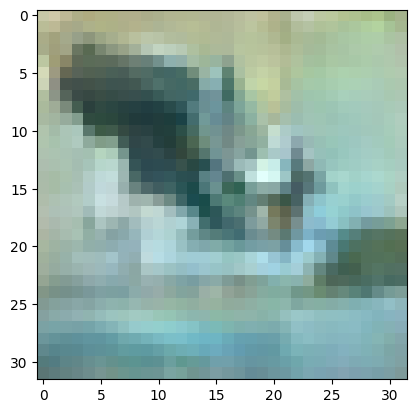


Epoch: 44 | Learning Rate: 0.0004096000000000001
0.04840605705976486
0.050791360437870026
0.04633515328168869
0.04769867658615112
0.05374526232481003
0.05018676817417145
0.04815356060862541
0.05409916862845421
0.0523819737136364
0.04675393924117088
0.0510559007525444
0.048767101019620895
0.05268717557191849
0.04913453385233879
0.050851207226514816
0.04979127645492554
0.04953794926404953
0.04507088661193848
0.04658547788858414
0.05247189849615097
0.05146196112036705
0.05150579661130905
0.046974699944257736
0.04557373747229576
0.047402918338775635
0.04853544384241104
0.05333617329597473
0.05017818510532379
0.04761510342359543
0.04800298437476158
0.049942657351493835
0.046598419547080994
0.046629518270492554
0.05316290259361267
0.0501592718064785
0.04595109075307846
0.04720260947942734
0.050930675119161606
0.04906010627746582
0.04969048500061035
0.04962725192308426
0.04763215407729149
0.049519818276166916
0.04640282690525055
0.05212212726473808
0.04698026180267334
0.05032305046916008
0.0

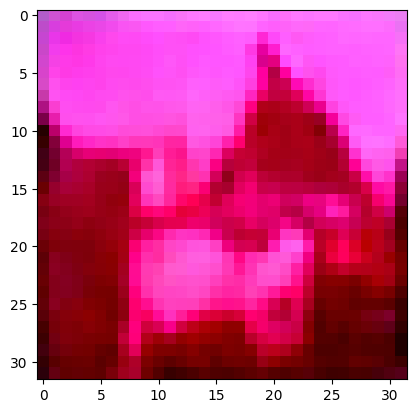


Epoch: 45 | Learning Rate: 0.0004096000000000001
0.04638314247131348
0.04788351058959961
0.05048725754022598
0.04775159806013107
0.046726927161216736
0.0487777441740036
0.051457833498716354
0.05522722005844116
0.042270541191101074
0.0499495193362236
0.05044811591506004
0.0543321818113327
0.051174961030483246
0.04711001738905907
0.05048402398824692
0.046676941215991974
0.05097351595759392
0.0539461225271225
0.05253108590841293
0.04779314249753952
0.049000125378370285
0.05072835087776184
0.04623189568519592
0.04988598823547363
0.05258379876613617
0.05097898840904236
0.05131576955318451
0.05155355855822563
0.04564347863197327
0.05411806330084801
0.05210912227630615
0.04600666090846062
0.05078874155879021
0.051972053945064545
0.052836623042821884
0.05365411564707756
0.05320882424712181
0.05261209234595299
0.046024128794670105
0.048949144780635834
0.04908844083547592
0.050079673528671265
0.04740893468260765
0.05090954527258873
0.049205780029296875
0.047860823571681976
0.046328794211149216


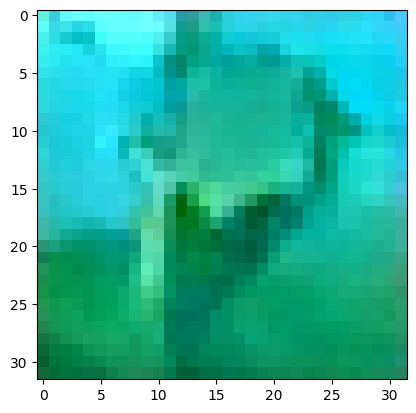


Epoch: 46 | Learning Rate: 0.0004096000000000001
0.04633873328566551
0.047616537660360336
0.044926803559064865
0.055187396705150604
0.051249872893095016
0.05085276812314987
0.04601931571960449
0.051171787083148956
0.05082559585571289
0.0524701327085495
0.05101008713245392
0.054326992481946945
0.04653913900256157
0.04863846302032471
0.04422331973910332
0.0524650476872921
0.04785429686307907
0.05044778436422348
0.05300747603178024
0.05114683508872986
0.04954857751727104
0.052594684064388275
0.04932743310928345
0.052902355790138245
0.050473522394895554
0.04625948518514633
0.051062535494565964
0.04576729238033295
0.05188794061541557
0.05045470595359802
0.0470426082611084
0.04578858241438866
0.04902471601963043
0.04733314365148544
0.048866622149944305
0.05138880014419556
0.04773848503828049
0.05537975952029228
0.04808363318443298
0.05263588950037956
0.05399321764707565
0.05214140564203262
0.047541629523038864
0.046897437423467636
0.053419288247823715
0.047444429248571396
0.0456378459930419

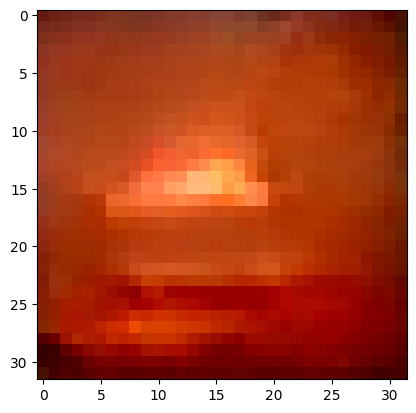


Epoch: 47 | Learning Rate: 0.0004096000000000001
0.04960515350103378
0.04956207424402237
0.049441032111644745
0.05358574911952019
0.05061572790145874
0.05234242603182793
0.04929087683558464
0.05215796083211899
0.05146237462759018
0.054743826389312744
0.05163741856813431
0.05522245168685913
0.04604823514819145
0.05233749374747276
0.05513399839401245
0.052307724952697754
0.05014611780643463
0.05123550444841385
0.05012611672282219
0.04729213938117027
0.050077855587005615
0.04668351635336876
0.04901761934161186
0.05149015039205551
0.050906985998153687
0.0500740110874176
0.054880283772945404
0.05457737296819687
0.051402222365140915
0.04570963978767395
0.05159715563058853
0.047543566673994064
0.05249064415693283
0.052077099680900574
0.04821969196200371
0.048269398510456085
0.043706558644771576
0.05031594634056091
0.04628681391477585
0.0479462705552578
0.05246267840266228
0.04923615604639053
0.0535416416823864
0.04824794456362724
0.050323039293289185
0.0509340763092041
0.04854918643832207
0.

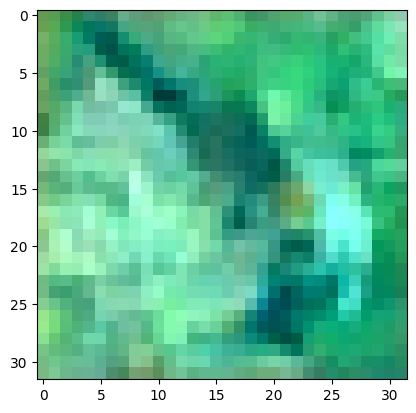


Epoch: 48 | Learning Rate: 0.0004096000000000001
0.05276840180158615
0.04740483686327934
0.049577903002500534
0.04735777527093887
0.05016651004552841
0.048348814249038696
0.044476695358753204
0.045329105108976364
0.05565181002020836
0.04978586360812187
0.05206994339823723
0.049933891743421555
0.04967517778277397
0.05336667224764824
0.04826221615076065
0.049147844314575195
0.04665980488061905
0.054492440074682236
0.0517658069729805
0.05665242671966553
0.05006447434425354
0.048011042177677155
0.052053287625312805
0.05076727271080017
0.05295991152524948
0.050095926970243454
0.05142299458384514
0.0493229404091835
0.05040232837200165
0.05468592047691345
0.04795565456151962
0.05042165517807007
0.05241643637418747
0.05394916236400604
0.051477544009685516
0.050444647669792175
0.0507231131196022
0.05061439424753189
0.05149911344051361
0.04970166087150574
0.04786007106304169
0.05178798735141754
0.051504313945770264
0.05336136743426323
0.0462624691426754
0.04797636717557907
0.050875674933195114


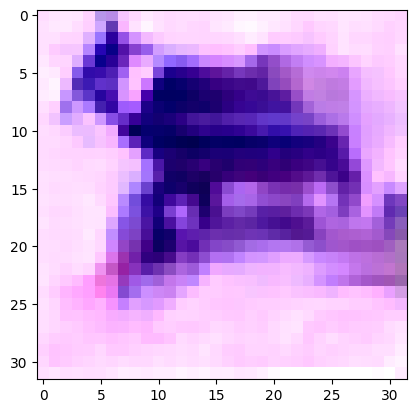


Epoch: 49 | Learning Rate: 0.0004096000000000001
0.04850689321756363
0.04572577401995659
0.04989267513155937
0.048574477434158325
0.049837660044431686
0.049360960721969604
0.04687462002038956
0.05738426372408867
0.050265997648239136
0.04822331666946411
0.04995228350162506
0.05212830752134323
0.051651984453201294
0.050820931792259216
0.05237194895744324
0.050312574952840805
0.053906675428152084
0.05284623056650162
0.05192463845014572
0.050429970026016235
0.048433080315589905
0.053653817623853683
0.051539987325668335
0.047883566468954086
0.049024250358343124
0.053480736911296844
0.05022048205137253
0.050452958792448044
0.04990118741989136
0.04942275211215019
0.05233035609126091
0.05133259296417236
0.05350261181592941
0.046523451805114746
0.0470164529979229
0.04977225512266159
0.048088010400533676
0.05079946666955948
0.053966790437698364
0.04876556992530823
0.054037392139434814
0.048849355429410934
0.04862227290868759
0.05155666917562485
0.04849661514163017
0.049580179154872894
0.0524559

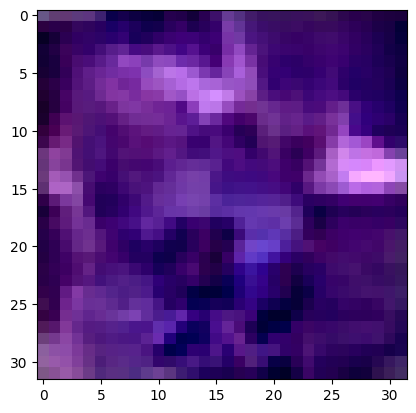


Epoch: 50 | Learning Rate: 0.0004096000000000001
0.04738087207078934
0.04921261593699455
0.04962969943881035
0.051995180547237396
0.053152453154325485
0.049919646233320236
0.053426843136548996
0.05187925323843956
0.04910625144839287
0.04760822281241417
0.05077357217669487
0.05040159821510315
0.047878362238407135
0.047933004796504974
0.04966985806822777
0.049051325768232346
0.04709005355834961
0.05166565626859665
0.04955040663480759
0.05295819044113159
0.0531257800757885
0.05071517080068588
0.04719213768839836
0.04665709659457207
0.05375747010111809
0.04610810801386833
0.05234222859144211
0.051034167408943176
0.04983379691839218
0.04865116998553276
0.0503682941198349
0.048026081174612045
0.051403164863586426
0.04866280406713486
0.05197135731577873
0.048711590468883514
0.05161719769239426
0.049490343779325485
0.04672759771347046
0.04522913321852684
0.05494328588247299
0.048631083220243454
0.04782401770353317
0.04862821102142334
0.053240977227687836
0.05036082863807678
0.0543320551514625

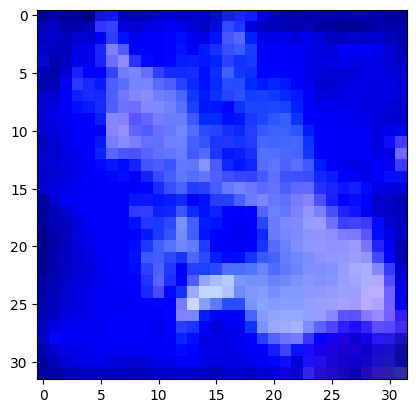


Epoch: 51 | Learning Rate: 0.0003276800000000001
0.049825482070446014
0.04635229334235191
0.05500056594610214
0.04751592501997948
0.05064428597688675
0.05048361048102379
0.049082860350608826
0.04902529716491699
0.04647224396467209
0.049032654613256454
0.05106017738580704
0.04609322175383568
0.04993673413991928
0.056690700352191925
0.04848679155111313
0.05264119803905487
0.049146365374326706
0.05170735716819763
0.04863449186086655
0.050509676337242126
0.04981846734881401
0.04777566343545914
0.0480382964015007
0.04916710779070854
0.049049556255340576
0.05265668034553528
0.04825051128864288
0.05164450407028198
0.04723880812525749
0.04740813001990318
0.04953942820429802
0.05485955625772476
0.04758026450872421
0.0492437444627285
0.049168460071086884
0.04914429783821106
0.05000537633895874
0.04592258855700493
0.05124199390411377
0.05098830163478851
0.045756995677948
0.04718349501490593
0.050246089696884155
0.049750231206417084
0.04946541786193848
0.05033265799283981
0.04967900365591049
0.04

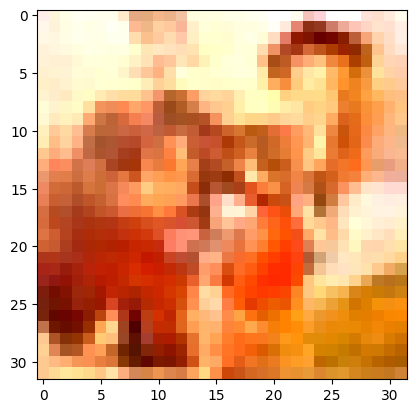


Epoch: 52 | Learning Rate: 0.0003276800000000001
0.046113669872283936
0.04476497322320938
0.04697950929403305
0.053346775472164154
0.054558172821998596
0.05012422055006027
0.0466572567820549
0.050870608538389206
0.05064380168914795
0.04929611086845398
0.05190048739314079
0.05074147507548332
0.051137298345565796
0.04808157682418823
0.05074874684214592
0.05078793317079544
0.047509998083114624
0.0482383668422699
0.04998178035020828
0.050049446523189545
0.04884188622236252
0.054553620517253876
0.055604200810194016
0.04915064200758934
0.04939904063940048
0.048087865114212036
0.04750354215502739
0.052073847502470016
0.04410361498594284
0.05027134343981743
0.052893854677677155
0.05086926743388176
0.04877268522977829
0.045375894755125046
0.050453707575798035
0.05349002406001091
0.04700147360563278
0.04993532598018646
0.047358863055706024
0.049025148153305054
0.050475429743528366
0.0497099868953228
0.04959428310394287
0.049639638513326645
0.04959707707166672
0.05323892831802368
0.0509065166115

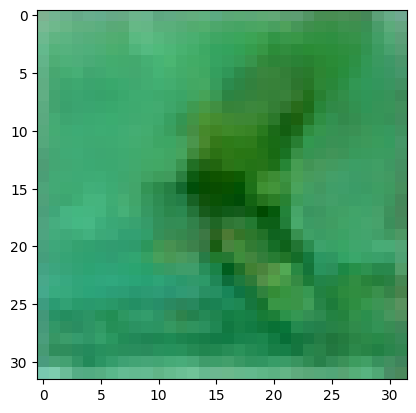


Epoch: 53 | Learning Rate: 0.0003276800000000001
0.05441470071673393
0.05388301610946655
0.04488825052976608
0.047738563269376755
0.04959535226225853
0.05269894003868103
0.05385832116007805
0.05009036511182785
0.05444308742880821
0.047736018896102905
0.04790481552481651
0.04968176782131195
0.054201096296310425
0.04912438243627548
0.048322856426239014
0.051251523196697235
0.0482177659869194
0.04905373975634575
0.04710438847541809
0.05207541212439537
0.04749535769224167
0.04884614795446396
0.04940006136894226
0.05223334580659866
0.04876486584544182
0.04712250083684921
0.050056539475917816
0.04867129027843475
0.048525433987379074
0.048915229737758636
0.05284465104341507
0.054003726691007614
0.05262412130832672
0.0502752959728241
0.050065815448760986
0.05202382430434227
0.04945328086614609
0.046108853071928024
0.04710569605231285
0.05283188819885254
0.05188742280006409
0.04892060160636902
0.04773355647921562
0.050493013113737106
0.05110127851366997
0.04892861843109131
0.04673971235752106


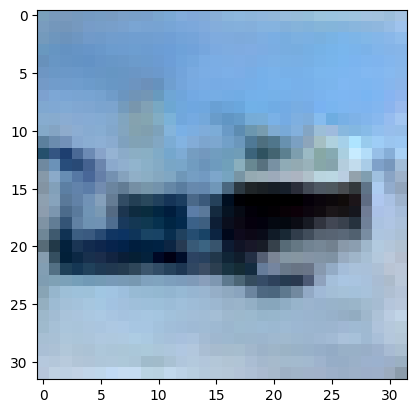


Epoch: 54 | Learning Rate: 0.0003276800000000001
0.05012747645378113
0.04833666607737541
0.04916659742593765
0.05511106178164482
0.05070504546165466
0.05285312980413437
0.045663680881261826
0.0477769672870636
0.053833216428756714
0.051507752388715744
0.04817919060587883
0.049794744700193405
0.047782789915800095
0.046602800488471985
0.052427589893341064
0.05520939454436302
0.05308821052312851
0.053325485438108444
0.04636320099234581
0.047287166118621826
0.054856181144714355
0.04855141043663025
0.048995018005371094
0.050169192254543304
0.05321983993053436
0.046246401965618134
0.05080327391624451
0.052207496017217636
0.04995529353618622
0.05083915591239929
0.050644271075725555
0.05211023613810539
0.04661332070827484
0.056780632585287094
0.05478744953870773
0.048577141016721725
0.044810377061367035
0.05060533806681633
0.04877420514822006
0.04672008007764816
0.04778974503278732
0.050666194409132004
0.05582109093666077
0.050684042274951935
0.05075885355472565
0.0554724857211113
0.0475393310

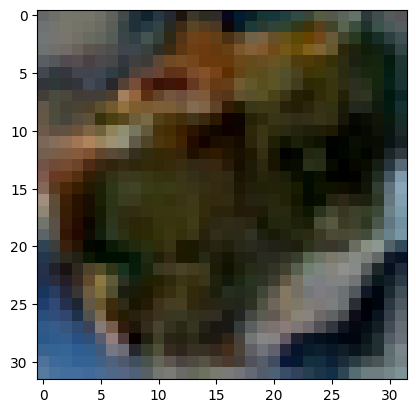


Epoch: 55 | Learning Rate: 0.0003276800000000001
0.05173938721418381
0.051843903958797455
0.049042485654354095
0.04285602271556854
0.052124034613370895
0.05391707271337509
0.052202850580215454
0.04943433031439781
0.046073637902736664
0.048965953290462494
0.05311862751841545
0.05670308694243431
0.053649794310331345
0.05385084077715874
0.053142987191677094
0.05457856506109238
0.048629969358444214
0.050188496708869934
0.05033127963542938
0.05312656983733177
0.046870436519384384
0.043578337877988815
0.0526823028922081
0.04734275862574577
0.05042297765612602
0.05361586809158325
0.05426326394081116
0.049101244658231735
0.050614386796951294
0.054636090993881226
0.05066881701350212
0.050399765372276306
0.050047606229782104
0.052815742790699005
0.051147639751434326
0.05061066150665283
0.04882686585187912
0.04571390897035599
0.0526404045522213
0.049238741397857666
0.04792898893356323
0.053774695843458176
0.04979495331645012
0.04512028023600578
0.05063462257385254
0.04944903776049614
0.051166266

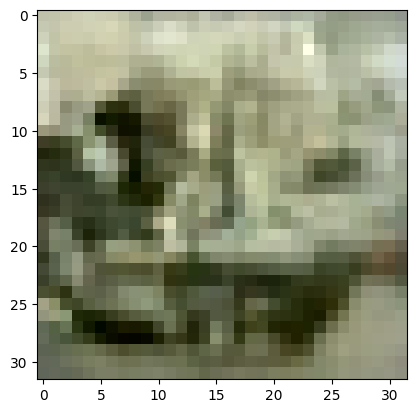


Epoch: 56 | Learning Rate: 0.0003276800000000001
0.04415548965334892
0.048331767320632935
0.05128517746925354
0.04773833602666855
0.049522943794727325
0.04456878826022148
0.04840770363807678
0.04817106947302818
0.052931465208530426
0.047877829521894455
0.052312251180410385
0.05038449913263321
0.0466146245598793
0.04817431420087814
0.04721682518720627
0.047739606350660324
0.05008923262357712
0.048195015639066696
0.05082549899816513
0.0524531714618206
0.052207376807928085
0.044410865753889084
0.04843452200293541
0.04685819149017334
0.05038127303123474
0.0483241081237793
0.04964509233832359
0.049888722598552704
0.04704566299915314
0.048366136848926544
0.056695275008678436
0.04802831634879112
0.050037629902362823
0.04873482510447502
0.05177755281329155
0.052286069840192795
0.05076442286372185
0.050764068961143494
0.05354967713356018
0.04855812340974808
0.05214942991733551
0.04940056428313255
0.04733717441558838
0.05235346406698227
0.049659889191389084
0.049904000014066696
0.05028884112834

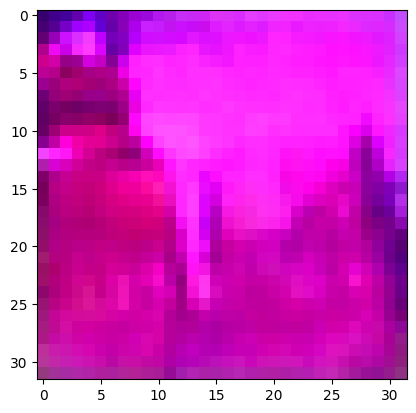


Epoch: 57 | Learning Rate: 0.0003276800000000001
0.04552917927503586
0.04909508675336838
0.04453575611114502
0.048674702644348145
0.05015860125422478
0.053079813718795776
0.04658961296081543
0.04735119268298149
0.05060211941599846
0.04985889047384262
0.04688435047864914
0.050190918147563934
0.05215401574969292
0.048691704869270325
0.050101011991500854
0.04489290341734886
0.04914143308997154
0.04618556424975395
0.04845685884356499
0.05073179304599762
0.0503876619040966
0.051950566470623016
0.05022420734167099
0.0530165359377861
0.05116325244307518
0.05164554715156555
0.051017142832279205
0.04359512776136398
0.05085037648677826
0.051881998777389526
0.04834648594260216
0.048880837857723236
0.04495867341756821
0.0476393923163414
0.04920453950762749
0.05097705125808716
0.050264667719602585
0.05129241198301315
0.05149666592478752
0.05060143396258354
0.04641571640968323
0.04989595711231232
0.04871395230293274
0.04611442610621452
0.04646990820765495
0.052193235605955124
0.04907634109258652
0.

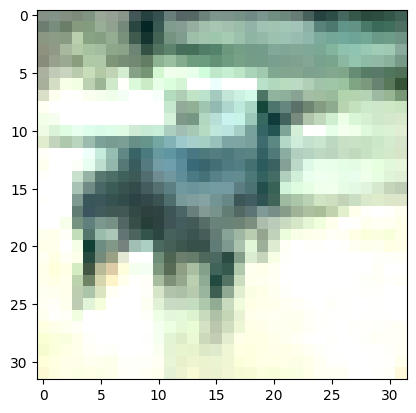


Epoch: 58 | Learning Rate: 0.0003276800000000001
0.04924115166068077
0.04705377668142319
0.04867958649992943
0.047418102622032166
0.04888018220663071
0.04864494502544403
0.04992895573377609
0.04805382341146469
0.05035531520843506
0.047070980072021484
0.05012410879135132
0.04733780026435852
0.050955113023519516
0.04586191102862358
0.05002766102552414
0.04765290021896362
0.0509515181183815
0.04997839778661728
0.04895723983645439
0.05498884245753288
0.05642533302307129
0.046792950481176376
0.05204930528998375
0.04990170896053314
0.049480777233839035
0.04997248575091362
0.05051827058196068
0.04693454131484032
0.047606684267520905
0.05362389236688614
0.05106326937675476
0.05131307244300842
0.04608979821205139
0.04863780736923218
0.046987950801849365
0.05129246041178703
0.0512671172618866
0.04799630492925644
0.0541592538356781
0.05087820813059807
0.04981328174471855
0.04544287174940109
0.04888131842017174
0.048849813640117645
0.051300011575222015
0.046672455966472626
0.04721073806285858
0.0

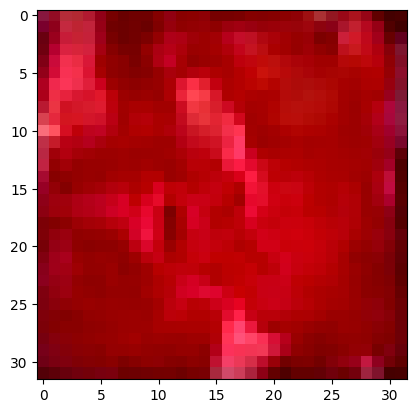


Epoch: 59 | Learning Rate: 0.0003276800000000001
0.050354085862636566
0.045636922121047974
0.052265942096710205
0.04579639062285423
0.04877501353621483
0.04779052734375
0.05169851705431938
0.0535990409553051
0.05021529644727707
0.04866301268339157
0.05162842571735382
0.052388083189725876
0.05176137015223503
0.052631255239248276
0.043875884264707565
0.0431419312953949
0.04872523993253708
0.04918522387742996
0.05098448321223259
0.050074875354766846
0.049341581761837006
0.0481187105178833
0.05420757457613945
0.05295060575008392
0.04892851039767265
0.05113903433084488
0.049676574766635895
0.05017999932169914
0.05375264212489128
0.048724815249443054
0.053836554288864136
0.0542512945830822
0.0499558225274086
0.04799606651067734
0.048772476613521576
0.05171143636107445
0.044921718537807465
0.04822980612516403
0.04958052933216095
0.05081997811794281
0.05098102614283562
0.05229794234037399
0.04971889778971672
0.04646828770637512
0.047168053686618805
0.04870092496275902
0.04940870404243469
0.05

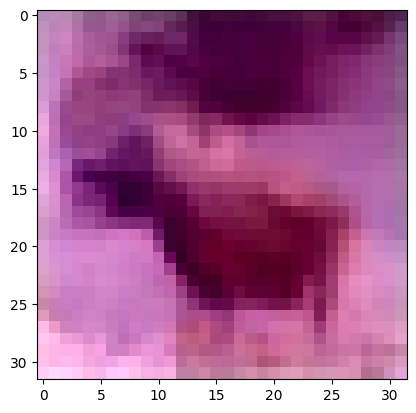


Epoch: 60 | Learning Rate: 0.0003276800000000001
0.04555545374751091
0.05467522144317627
0.050398074090480804
0.05044820159673691
0.044517599046230316
0.050729990005493164
0.048074811697006226
0.046010009944438934
0.049366142600774765
0.04925232380628586
0.05110612511634827
0.0497560054063797
0.049455344676971436
0.0508517250418663
0.04938092082738876
0.05046301335096359
0.05090641602873802
0.05450201779603958
0.05098142474889755
0.052263446152210236
0.05141862854361534
0.053929176181554794
0.04462852329015732
0.04504033923149109
0.05187582969665527
0.05279120057821274
0.04816346615552902
0.04904041439294815
0.04591360688209534
0.048990100622177124
0.04707740992307663
0.04825620353221893
0.054517269134521484
0.049904029816389084
0.05140534043312073
0.05043682083487511
0.05204249545931816
0.05334171652793884
0.054692886769771576
0.05065251141786575
0.045305728912353516
0.0469474270939827
0.04316168650984764
0.050809428095817566
0.04554969072341919
0.04685690253973007
0.0521676540374755

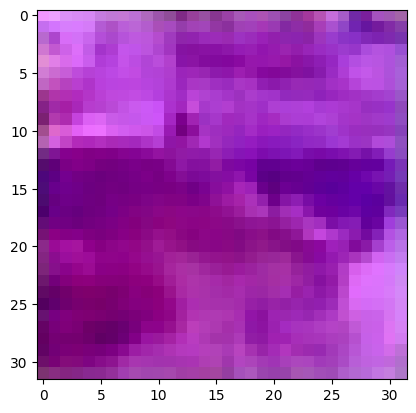


Epoch: 61 | Learning Rate: 0.0002621440000000001
0.05324066802859306
0.049932509660720825
0.049411188811063766
0.05224556475877762
0.04936477169394493
0.048474907875061035
0.04915573447942734
0.04741513729095459
0.05115930736064911
0.05250396579504013
0.050521861761808395
0.050667207688093185
0.0530293844640255
0.05193489417433739
0.05183466896414757
0.0536189004778862
0.05099640414118767
0.04635512828826904
0.04791394993662834
0.04866614192724228
0.04726804047822952
0.04879754036664963
0.04715442657470703
0.05145018547773361
0.05075572058558464
0.04699280858039856
0.046930622309446335
0.048019930720329285
0.0480731800198555
0.04568251967430115
0.04621412605047226
0.04908827692270279
0.05118362605571747
0.048901960253715515
0.05103122442960739
0.0498584620654583
0.0467422716319561
0.050609033554792404
0.04921547695994377
0.051212143152952194
0.05025964975357056
0.04674137383699417
0.04358860105276108
0.05298160761594772
0.04960612952709198
0.04932263121008873
0.050010353326797485
0.04

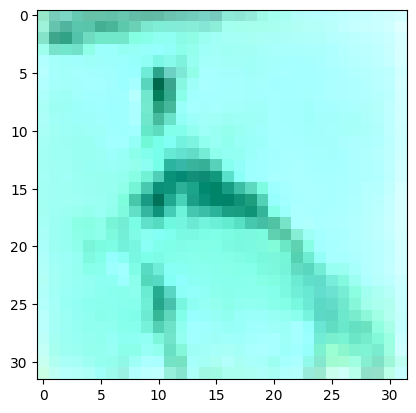


Epoch: 62 | Learning Rate: 0.0002621440000000001
0.04535488411784172
0.0483773872256279
0.05147067829966545
0.04974857717752457
0.047822341322898865
0.049975644797086716
0.04761773347854614
0.0530194491147995
0.05107050761580467
0.04785361513495445
0.04737056419253349
0.05137408524751663
0.05209958553314209
0.04707793518900871
0.05276966840028763
0.05317838490009308
0.04806564375758171
0.05027800053358078
0.047660984098911285
0.05004370957612991
0.04666362702846527
0.04611576721072197
0.04809003695845604
0.0502501055598259
0.05535414069890976
0.048030734062194824
0.04979006573557854
0.048722874373197556
0.05204620212316513
0.04851934313774109
0.05452420562505722
0.04884941503405571
0.04556131362915039
0.05086737871170044
0.046351924538612366
0.0436222068965435
0.04692026227712631
0.0512968972325325
0.048751022666692734
0.05350181460380554
0.05189891159534454
0.04943922162055969
0.04743678495287895
0.04901537299156189
0.04851565510034561
0.05039612948894501
0.048846833407878876
0.04814

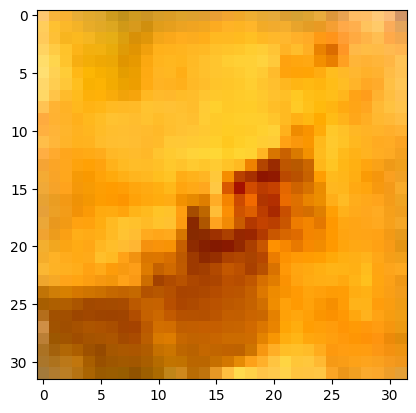


Epoch: 63 | Learning Rate: 0.0002621440000000001
0.04653328284621239
0.04705102741718292
0.05047600716352463
0.04855671152472496
0.046320315450429916
0.0494711697101593
0.052609801292419434
0.048449378460645676
0.05593112111091614
0.05435418337583542
0.05488363653421402
0.05125419422984123
0.05221426114439964
0.0495055690407753
0.04697730392217636
0.04647769778966904
0.048758357763290405
0.05187712237238884
0.049432121217250824
0.04554637521505356
0.053390394896268845
0.0472218319773674
0.04706517979502678
0.04450203478336334
0.049904730170965195
0.05128666013479233
0.050883084535598755
0.04893394932150841
0.050992101430892944
0.04732932895421982
0.050516337156295776
0.050573937594890594
0.05171877145767212
0.05187344551086426
0.04941585659980774
0.051284439861774445
0.045404963195323944
0.05001027509570122
0.04702087864279747
0.04922746866941452
0.04565387964248657
0.049265965819358826
0.051323890686035156
0.050986699759960175
0.045999228954315186
0.04374207183718681
0.04805270954966

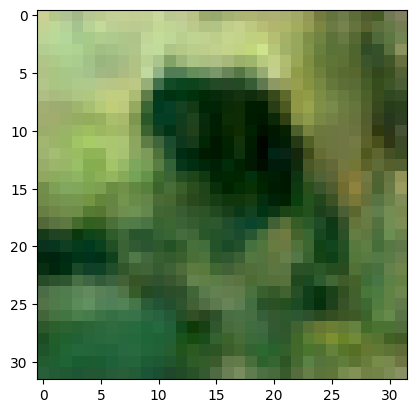


Epoch: 64 | Learning Rate: 0.0002621440000000001
0.048812806606292725
0.05223467946052551
0.04891563579440117
0.047730252146720886
0.04937107861042023
0.051309823989868164
0.0479578897356987
0.05016794055700302
0.04997263476252556
0.048465363681316376
0.050718002021312714
0.047268398106098175
0.04448598623275757
0.04862522333860397
0.04954121261835098
0.049315258860588074
0.05374941974878311
0.055251747369766235
0.05220732092857361
0.046818893402814865
0.04803348705172539
0.04361235350370407
0.047888241708278656
0.052931152284145355
0.04280844330787659
0.05598766729235649
0.04794679582118988
0.04755602404475212
0.049089908599853516
0.04881054162979126
0.04810202866792679
0.04861850291490555
0.05404232069849968
0.048102281987667084
0.0508367121219635
0.05655410513281822
0.05148683488368988
0.05237342044711113
0.04744270071387291
0.04787173867225647
0.047788456082344055
0.048760198056697845
0.04688094183802605
0.05267740413546562
0.05441378802061081
0.04822034388780594
0.046710100024938

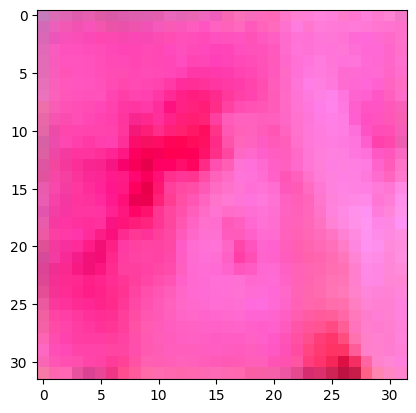


Epoch: 65 | Learning Rate: 0.0002621440000000001
0.04804903268814087
0.04903396964073181
0.0501796118915081
0.04885825142264366
0.0461994931101799
0.04725242406129837
0.0502699613571167
0.04865259677171707
0.049359556287527084
0.04630951210856438
0.04823819920420647
0.04628220945596695
0.051541656255722046
0.049265097826719284
0.05391043424606323
0.04690990969538689
0.05007326230406761
0.05087237060070038
0.04941975697875023
0.046118490397930145
0.04728270694613457
0.04930467903614044
0.05243145674467087
0.04510556906461716
0.05154728144407272
0.046406339854002
0.052074652165174484
0.04981008172035217
0.05032467469573021
0.050439417362213135
0.04739268124103546
0.05011047050356865
0.049014389514923096
0.04720688611268997
0.05141940712928772
0.04892357438802719
0.04845079034566879
0.051461320370435715
0.047875888645648956
0.04984664544463158
0.049334220588207245
0.047967515885829926
0.04717039316892624
0.04964688420295715
0.05205630511045456
0.04946611076593399
0.05265701934695244
0.04

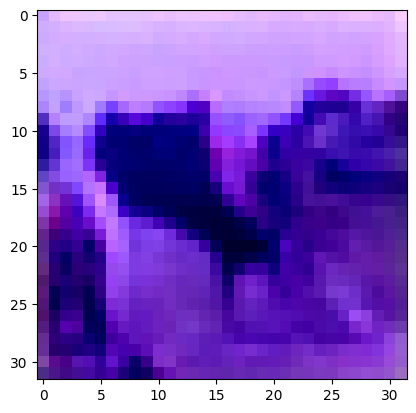


Epoch: 66 | Learning Rate: 0.0002621440000000001
0.05132971331477165
0.048478275537490845
0.04981498047709465
0.04777001589536667
0.04604877158999443
0.048754677176475525
0.04975828528404236
0.04515353962779045
0.05381321907043457
0.04925476014614105
0.051187917590141296
0.04717554152011871
0.04824135825037956
0.04911785572767258
0.046029627323150635
0.05076900124549866
0.046386025846004486
0.04656966030597687
0.04833657294511795
0.04678089916706085
0.05253147333860397
0.047765038907527924
0.046500902622938156
0.04633171483874321
0.04573390632867813
0.047414522618055344
0.05574449896812439
0.04473338648676872
0.04849778860807419
0.048830922693014145
0.052834026515483856
0.045469995588064194
0.044086553156375885
0.046518437564373016
0.0512816421687603
0.04869253560900688
0.04895041882991791
0.05362480506300926
0.04529230296611786
0.04516710340976715
0.05201798677444458
0.051444634795188904
0.045019686222076416
0.04811950773000717
0.05087041109800339
0.04878326505422592
0.05436215922236

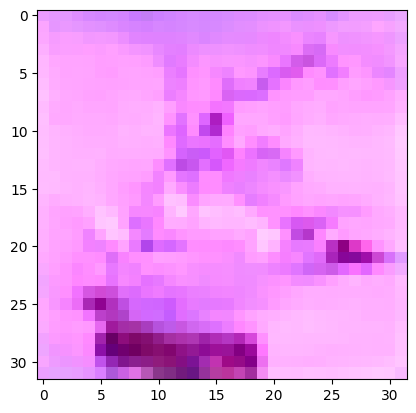


Epoch: 67 | Learning Rate: 0.0002621440000000001
0.04914196580648422
0.04727470129728317
0.045063674449920654
0.054987844079732895
0.05340772122144699
0.04979313537478447
0.05063321441411972
0.05095430836081505
0.05322426185011864
0.049104541540145874
0.04603639245033264
0.044589489698410034
0.04951009899377823
0.04851549118757248
0.04746657609939575
0.051218725740909576
0.04676699638366699
0.053327035158872604
0.05067385360598564
0.05101078376173973
0.05109335109591484
0.0491185300052166
0.048641055822372437
0.04732710123062134
0.0478028766810894
0.04790408909320831
0.04703455790877342
0.04999840259552002
0.0452822744846344
0.04984007030725479
0.052277274429798126
0.05024872347712517
0.04966095834970474
0.048069339245557785
0.04933778569102287
0.047427281737327576
0.04795112460851669
0.04711594805121422
0.048030830919742584
0.05168014019727707
0.045970067381858826
0.05444585531949997
0.048622213304042816
0.04476364701986313
0.050661470741033554
0.05143993720412254
0.048502117395401
0

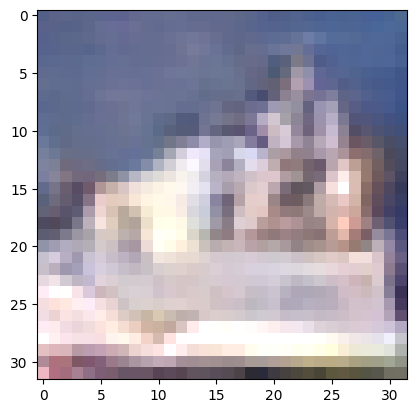


Epoch: 68 | Learning Rate: 0.0002621440000000001
0.04601256549358368
0.046701811254024506
0.05400693416595459
0.052604757249355316
0.041345033794641495
0.050803378224372864
0.048838477581739426
0.050303734838962555
0.04975216090679169
0.047198355197906494
0.049649279564619064
0.04864634573459625
0.05334171652793884
0.05066455155611038
0.049689050763845444
0.04943516477942467
0.05009342357516289
0.04861321672797203
0.05023426562547684
0.053799819201231
0.046448104083538055
0.051651790738105774
0.04672228917479515
0.049919627606868744
0.05219914764165878
0.05089154466986656
0.04562586545944214
0.04617096111178398
0.05238911136984825
0.0460873618721962
0.051937930285930634
0.05215033143758774
0.04584126174449921
0.0459844134747982
0.04702072963118553
0.05318480730056763
0.05010692775249481
0.045877695083618164
0.04955979436635971
0.04440949112176895
0.05249793827533722
0.05012970790266991
0.0505819246172905
0.051253702491521835
0.04956509917974472
0.054180603474378586
0.04787558317184448

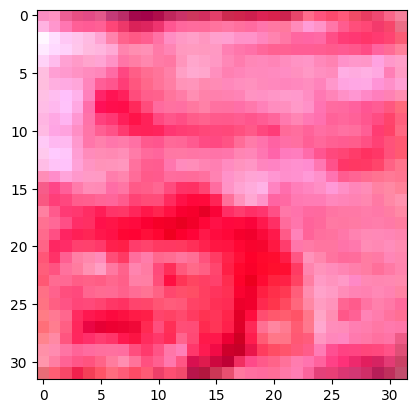


Epoch: 69 | Learning Rate: 0.0002621440000000001
0.050778698176145554
0.05053945630788803
0.04676926136016846
0.048386357724666595
0.05136145278811455
0.04871801659464836
0.051625948399305344
0.050822146236896515
0.05066829174757004
0.049937985837459564
0.05407632514834404
0.04836941510438919
0.04758576676249504
0.0480513796210289
0.047364652156829834
0.05000901222229004
0.04888942465186119
0.050482362508773804
0.05375198647379875
0.05555769428610802
0.054792970418930054
0.048036839812994
0.044899873435497284
0.05095032975077629
0.049275465309619904
0.05004667863249779
0.04855163022875786
0.05078784376382828
0.047896675765514374
0.04835858941078186
0.049151163548231125
0.057283367961645126
0.04843025654554367
0.055289994925260544
0.051553454250097275
0.04900961369276047
0.05006833001971245
0.0519302599132061
0.05136224627494812
0.048504214733839035
0.044918596744537354
0.04670215770602226
0.049003966152668
0.045190177857875824
0.04961103945970535
0.04854649305343628
0.0477248728275299

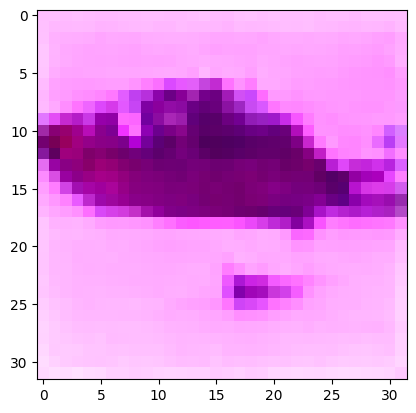


Epoch: 70 | Learning Rate: 0.0002621440000000001
0.04942905530333519
0.048190802335739136
0.0460270456969738
0.051612488925457
0.04863079637289047
0.049569591879844666
0.048129793256521225
0.046136584132909775
0.05084839463233948
0.04873676225543022
0.04416605830192566
0.0502617172896862
0.04921190068125725
0.04772268235683441
0.046080466359853745
0.05253971740603447
0.0558505654335022
0.049528755247592926
0.0540718138217926
0.05250222608447075
0.04590151458978653
0.05441451072692871
0.0435490608215332
0.05161384865641594
0.04761543497443199
0.04269582778215408
0.048188962042331696
0.05094730854034424
0.04692521691322327
0.04869598150253296
0.050218045711517334
0.04782041907310486
0.05126762390136719
0.04858032986521721
0.0492694191634655
0.05155811831355095
0.04929308220744133
0.048605211079120636
0.045626427978277206
0.05064373463392258
0.04498332738876343
0.052482374012470245
0.0499311201274395
0.0561252236366272
0.04876139014959335
0.04722601920366287
0.045603446662425995
0.049373

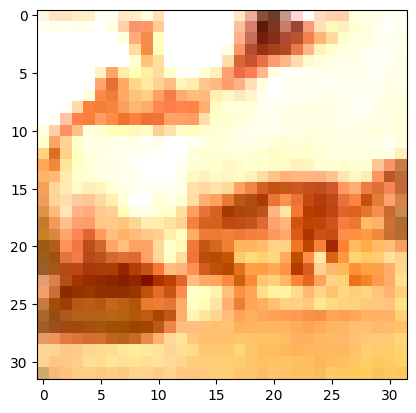


Epoch: 71 | Learning Rate: 0.00020971520000000012
0.048860907554626465
0.050637394189834595
0.049540579319000244
0.04631643742322922
0.049761366099119186
0.0516536682844162
0.04581981152296066
0.050131283700466156
0.05380864068865776
0.04497530311346054
0.04239688068628311
0.04966699331998825
0.047366999089717865
0.05051323026418686
0.04855291172862053
0.05274149030447006
0.046522967517375946
0.04881646856665611
0.04921628534793854
0.05480053648352623
0.05165572464466095
0.04797973856329918
0.04738757014274597
0.04562777280807495
0.05092386528849602
0.04830760508775711
0.047529738396406174
0.05040040239691734
0.04693339392542839
0.052570462226867676
0.04692250117659569
0.05279805511236191
0.05138776823878288
0.04685405641794205
0.047996848821640015
0.04571858048439026
0.04816499352455139
0.046948861330747604
0.046812813729047775
0.053210899233818054
0.04827823489904404
0.04923069477081299
0.04458017274737358
0.05319030210375786
0.046826571226119995
0.05148177593946457
0.04327949136495

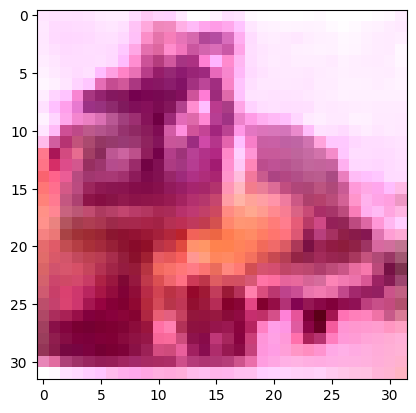


Epoch: 72 | Learning Rate: 0.00020971520000000012
0.051947832107543945
0.04860144853591919
0.049227580428123474
0.047982364892959595
0.04910456761717796
0.050496697425842285
0.05050220340490341
0.05100700259208679
0.04742338880896568
0.04752754420042038
0.051409587264060974
0.04920763894915581
0.0469403937458992
0.05084848403930664
0.05097678303718567
0.049044735729694366
0.056174054741859436
0.04643230140209198
0.04867435619235039
0.05304282158613205
0.04615957662463188
0.052199289202690125
0.05173003673553467
0.049967966973781586
0.044826727360486984
0.050540536642074585
0.0527564212679863
0.04614587128162384
0.04943379759788513
0.05078279972076416
0.04577013477683067
0.05343395099043846
0.04769018292427063
0.04770917445421219
0.04715479910373688
0.049682796001434326
0.050250835716724396
0.050836704671382904
0.04859424754977226
0.0464358925819397
0.05322225019335747
0.04378430172801018
0.04908467456698418
0.043115660548210144
0.052371859550476074
0.046395719051361084
0.0485508143901

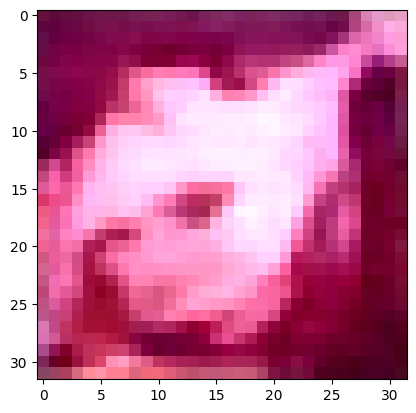


Epoch: 73 | Learning Rate: 0.00020971520000000012
0.05130700767040253
0.04957251250743866
0.052431680262088776
0.048136960715055466
0.040792569518089294
0.045636892318725586
0.04827078804373741
0.04725300520658493
0.05241919681429863
0.0475357286632061
0.05070453882217407
0.04841933399438858
0.05160027742385864
0.05077442154288292
0.04669908434152603
0.04890356585383415
0.04597070440649986
0.046516429632902145
0.05077407881617546
0.04597006365656853
0.04935155436396599
0.04943626746535301
0.0446174293756485
0.047869082540273666
0.05066239461302757
0.048055049031972885
0.04868508502840996
0.05117068812251091
0.049683988094329834
0.04845938831567764
0.04775714874267578
0.0511745922267437
0.04894087836146355
0.0455637201666832
0.049644678831100464
0.047719888389110565
0.05431240424513817
0.048468589782714844
0.05189099162817001
0.0450713150203228
0.05392145365476608
0.05062466859817505
0.04875238984823227
0.047207899391651154
0.04954565316438675
0.04614008590579033
0.050375424325466156
0

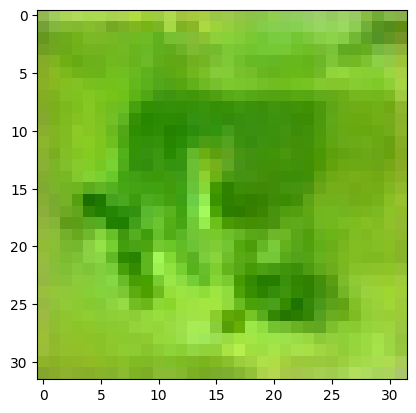


Epoch: 74 | Learning Rate: 0.00020971520000000012
0.04875236004590988
0.04897938296198845
0.04766726493835449
0.050319693982601166
0.049195241183042526
0.05005013570189476
0.0499500036239624
0.04951857030391693
0.04781804606318474
0.05400189384818077
0.05135210603475571
0.055323731154203415
0.05044092237949371
0.050143029540777206
0.053731124848127365
0.04500463232398033
0.04476732015609741
0.046934209764003754
0.04459384083747864
0.046159081161022186
0.04892637953162193
0.05341428518295288
0.05079152435064316
0.05335276573896408
0.05001509189605713
0.05191139504313469
0.04910413175821304
0.046153128147125244
0.04819102585315704
0.046796075999736786
0.04874159395694733
0.0506553053855896
0.050023727118968964
0.048722803592681885
0.050680309534072876
0.05082209035754204
0.04691069945693016
0.04891060292720795
0.045673172920942307
0.04883807525038719
0.05764669179916382
0.04674936458468437
0.0476502925157547
0.049053799360990524
0.0466027706861496
0.05029086396098137
0.05178827047348022

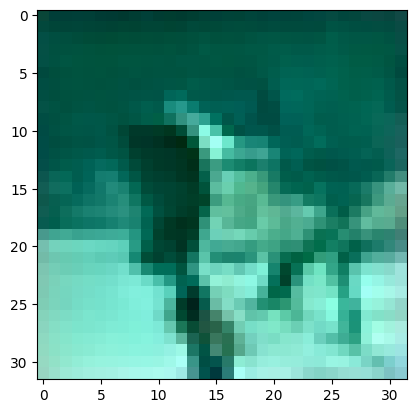


Epoch: 75 | Learning Rate: 0.00020971520000000012
0.04832284897565842
0.046542711555957794
0.05085252970457077
0.05167077109217644
0.050404712557792664
0.05131201073527336
0.05111740157008171
0.048903658986091614
0.052489083260297775
0.048912413418293
0.04731426760554314
0.04993908852338791
0.05455829203128815
0.050444766879081726
0.04527434706687927
0.04814061522483826
0.04465250298380852
0.048537641763687134
0.04750026389956474
0.05003242939710617
0.05505145713686943
0.04928471893072128
0.05107313394546509
0.051167335361242294
0.05007233843207359
0.050314854830503464
0.05080742761492729
0.054001860320568085
0.044055260717868805
0.043998539447784424
0.04649364948272705
0.05158822983503342
0.045379869639873505
0.051331646740436554
0.045031942427158356
0.04918487370014191
0.04814876243472099
0.0483568012714386
0.04688750207424164
0.04631432145833969
0.04952120780944824
0.04578571766614914
0.05331946536898613
0.04528122767806053
0.05039277672767639
0.048171065747737885
0.048821952193975

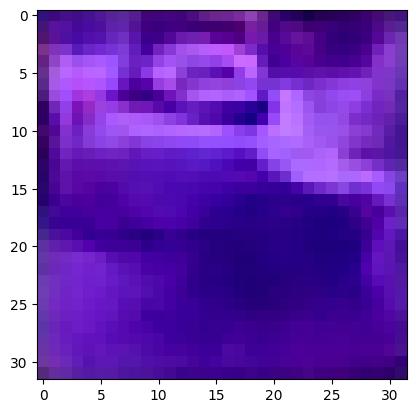


Epoch: 76 | Learning Rate: 0.00020971520000000012
0.04741392657160759
0.04603632539510727
0.04961039125919342
0.047513023018836975
0.0471075102686882
0.0461609773337841
0.0463830903172493
0.04972875118255615
0.053826890885829926
0.047946780920028687
0.050698332488536835
0.050333619117736816
0.051387347280979156
0.04939651116728783
0.05158882588148117
0.04610973224043846
0.05220005661249161
0.04800820350646973
0.04729388281702995
0.047232504934072495
0.05060052499175072
0.04751467704772949
0.04741823300719261
0.05626625567674637
0.04824691265821457
0.049971144646406174
0.049430977553129196
0.050684623420238495
0.0469624400138855
0.04945895075798035
0.04805556684732437
0.051642827689647675
0.05065502971410751
0.045555226504802704
0.050297364592552185
0.04475472494959831
0.04788115620613098
0.05006575584411621
0.04775571450591087
0.05324685201048851
0.0472097247838974
0.0473707914352417
0.05311232805252075
0.048593997955322266
0.04607114940881729
0.048301469534635544
0.047247570008039474

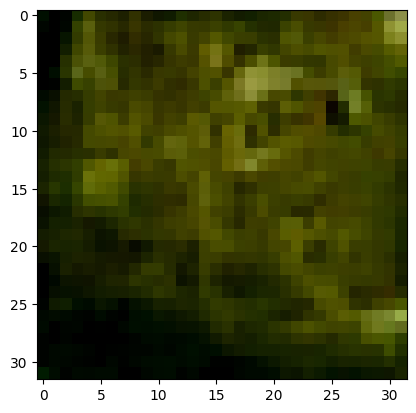


Epoch: 77 | Learning Rate: 0.00020971520000000012
0.04933300241827965
0.047743357717990875
0.05020897835493088
0.051296964287757874
0.04658513888716698
0.052072446793317795
0.046556293964385986
0.054043322801589966
0.04480695724487305
0.05482080578804016
0.05161186307668686
0.05150339752435684
0.04857560619711876
0.04601862654089928
0.04629306122660637
0.04804983362555504
0.05138259381055832
0.04695938527584076
0.04645897448062897
0.0522402785718441
0.04668238013982773
0.04893042892217636
0.051580995321273804
0.050039827823638916
0.04526584595441818
0.05176669359207153
0.05054230988025665
0.04379201680421829
0.047950636595487595
0.05048191547393799
0.047672271728515625
0.048184335231781006
0.0528029128909111
0.04489230364561081
0.05057463049888611
0.051949214190244675
0.04787842556834221
0.05142655223608017
0.04613548517227173
0.04834343120455742
0.04689662158489227
0.05009227991104126
0.05046853423118591
0.048718273639678955
0.051927145570516586
0.04719843715429306
0.047993253916502


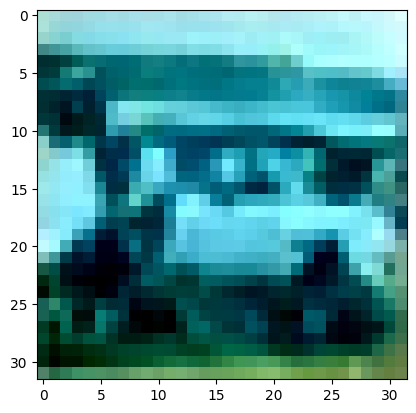


Epoch: 78 | Learning Rate: 0.00020971520000000012
0.04666067287325859
0.04700218886137009
0.04985582455992699
0.048553720116615295
0.04844370484352112
0.04529125988483429
0.05220842361450195
0.048745181411504745
0.04976063221693039
0.050286777317523956
0.04626781865954399
0.04791858047246933
0.0508885532617569
0.0452393963932991
0.05193807929754257
0.04685194045305252
0.05078310891985893
0.05009705573320389
0.04726886376738548
0.04934427887201309
0.051012612879276276
0.052407845854759216
0.053444914519786835
0.048888251185417175
0.0466577410697937
0.0454007089138031
0.04857851192355156
0.04873497411608696
0.051841747015714645
0.04654684662818909
0.046839695423841476
0.04968411475419998
0.047805577516555786
0.050415512174367905
0.04672229290008545
0.04816815257072449
0.04526336118578911
0.04786653444170952
0.04619642719626427
0.04762857407331467
0.04840851575136185
0.04944600164890289
0.050908200442790985
0.04647441953420639
0.04993345960974693
0.04573885723948479
0.049599677324295044


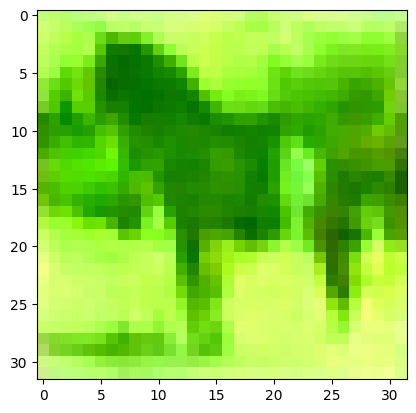


Epoch: 79 | Learning Rate: 0.00020971520000000012
0.05289699137210846
0.042630165815353394
0.0492839515209198
0.05031701177358627
0.048009514808654785
0.04626947641372681
0.045887142419815063
0.05138348788022995
0.0513109490275383
0.04834144562482834
0.051250096410512924
0.04933133348822594
0.04895130544900894
0.04789616912603378
0.04938310384750366
0.04767361283302307
0.04780986160039902
0.047894369810819626
0.049766506999731064
0.0500500462949276
0.0475061759352684
0.048429276794195175
0.049632273614406586
0.0522652268409729
0.04915889725089073
0.05100477486848831
0.04974198341369629
0.04891639202833176
0.04763885959982872
0.04634060710668564
0.04930415749549866
0.050387948751449585
0.046273790299892426
0.04856669157743454
0.0473969504237175
0.043638020753860474
0.044878363609313965
0.050244979560375214
0.04790030047297478
0.05087116360664368
0.05327216908335686
0.0516667440533638
0.04647008329629898
0.053536560386419296
0.04984530806541443
0.050062041729688644
0.048935260623693466


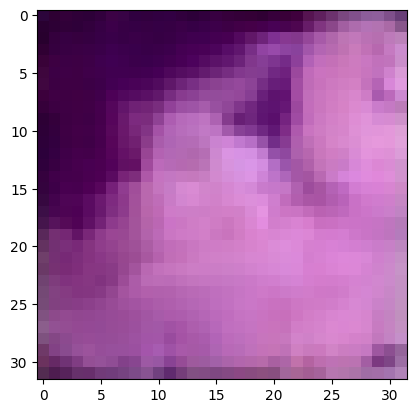


Epoch: 80 | Learning Rate: 0.00020971520000000012
0.048201315104961395
0.04831591248512268
0.05139186233282089
0.048492785543203354
0.0530424527823925
0.044426895678043365
0.050460509955883026
0.04759441316127777
0.05378757044672966
0.05156462639570236
0.051110606640577316
0.050128787755966187
0.047507017850875854
0.0515461340546608
0.055849842727184296
0.04782667011022568
0.04558628052473068
0.050403475761413574
0.04619556665420532
0.04890713095664978
0.04892604053020477
0.05029930919408798
0.047128092497587204
0.04841924458742142
0.052825313061475754
0.049588657915592194
0.05307832360267639
0.04949396103620529
0.04962227866053581
0.05128521844744682
0.048690229654312134
0.04700392484664917
0.04917795583605766
0.05096206068992615
0.0452972874045372
0.04985688254237175
0.04653988033533096
0.047858282923698425
0.05074208974838257
0.049596380442380905
0.04911988973617554
0.04889862984418869
0.053506381809711456
0.04708191007375717
0.049600180238485336
0.047312598675489426
0.048914276063

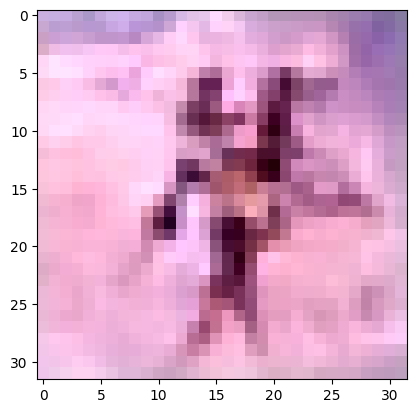


Epoch: 81 | Learning Rate: 0.0001677721600000001
0.05207853764295578
0.04542418569326401
0.05270717665553093
0.044902823865413666
0.04594549536705017
0.0463373064994812
0.04962465167045593
0.04818972200155258
0.048052724450826645
0.04989771544933319
0.05142231285572052
0.04659823328256607
0.05134260281920433
0.04645690321922302
0.05147244781255722
0.04815986752510071
0.04786742478609085
0.04946164786815643
0.048592858016490936
0.05248907208442688
0.051478318870067596
0.04818889498710632
0.049982182681560516
0.05084403604269028
0.051393695175647736
0.047589804977178574
0.04815202206373215
0.048322346061468124
0.047693878412246704
0.046508774161338806
0.05006833374500275
0.047655463218688965
0.050976380705833435
0.04981021583080292
0.05071045085787773
0.05252029746770859
0.051843516528606415
0.04734355956315994
0.04905640706419945
0.04790038987994194
0.05072394758462906
0.05040181800723076
0.05233530327677727
0.05031956359744072
0.049145594239234924
0.049159854650497437
0.04868276044726

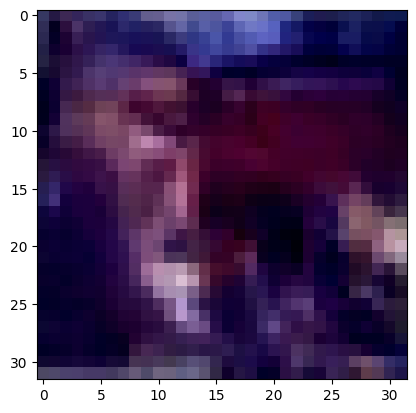


Epoch: 82 | Learning Rate: 0.0001677721600000001
0.04502415284514427
0.04748469218611717
0.04890649765729904
0.05280327796936035
0.05611838027834892
0.045206181704998016
0.04999314993619919
0.05340495705604553
0.046844374388456345
0.04905366897583008
0.048663266003131866
0.047182708978652954
0.046677932143211365
0.049080606549978256
0.04814225435256958
0.04843685030937195
0.04963383078575134
0.043243035674095154
0.05054021626710892
0.053826771676540375
0.04520946741104126
0.046544529497623444
0.050259195268154144
0.048153530806303024
0.04775877296924591
0.047846030443906784
0.04641140252351761
0.05026736855506897
0.051453690975904465
0.05079249292612076
0.046945393085479736
0.04865535348653793
0.042484961450099945
0.05066446587443352
0.050157830119132996
0.04860159009695053
0.04642484337091446
0.050751350820064545
0.04866240173578262
0.048898063600063324
0.04931413382291794
0.0501045286655426
0.048047199845314026
0.04769521579146385
0.05094943940639496
0.04720992594957352
0.0462431907

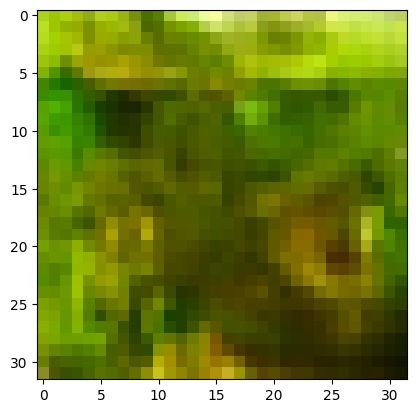


Epoch: 83 | Learning Rate: 0.0001677721600000001
0.05038416385650635
0.04864639788866043
0.05170238018035889
0.04898754879832268
0.04985427111387253
0.048606425523757935
0.04880328103899956
0.04830174893140793
0.051800575107336044
0.0457395575940609
0.05236059054732323
0.044906362891197205
0.04731466621160507
0.0521601065993309
0.04944780468940735
0.055706121027469635
0.04777878522872925
0.047913745045661926
0.04316005855798721
0.04736068472266197
0.0530226044356823
0.045632749795913696
0.048239998519420624
0.05112344026565552
0.049484845250844955
0.05208279937505722
0.04740798473358154
0.04626817628741264
0.05217308923602104
0.046944569796323776
0.05030561611056328
0.05043167620897293
0.05126450955867767
0.04982447624206543
0.050873052328825
0.049475446343421936
0.049014028161764145
0.048283033072948456
0.04812812805175781
0.047688908874988556
0.047810446470975876
0.049715250730514526
0.04707890748977661
0.047482602298259735
0.05002843588590622
0.05030014365911484
0.05026726052165031

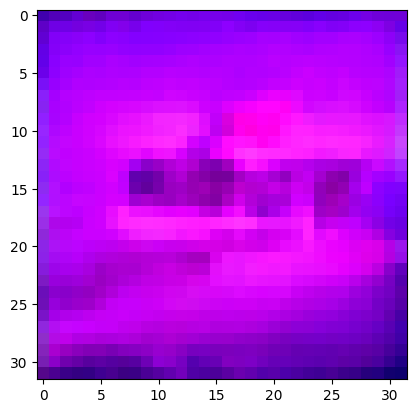


Epoch: 84 | Learning Rate: 0.0001677721600000001
0.04910637438297272
0.04473022371530533
0.05407878756523132
0.04364803060889244
0.05125472694635391
0.049628883600234985
0.04872683808207512
0.04869924113154411
0.04727409407496452
0.04964587092399597
0.04727579280734062
0.04880238324403763
0.047166526317596436
0.045935846865177155
0.04637931287288666
0.05157706141471863
0.049139540642499924
0.04659179970622063
0.04361646622419357
0.04873129725456238
0.051000289618968964
0.0509626679122448
0.04851573705673218
0.043134160339832306
0.04459286853671074
0.048745833337306976
0.04818226024508476
0.047994762659072876
0.048288844525814056
0.04686783254146576
0.04590856283903122
0.04593455418944359
0.04737914726138115
0.050673600286245346
0.051760248839855194
0.05099746584892273
0.04757736250758171
0.047228407114744186
0.04788631200790405
0.04991593211889267
0.05163087695837021
0.047684427350759506
0.04875071346759796
0.05167107284069061
0.043462615460157394
0.05149431154131889
0.048936154693365

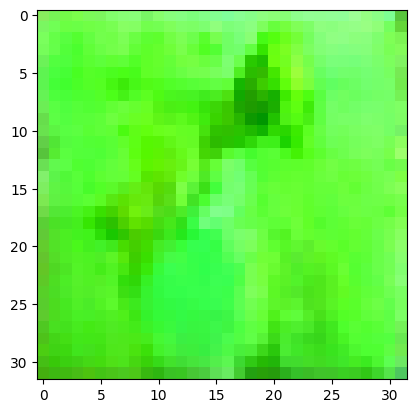


Epoch: 85 | Learning Rate: 0.0001677721600000001
0.04844575747847557
0.045984476804733276
0.047759316861629486
0.04777440056204796
0.053233176469802856
0.04711607098579407
0.0494973361492157
0.047629065811634064
0.05040670558810234
0.04583455249667168
0.0461406335234642
0.04983779042959213
0.04931625723838806
0.05321526154875755
0.04800127074122429
0.04777727648615837
0.04276743158698082
0.05264320224523544
0.04675976186990738
0.04851441830396652
0.04492471367120743
0.05037607252597809
0.04879545420408249
0.05014554783701897
0.05070067569613457
0.053914882242679596
0.04883944243192673
0.050262629985809326
0.04876907169818878
0.04604880511760712
0.04812430590391159
0.04729557782411575
0.051056742668151855
0.049680791795253754
0.05216200277209282
0.04532482847571373
0.05462343990802765
0.045625489205121994
0.04586750268936157
0.04806169122457504
0.0474904403090477
0.04698178172111511
0.05602323263883591
0.05007480829954147
0.04851500317454338
0.05091292783617973
0.051871418952941895
0.0

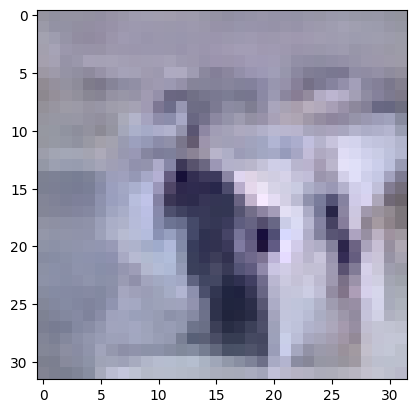


Epoch: 86 | Learning Rate: 0.0001677721600000001
0.044848497956991196
0.05098780617117882
0.046235792338848114
0.046473681926727295
0.0493413470685482
0.053415194153785706
0.04773619771003723
0.04842598736286163
0.04497820883989334
0.047565948218107224
0.05137169361114502
0.05194513127207756
0.04703029245138168
0.05311974883079529
0.05011356994509697
0.04663439840078354
0.04582039639353752
0.04423700273036957
0.05167549476027489
0.0516534261405468
0.044571809470653534
0.04651297256350517
0.05100039392709732
0.04527836665511131
0.049387335777282715
0.04571652412414551
0.04921158403158188
0.049113303422927856
0.050699494779109955
0.0475277416408062
0.04773963987827301
0.051644276827573776
0.049481865018606186
0.0475165955722332
0.0494183674454689
0.049042291939258575
0.04797648638486862
0.04673638194799423
0.05502326413989067
0.047521959990262985
0.052274882793426514
0.04980079457163811
0.050518445670604706
0.04323761165142059
0.04914044588804245
0.05465281009674072
0.04213433712720871


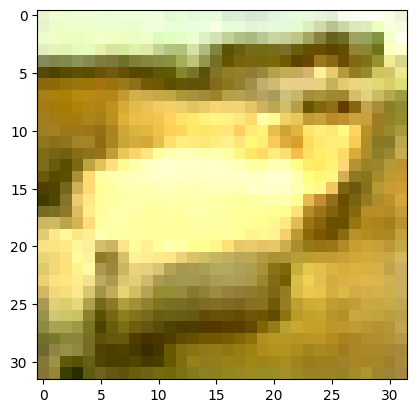


Epoch: 87 | Learning Rate: 0.0001677721600000001
0.050246112048625946
0.04988749325275421
0.0451028048992157
0.04695051908493042
0.047863926738500595
0.05281488224864006
0.04540056735277176
0.04877665638923645
0.04868197441101074
0.05316515266895294
0.05252427980303764
0.047284506261348724
0.0457315593957901
0.04923032224178314
0.04509719833731651
0.051811229437589645
0.04654828459024429
0.045501675456762314
0.04654691368341446
0.049580615013837814
0.05014849826693535
0.046657368540763855
0.049116797745227814
0.047894369810819626
0.04445398971438408
0.04546837508678436
0.050829093903303146
0.04730682075023651
0.049728717654943466
0.04682280868291855
0.04550667852163315
0.04698046296834946
0.0488399937748909
0.04680299013853073
0.04955289885401726
0.04789574444293976
0.05160298943519592
0.0508965365588665
0.0476418063044548
0.04972970485687256
0.04923297464847565
0.04836035519838333
0.04785461351275444
0.04902204871177673
0.04837244004011154
0.04980962723493576
0.04774327576160431
0.05

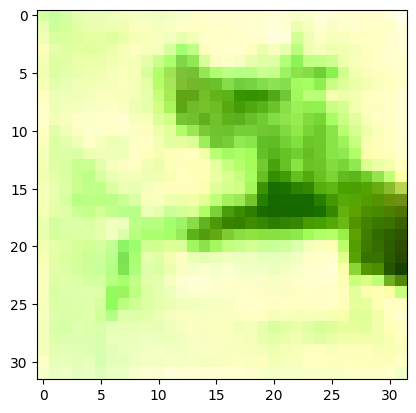


Epoch: 88 | Learning Rate: 0.0001677721600000001
0.0458984300494194
0.050359807908535004
0.04876505956053734
0.0495285801589489
0.05318693071603775
0.05023803934454918
0.048463791608810425
0.047260355204343796
0.0482671782374382
0.04677896946668625
0.05116213485598564
0.05115113407373428
0.049507986754179
0.04577110335230827
0.047893743962049484
0.05058428272604942
0.04584645852446556
0.04919701814651489
0.05078074336051941
0.04599175974726677
0.05289331078529358
0.04983270913362503
0.049717679619789124
0.04677367955446243
0.047404300421476364
0.05395063757896423
0.05155644938349724
0.050651729106903076
0.053995586931705475
0.05101419612765312
0.0472613200545311
0.04928668588399887
0.04531654715538025
0.051516883075237274
0.05127372965216637
0.04761804640293121
0.05339605361223221
0.047841619700193405
0.04838569089770317
0.04950399696826935
0.052084021270275116
0.04621650278568268
0.0509818010032177
0.04255535826086998
0.048216789960861206
0.04597066342830658
0.05057470127940178
0.049

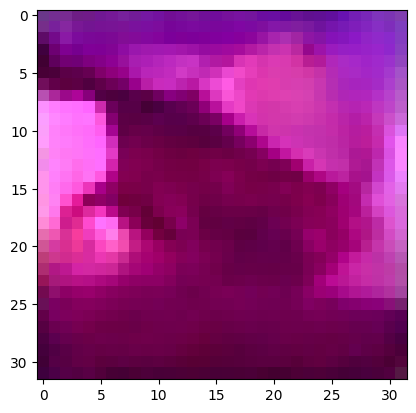


Epoch: 89 | Learning Rate: 0.0001677721600000001
0.046874940395355225
0.049334995448589325
0.047251246869564056
0.04873110353946686
0.045651018619537354
0.051258109509944916
0.04108130931854248
0.0457182303071022
0.0435958206653595
0.04668714851140976
0.050383418798446655
0.04472328722476959
0.04197494313120842
0.04775536060333252
0.047395817935466766
0.04969748854637146
0.047950275242328644
0.05013670772314072
0.049458812922239304
0.05448508262634277
0.04864422604441643
0.050070539116859436
0.04896223545074463
0.04945653676986694
0.04783668369054794
0.0494547002017498
0.05103909224271774
0.04923742637038231
0.05222384259104729
0.04517487809062004
0.05390968918800354
0.04699782654643059
0.05290265008807182
0.049204692244529724
0.05030249059200287
0.048339009284973145
0.0529257170855999
0.04477831348776817
0.054019492119550705
0.05141284689307213
0.05181019753217697
0.044674601405858994
0.048462238162755966
0.04881196469068527
0.05114244669675827
0.046580612659454346
0.0536880865693092

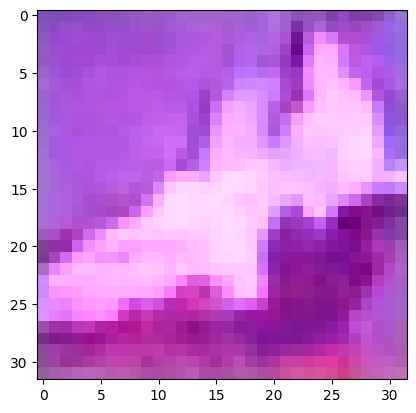


Epoch: 90 | Learning Rate: 0.0001677721600000001
0.04823897406458855
0.048872362822294235
0.04582303389906883
0.04824719950556755
0.048702992498874664
0.04520118981599808
0.05019771307706833
0.045077502727508545
0.04991266876459122
0.048449933528900146
0.05335681885480881
0.045824721455574036
0.05288190394639969
0.051628999412059784
0.04496411606669426
0.047765813767910004
0.04946437478065491
0.04478386044502258
0.04335985332727432
0.043757881969213486
0.05158538743853569
0.04645359516143799
0.04824620485305786
0.04967952519655228
0.04688185453414917
0.041973941028118134
0.04685918986797333
0.050621144473552704
0.04676287621259689
0.04521609842777252
0.04853212088346481
0.05530624836683273
0.053547851741313934
0.0463360957801342
0.050758689641952515
0.045633118599653244
0.04543095827102661
0.048260197043418884
0.051530659198760986
0.04667545482516289
0.05501488968729973
0.057323094457387924
0.046984992921352386
0.05191890150308609
0.04726920276880264
0.04807661101222038
0.048235576599

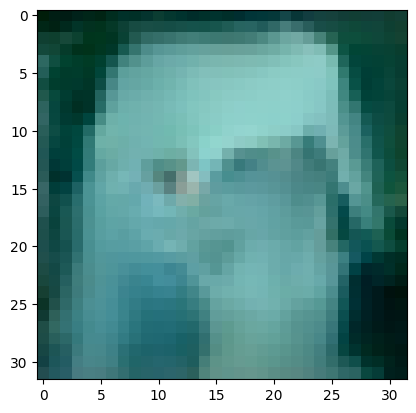


Epoch: 91 | Learning Rate: 0.00013421772800000008
0.04632135480642319
0.04728800058364868
0.0454537570476532
0.04770485311746597
0.05079925060272217
0.047814127057790756
0.04396311566233635
0.04536153003573418
0.05022566020488739
0.050773248076438904
0.04919950291514397
0.04417538642883301
0.05201232433319092
0.045685283839702606
0.05211614817380905
0.0505550317466259
0.04957727715373039
0.045467473566532135
0.05261902138590813
0.04466773197054863
0.05073705315589905
0.05276503413915634
0.048219382762908936
0.04995603486895561
0.048564162105321884
0.05090579390525818
0.04897052049636841
0.04695212468504906
0.051101796329021454
0.046672649681568146
0.04899606108665466
0.050834622234106064
0.04817412048578262
0.045161567628383636
0.04771268367767334
0.048579178750514984
0.051623664796352386
0.04761865735054016
0.05111819505691528
0.0502285473048687
0.046257179230451584
0.04758557304739952
0.04807247966527939
0.046735867857933044
0.04388424754142761
0.04943567141890526
0.0466142445802688

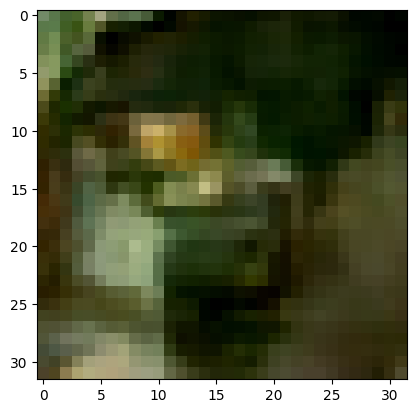


Epoch: 92 | Learning Rate: 0.00013421772800000008
0.04285016655921936
0.049839120358228683
0.051410697400569916
0.04967851936817169
0.0490175299346447
0.052993010729551315
0.0512927882373333
0.049658577889204025
0.04793509095907211
0.046253323554992676
0.049858804792165756
0.045898448675870895
0.046028535813093185
0.04555833339691162
0.052999354898929596
0.05017910897731781
0.05437808483839035
0.04521873593330383
0.056244999170303345
0.05117474123835564
0.04709574580192566
0.05042733997106552
0.04468598961830139
0.049264512956142426
0.049168627709150314
0.05006362125277519
0.04430317133665085
0.04953119903802872
0.045945994555950165
0.05125352367758751
0.047663964331150055
0.05321035534143448
0.052436914294958115
0.04604604095220566
0.04618872329592705
0.048510946333408356
0.04801836609840393
0.044332265853881836
0.04212091863155365
0.049151089042425156
0.043981246650218964
0.0511624813079834
0.0498545877635479
0.04649023339152336
0.046015799045562744
0.0472228042781353
0.046908549964

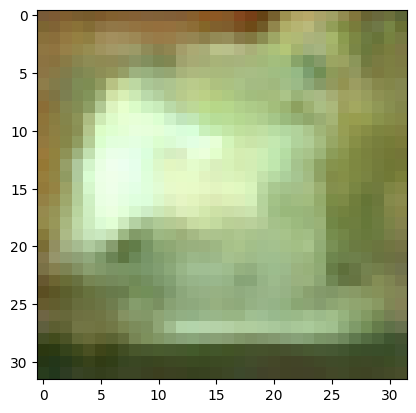


Epoch: 93 | Learning Rate: 0.00013421772800000008
0.05080461502075195
0.05028681457042694
0.04726875573396683
0.04952754080295563
0.04545971751213074
0.04520970582962036
0.051210612058639526
0.04844200611114502
0.04981302469968796
0.05385800451040268
0.047888197004795074
0.04641056805849075
0.04853203147649765
0.047995131462812424
0.04863210767507553
0.047390591353178024
0.047507040202617645
0.04663824662566185
0.053970009088516235
0.05132836103439331
0.04383013769984245
0.04873814433813095
0.04956541582942009
0.04563097283244133
0.046655550599098206
0.0491107702255249
0.05264207720756531
0.05037428066134453
0.046258121728897095
0.046157293021678925
0.04506240040063858
0.0486871562898159
0.049975283443927765
0.04804132506251335
0.047249745577573776
0.0484682135283947
0.05097860097885132
0.04843907803297043
0.049072496592998505
0.04755343124270439
0.05209895223379135
0.0475882813334465
0.04587848111987114
0.0483529195189476
0.04656359553337097
0.04554809257388115
0.04540220648050308
0.

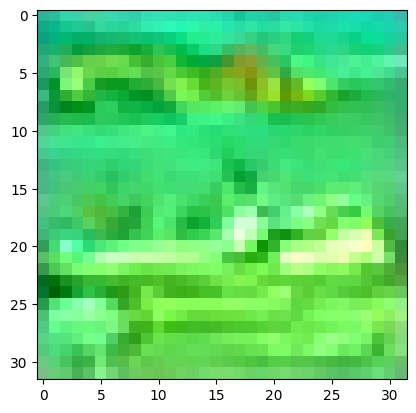


Epoch: 94 | Learning Rate: 0.00013421772800000008
0.0524350106716156
0.04327436536550522
0.04447212442755699
0.04761530086398125
0.04722069948911667
0.052013080567121506
0.049412213265895844
0.04748107120394707
0.04745068773627281
0.0475350022315979
0.04767591878771782
0.044743649661540985
0.05048063397407532
0.0482640378177166
0.048106543719768524
0.04548032209277153
0.0457092747092247
0.045470304787158966
0.046828679740428925
0.04933977127075195
0.049204271286726
0.04537122696638107
0.05060417205095291
0.05229747295379639
0.04572572559118271
0.04943888634443283
0.044070594012737274
0.049558740109205246
0.04676356539130211
0.042182378470897675
0.04971601068973541
0.0424257330596447
0.05422910302877426
0.049049198627471924
0.047340404242277145
0.04886959120631218
0.047679509967565536
0.04818626493215561
0.04677524417638779
0.04959730803966522
0.044640444219112396
0.04952292889356613
0.04799651354551315
0.051457881927490234
0.05135134980082512
0.05225232243537903
0.05028326436877251
0.

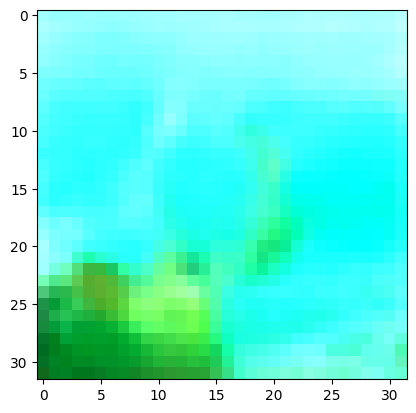


Epoch: 95 | Learning Rate: 0.00013421772800000008
0.04596073180437088
0.04804898053407669
0.04750179499387741
0.048035990446805954
0.04668627306818962
0.04902498424053192
0.046271152794361115
0.04623296111822128
0.04899939149618149
0.04870685562491417
0.05018947646021843
0.04848343878984451
0.048448942601680756
0.045258909463882446
0.04858459159731865
0.05405626818537712
0.04698367044329643
0.05260459706187248
0.04516898840665817
0.04828750342130661
0.047424137592315674
0.049991726875305176
0.04612056538462639
0.04522077366709709
0.053040191531181335
0.04772629588842392
0.04768679663538933
0.04891396313905716
0.04885069280862808
0.043530285358428955
0.045850932598114014
0.050600580871105194
0.048136305063962936
0.05064815282821655
0.050984494388103485
0.051183830946683884
0.05147344991564751
0.04623469337821007
0.05169817432761192
0.04598912596702576
0.05286599323153496
0.05324071645736694
0.046110063791275024
0.04509329795837402
0.046585023403167725
0.05063889920711517
0.048314683139

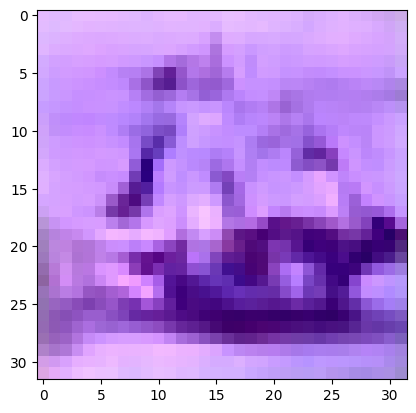


Epoch: 96 | Learning Rate: 0.00013421772800000008
0.044792406260967255
0.04608119651675224
0.044850509613752365
0.045515380799770355
0.04620596021413803
0.046016089618206024
0.0473177544772625
0.04492967575788498
0.04966198652982712
0.049595750868320465


In [ ]:
print("Number of parameters:", sum([param.numel() for param in unet2.parameters()]))
optimizer = optim.Adam(unet2.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.8)
train(unet2, data2, ddpm, optimizer, scheduler, epochs=100, num_workers=2)